# Implementing and Optimising A Self-Driving Car with Reinforcement Learning

## ABSTRACT

This project aims to train and choose an optimal policy for a self-driving car in a grid-plan city by reward and punishment. It examines the role of states, actions, rewards, models, and policy in a simplified world that characterises driving in a modern urban city. We applied the reinforcement learning methods to help the car effectively reach its destinations in the allotted time. By constructing a basic driving implementation based on random actions, we first explored the environment the agent operates in. Then we identified the possible states the agent could encounter such as oncoming cars and traffic lights at every intersection and build the self-driving agent. To create a smart car, the Q-Learning algorithm was implemented, which guides the car towards its destination within limited time. With stochastic action selection, the parameters were tested to produce an optimal policy.

## 1 INTRODUCTION

The self-driving car is the trend of future transportation. Taken cab as example, they are required to transport passengers from one location to another within the cities. However, when taken the city environment such as the traffic lights and other vehicles, people arise the concerns about their safety, reliability and efficiency. To show the performance and function of the self-driving car, we use reinforcement learning techniques to construct a a demonstration of a smart car operating in real-time to prove both safety and efficiency of using Q-Learning to train a self-driving car.

## 2 METHODOLOGY

## 2.1 Markov Decision Process (MDP)

Markov Decision Processes (MDPs) formally describe an environment for reinforcement learning, in which the environment is fully-observable, they can make a series of judgments depending on the utility of the current state of the environment, which contains a set of possible environment states ($S$), a set of possible actions ($A$), discount factor ($\gamma$), reward function ($R$), and state transition probability ($P$). Environment state $S$ is a state sequence with an initial state $s_0$. For environment conditions $S$, actions $A$ are accessible. Reward function $R$ is a map of immediate rewards for a given (state, action) pair. The likelihood of transitioning from states $s_0 \cdots s_i$ to state $s_{i+1}$ is known as state transition probability. However, because the environment has endless state sequences, calculating the transition probability for all of them is impossible (Ng, 2003). Therefore, MDP is based on the Markov assumption, which claims that the probability of transitioning to a new state $s_{i+1}$ is only dependent on $s_i$ instead of past states (Hermanns, 2002), which suggests that 
$$P(s_{i+1}\vert s_i,a_i,\cdots,s_0,a_0)\approx P(s_{i+1}\vert s_i,a_i).$$

The discount factor $\gamma$ discounts the rewards of future states that contribute to the total reward (Littman, 1994). The formula below can be used to calculate the discounted future rewards: 
$$R_t(s)=r_t+\gamma r_{t+1}+\gamma^2 r_{t+2}+\cdots+\gamma^{n-t}r_n=\sum_{t\ge 0} \gamma^t R_{a_t}(s_t,s_{t+1}).$$

The value function can estimate the value of a state sequence beginning with state $s$: 
$$V^\pi (s)=E[\sum_{t\ge 0} \gamma^t r_t].$$

The optimal is one that produces the highest value for all states:
$$V^\ast(s)=\mathop{\max}\limits_{\pi}V^\pi(s).$$

## 2.2 Q-Learning

Q-Learning is a model-free methodology of reinforcement learning which can compare the expected utility of available actions given a state, as well as a form of asynchronous dunamic programming (DP) (Watkins and Dayan, 1992). Its main idea is to learn the optimal Q-function $Q^{\pi^{opt}}$ based on the Bellman optimality equation and derive the optimal policy:
$$\pi^{opt}(s)=arg\mathop{\max}\limits_{a}Q^{\pi^{opt}}(s,a).$$ 
This project is focusing on the tabular Q-Learning with finite Markov Decision Process (MDP) and discrete state and action. 

The Bellman equation suggests the Q-value function:
$$ Q(s,a)=r+\gamma \mathop{\max}\limits_{a'}Q(s',a').$$
Given a state $s$, the Q-value function calculates the highest future reward for performing action $a$. The maximum discounted future reward for an agent moving from state $s$ to state $s'$ is taken into account while calculating the Q-value function. The difference of the estimated utilities between current state $s_t$ and next state $s_{t+1}$, with learning rate $\alpha$, at time step unit $t$, can be used to iteratively converge the Q-value function to the optimal Q-value function (Boyan and Moore, 1994), as illustrated below: 
$$Q_{t+1}(s_t,a_t)=Q_t(s_t,a_t)+\alpha(r_{t+1}+\gamma \mathop{\max}\limits_{a}Q_t(s_{t+1},a)-Q_t(s_t,a_t)).$$

Then, the substitution of the value function - Q-Learning function is shown as: 
$$V^\ast(s)=\mathop{\max}\limits_{a}Q^\ast(s,a).$$

The optimal policy is retrieved from the optimal value function with following equation: $$\pi^\ast(s)=arg\mathop{\max}\limits_{a}Q^\ast(s,a).$$

## 3 DEFINITIONS

## 3.1 Environment

The self-driving car runs in an ideal, grid-like city with roads running north to south and east to west. Suppose that there are other automobiles on the road, but there are no pedestrians to be concerned with. At each intersection, there is a traffic light that either permits North-South traffic or East-West traffic. This project applys the Right-of-Way rules:

• A left turn is permitted on a green light if there is no oncoming traffic making a right turn or proceeding straight through the intersection.

• A right turn is permitted on a red light if there is no oncoming traffic ariving from your left through the intersection.

The self-driving car will navigate around a six by eight grid plan. There are also three other cars around as the self-driving car attempts to reach its destination.

## 3.2 Inputs and Outputs

We assume that the self-driving car is assigned a route plan depending on the starting location and destination of the passengers. At each intersection, the path is divided into waypoints, assuming that the car is always located at some intersection in the world. Therefore, assuming that the destination has not yet been reached, the next waypoint is one intersection away in one direction (North, South, East, or West).

The self-driving car has an egocentric perspective of the intersection it is currently at. It is able to determine the state of the traffic signal for its travel direction and whether or not there is a vehicle at the intersection for each oncoming direction. For each action, the self-driving car may wait at the intersection or proceed to the next intersection to the left, right, or ahead. Finally, each passenger determines the arrival time for his or her journey. If the alotted time becomes zero before reaching the destination, the journey is deemed unsuccessful.

## 3.3 Rewards, Goal, and Evaluation

The self-driving car receives a reward for each completed trip, also receiving a smaller reward for each action that adheres to traffic regulations. The self-driving car incurs a minor penalty for any incorrect activity and a greater penalty for any action that breaches traffic regulations or causes an accident with another vehicle. The self-driving agent implementation should learn an optimal policy for driving on city roads while abiding by traffic rules, avoiding accidents, and delivering passengers to their destinations within the allotted time based on the rewards and penalties the self-driving car receives. We use the following metrics to evaluate our driving agent's performance throughout trips, with the purpose of learning over time:

#### • Number of times the agent reaches its destinantion (Success): 
To quantify this, we count the number of times it reaches its intended location.

#### • Number of accidents and bad turns (Mistakes): 
To determine this, we tally the number of accidents and movements that occur in opposition to the waypoint's allocated movement.

#### • Learning over time (Intervals of 10 trips):
Our primary goal is to determine how well the driving agent learns over time. In 100 trips, we examine the number of times the agent reaches its target and the mistakes it makes broken down into intervals of 10. Specifically, we group the results into ten sequential intervals and calculate the aggregate sum of the metrics mentioned (i.e., trips 1 through 10, 10 to 20, etc.) over the course of its 100 trips.

## 4 IMPLEMENTATION

The complete different agents codes, supporting codes can be found in the "self-driving car" folder. The interactive html images can be found in the "pictures" folder.

## 4.1 Construct The Agent with Supporting Code

In [1]:
# the presenting self-driving video with 1 self-driving car and 9 other cars is enclosed in the repository, the images are in the "images" folder
from IPython.display import Video

Video('C:/Users/Ariel/Documents/GitHub/project-tyc/self-driving car/video.mp4')

### 4.1.1 Set up the environment

In [ ]:
# environment.py
from collections import OrderedDict

class TrafficLight(object):
    valid_states = [True, False]  # True = NS open, False = EW open

    def __init__(self, state=None, period=None):
        self.state = state if state is not None else random.choice(self.valid_states)
        self.period = period if period is not None else random.choice([3, 4, 5])
        self.last_updated = 0

    def reset(self):
        self.last_updated = 0

    def update(self, t):
        if t - self.last_updated >= self.period:
            self.state = not self.state  # assuming state is boolean
            self.last_updated = t


class Environment(object):

    valid_actions = [None, 'forward', 'left', 'right']
    valid_inputs = {'light': TrafficLight.valid_states, 'oncoming': valid_actions,
                    'left': valid_actions, 'right': valid_actions}
    valid_headings = [(1, 0), (0, -1), (-1, 0), (0, 1)]  # ENWS
    hard_time_limit = -100  
    # even if enforce_deadline is False, end trial when deadline reaches this value (to avoid deadlocks)

    def __init__(self, alpha, gamma, epsilon, initial_value, sim_num, num_dummies=3):
        self.num_dummies = num_dummies  # no. of dummy agents
        # Initialize simulation variables
        self.done = False
        self.t = 0
        self.agent_states = OrderedDict()
        self.status_text = ""
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.initial_value = initial_value
        self.sim_num = sim_num

        # Road network
        self.grid_size = (8, 6)  # (cols, rows)
        self.bounds = (1, 1, self.grid_size[0], self.grid_size[1])
        self.block_size = 100
        self.intersections = OrderedDict()
        self.roads = []
        for x in range(self.bounds[0], self.bounds[2] + 1):
            for y in range(self.bounds[1], self.bounds[3] + 1):
                self.intersections[(x, y)] = TrafficLight()  # a traffic light at each intersection

        for a in self.intersections:
            for b in self.intersections:
                if a == b:
                    continue
                if (abs(a[0] - b[0]) + abs(a[1] - b[1])) == 1:  # L1 distance = 1
                    self.roads.append((a, b))

        # Dummy agents
        for i in range(self.num_dummies):
            self.create_agent(DummyAgent)

        # Primary agent and associated parameters
        self.primary_agent = None  # to be set explicitly
        self.enforce_deadline = False

    def create_agent(self, agent_class, *args, **kwargs):
        agent = agent_class(self, *args, **kwargs)
        self.agent_states[agent] = {'location': random.choice(list(self.intersections.keys())), 'heading': (0, 1)}
        return agent

    def set_primary_agent(self, agent, enforce_deadline=False):
        self.primary_agent = agent
        self.enforce_deadline = enforce_deadline

    def reset(self):
        self.done = False
        self.t = 0

        # Reset traffic lights
        for traffic_light in self.intersections.values():
            traffic_light.reset()

        # Pick a start and a destination
        start = random.choice(list(self.intersections.keys()))
        destination = random.choice(list(self.intersections.keys()))

        # Ensure starting location and destination are not too close
        while self.compute_dist(start, destination) < 4:
            start = random.choice(list(self.intersections.keys()))
            destination = random.choice(list(self.intersections.keys()))

        start_heading = random.choice(self.valid_headings)
        deadline = self.compute_dist(start, destination) * 5
        print("Environment.reset(): Trial set up with start = {}, destination = {}, deadline = {}".format
              (start, destination, deadline))

        # Initialize agents
        for agent in self.agent_states.keys():
            self.agent_states[agent] = {
                'location': start if agent is self.primary_agent else random.choice(list(self.intersections.keys())),
                'heading': start_heading if agent is self.primary_agent else random.choice(self.valid_headings),
                'destination': destination if agent is self.primary_agent else None,
                'deadline': deadline if agent is self.primary_agent else None}
            agent.reset(destination=(destination if agent is self.primary_agent else None))

    def step(self):
        # Update traffic lights
        for intersection, traffic_light in self.intersections.items():
            traffic_light.update(self.t)

        # Update agents
        for agent in self.agent_states.keys():
            agent.update(self.t)

        if self.done:
            return  # primary agent might have reached destination

        if self.primary_agent is not None:
            agent_deadline = self.agent_states[self.primary_agent]['deadline']
            if agent_deadline <= self.hard_time_limit:
                self.done = True
                print("Environment.step(): Primary agent hit hard time limit ({})! Trial aborted.".format
                      (self.hard_time_limit))
            elif self.enforce_deadline and agent_deadline <= 0:
                self.done = True
                print("Environment.step(): Primary agent ran out of time! Trial aborted.")
            self.agent_states[self.primary_agent]['deadline'] = agent_deadline - 1

        self.t += 1

    def sense(self, agent):
        assert agent in self.agent_states, "Unknown agent!"

        state = self.agent_states[agent]
        location = state['location']
        heading = state['heading']
        light = 'green' if (self.intersections[location].state and heading[1] != 0) or 
        ((not self.intersections[location].state) and heading[0] != 0) else 'red'

        # Populate oncoming, left, right
        oncoming = None
        left = None
        right = None
        for other_agent, other_state in self.agent_states.items():
            if agent == other_agent or location != other_state['location'] or 
            (heading[0] == other_state['heading'][0] and heading[1] == other_state['heading'][1]):
                continue
            other_heading = other_agent.get_next_waypoint()
            if (heading[0] * other_state['heading'][0] + heading[1] * other_state['heading'][1]) == -1:
                if oncoming != 'left':
                    oncoming = other_heading
            elif (heading[1] == other_state['heading'][0] and -heading[0] == other_state['heading'][1]):
                if right != 'forward' and right != 'left':
                    right = other_heading
            else:
                if left != 'forward':
                    left = other_heading

        return {'light': light, 'oncoming': oncoming, 'left': left, 'right': right}

    def get_deadline(self, agent):
        return self.agent_states[agent]['deadline'] if agent is self.primary_agent else None

    def act(self, agent, action):
        assert agent in self.agent_states, "Unknown agent!"
        assert action in self.valid_actions, "Invalid action!"

        state = self.agent_states[agent]
        location = state['location']
        heading = state['heading']
        light = 'green' if (self.intersections[location].state and heading[1] != 0) or 
        ((not self.intersections[location].state) and heading[0] != 0) else 'red'
        inputs = self.sense(agent)

        # Move agent if within bounds and obeys traffic rules
        reward = 0
        move_okay = True
        if action == 'forward':
            if light != 'green':
                move_okay = False
        elif action == 'left':
            if light == 'green' and (inputs['oncoming'] == None or inputs['oncoming'] == 'left'):
                heading = (heading[1], -heading[0])
            else:
                move_okay = False
        elif action == 'right':
            if light == 'green' or inputs['left'] != 'forward':
                heading = (-heading[1], heading[0])
            else:
                move_okay = False

        if move_okay:
            # Valid move
            if action is not None:
                # Valid non-null move
                location = ((location[0] + heading[0] - self.bounds[0]) % (self.bounds[2] - self.bounds[0] + 1)
                            + self.bounds[0],
                            (location[1] + heading[1] - self.bounds[1]) % (self.bounds[3] - self.bounds[1] + 1)
                            + self.bounds[1])  # wrap-around
                # if self.bounds[0] <= location[0] <= self.bounds[2] 
                # and self.bounds[1] <= location[1] <= self.bounds[3]:  # bounded
                state['location'] = location
                state['heading'] = heading
                reward = 2.0 if action == agent.get_next_waypoint() else -0.5
            else:
                # Valid null move
                reward = 0.0
        else:
            # Invalid move
            reward = -1.0

        if agent is self.primary_agent:
            if state['location'] == state['destination']:
                if state['deadline'] >= 0:
                    reward += 10  # bonus
                self.done = True
                self.right_counts += 1
                print("Environment.act(): The right trail are {}".format(self.right_counts))
                print("Environment.act(): Primary agent has reached destination!")

            self.status_text = "state: {}\naction: {}\nreward: {}".format(agent.get_state(), action, reward)

        return reward

    # L1 distance between two points
    def compute_dist(self, a, b):
        return abs(b[0] - a[0]) + abs(b[1] - a[1])

class Agent(object):
    
    def __init__(self, env):
        self.env = env
        self.state = None
        self.next_waypoint = None
        self.color = 'cyan'

    def reset(self, destination=None):
        pass

    def update(self, t):
        pass

    def get_state(self):
        return self.state

    def get_next_waypoint(self):
        return self.next_waypoint


class DummyAgent(Agent):
    color_choices = ['blue', 'cyan', 'magenta', 'orange']

    def __init__(self, env):
        # sets self.env = env, state = None, next_waypoint = None, and a default color
        super(DummyAgent, self).__init__(env)  
        self.next_waypoint = random.choice(Environment.valid_actions[1:])
        self.color = random.choice(self.color_choices)

    def update(self, t):
        inputs = self.env.sense(self)

        action_okay = True
        if self.next_waypoint == 'right':
            if inputs['light'] == 'red' and inputs['left'] == 'forward':
                action_okay = False
        elif self.next_waypoint == 'forward':
            if inputs['light'] == 'red':
                action_okay = False
        elif self.next_waypoint == 'left':
            if inputs['light'] == 'red' or (inputs['oncoming'] == 'forward' or inputs['oncoming'] == 'right'):
                action_okay = False

        action = None
        if action_okay:
            action = self.next_waypoint
            self.next_waypoint = random.choice(Environment.valid_actions[1:])
        reward = self.env.act(self, action)

### 4.1.2 Simulator

Set "display = True" if you want to watch how the cars drive.

In [ ]:
# simulator.py
import os
import time
import random
import importlib

class Simulator(object):
    # define the different cars color
    colors = {
        'black'   : (  0,   0,   0),
        'white'   : (255, 255, 255),
        'red'     : (255,   0,   0),
        'green'   : (  0, 255,   0),
        'blue'    : (  0,   0, 255),
        'cyan'    : (  0, 200, 200),
        'magenta' : (200,   0, 200),
        'yellow'  : (255, 255,   0),
        'orange'  : (255, 128,   0),
        'depgreen': ( 70, 146,  44),
        'liorange': (240, 148, 115)
    }

    def __init__(self, env, size=None, update_delay=1.0, display=True):
        self.env = env
        self.size = size if size is not None else ((self.env.grid_size[0] + 1) * self.env.block_size,
                                                   (self.env.grid_size[1] + 1) * self.env.block_size)
        self.width, self.height = self.size
        
        self.bg_color = self.colors['white']
        self.road_width = 5
        self.road_color = self.colors['black']

        self.quit = False
        self.start_time = None
        self.current_time = 0.0
        self.last_updated = 0.0
        # duration between each step (in secs)
        self.update_delay = update_delay  
        # display is True
        self.display = display 
        if self.display:
            try:
                self.pygame = importlib.import_module('pygame')
                self.pygame.init()
                self.screen = self.pygame.display.set_mode(self.size)
                # delay between GUI frames in ms (min: 1)
                self.frame_delay = max(1, int(self.update_delay * 1000))  
                self.agent_sprite_size = (32, 32)
                # radius of circle, when using simple representation
                self.agent_circle_radius = 10  
                for agent in self.env.agent_states:
                    agent._sprite = self.pygame.transform.smoothscale(self.pygame.image.load
                                    (os.path.join("images","car-{}.png".format(agent.color))), self.agent_sprite_size)
                    agent._sprite_size = (agent._sprite.get_width(), agent._sprite.get_height())

                self.font = self.pygame.font.Font(None, 28)
                self.paused = False
            except ImportError as e1:
                self.display = False
                print("Simulator.__init__(): Unable to import pygame; display disabled.\n{}: {}".format
                      (e1.__class__.__name__, e1))
            except Exception as e2:
                self.display = False
                print("Simulator.__init__(): Error initializing GUI objects; display disabled.\n{}: {}".format
                      (e2.__class__.__name__, e2))

    def run(self, n_trials=1):
        self.quit = False
        for trial in range(n_trials):
            print("Simulator.run(): Trial {}".format(trial)) 
            self.env.reset()
            self.current_time = 0.0
            self.last_updated = 0.0
            self.start_time = time.time()
            while True:
                try:
                    # Update current time
                    self.current_time = time.time() - self.start_time
                    # print "Simulator.run(): current_time = {:.3f}".format(self.current_time)

                    # Handle GUI events
                    if self.display:
                        for event in self.pygame.event.get():
                            if event.type == self.pygame.QUIT:
                                self.quit = True
                            elif event.type == self.pygame.KEYDOWN:
                                if event.key == 27:  
                                    self.quit = True
                                elif event.unicode == u' ':
                                    self.paused = True

                        if self.paused:
                            self.pause()

                    # Update environment
                    if (self.current_time - self.last_updated) >= self.update_delay:
                        self.env.step()
                        self.last_updated = self.current_time

                    # Render GUI and sleep
                    if self.display:
                        self.render()
                        self.pygame.time.wait(self.frame_delay)
                except KeyboardInterrupt:
                    self.quit = True
                finally:
                    if self.quit or self.env.done:
                        break

            if self.quit:
                break

    def render(self):
        # Clear screen
        self.screen.fill(self.bg_color)

        # Draw and Static elements
        for road in self.env.roads:
            self.pygame.draw.line(self.screen, self.road_color, 
                                  (road[0][0] * self.env.block_size, road[0][1] *
                                   self.env.block_size), (road[1][0] * self.env.block_size,
                                                          road[1][1] * self.env.block_size), self.road_width)

        for intersection, traffic_light in self.env.intersections.items():
            self.pygame.draw.circle(self.screen, self.road_color, 
                                    (intersection[0] * self.env.block_size, 
                                     intersection[1] * self.env.block_size), 10)
            # North-South is open
            if traffic_light.state:  
                self.pygame.draw.line(self.screen, self.colors['depgreen'],
                    (intersection[0] * self.env.block_size, intersection[1] * self.env.block_size - 15),
                    (intersection[0] * self.env.block_size, intersection[1] * self.env.block_size + 15), 
                                      self.road_width)
            # East-West is open
            else:  
                self.pygame.draw.line(self.screen, self.colors['liorange'],
                    (intersection[0] * self.env.block_size - 15, intersection[1] * self.env.block_size),
                    (intersection[0] * self.env.block_size + 15, intersection[1] * self.env.block_size), 
                                      self.road_width)

        # Dynamic elements
        for agent, state in self.env.agent_states.items():
            # Compute precise agent location here (back from the intersection some)
            agent_offset = (2 * state['heading'][0] * self.agent_circle_radius, 2 *
                            state['heading'][1] * self.agent_circle_radius)
            agent_pos = (state['location'][0] * self.env.block_size - agent_offset[0],
                         state['location'][1] * self.env.block_size - agent_offset[1])
            agent_color = self.colors[agent.color]
            if hasattr(agent, '_sprite') and agent._sprite is not None:
                # Draw agent sprite (image), properly rotated
                rotated_sprite = agent._sprite if state['heading'] == (1, 0) else self.pygame.transform.rotate(agent._sprite, 180 if state['heading'][0] == -1 else state['heading'][1] * -90)
                self.screen.blit(rotated_sprite,
                    self.pygame.rect.Rect(agent_pos[0] - agent._sprite_size[0] / 2, 
                                          agent_pos[1] - agent._sprite_size[1] / 2,
                        agent._sprite_size[0], agent._sprite_size[1]))
            else:
                # Draw simple agent (circle with a short line segment poking out to indicate heading)
                self.pygame.draw.circle(self.screen, agent_color, agent_pos, self.agent_circle_radius)
                self.pygame.draw.line(self.screen, agent_color, agent_pos, state['location'], self.road_width)
            if agent.get_next_waypoint() is not None:
                self.screen.blit(self.font.render(agent.get_next_waypoint(), True, agent_color, self.bg_color),
                                 (agent_pos[0] + 10, agent_pos[1] + 10))
            if state['destination'] is not None:
                self.pygame.draw.circle(self.screen, agent_color, (state['destination'][0] * self.env.block_size,
                                                                   state['destination'][1] * self.env.block_size), 6)
                self.pygame.draw.circle(self.screen, agent_color, (state['destination'][0] * self.env.block_size,
                                                                   state['destination'][1] * self.env.block_size), 15, 2)

        # Overlays
        text_y = 10
        for text in self.env.status_text.split('\n'):
            self.screen.blit(self.font.render(text, True, self.colors['red'], self.bg_color), (100, text_y))
            text_y += 20

        # Flip buffers
        self.pygame.display.flip()

    def pause(self):
        abs_pause_time = time.time()
        pause_text = "[PAUSED] Press any key to continue..."
        self.screen.blit(self.font.render(pause_text, True, self.colors['cyan'], self.bg_color), 
                         (100, self.height - 40))
        self.pygame.display.flip()
        print(pause_text) 
        while self.paused:
            for event in self.pygame.event.get():
                if event.type == self.pygame.KEYDOWN:
                    self.paused = False
            self.pygame.time.wait(self.frame_delay)
        self.screen.blit(self.font.render(pause_text, True, self.bg_color, self.bg_color), (100, self.height - 40))
        self.start_time += (time.time() - abs_pause_time)


### 4.1.3 Route Planner

In [ ]:
# planner.py
class RoutePlanner(object):

    def __init__(self, env, agent):
        self.env = env
        self.agent = agent
        self.destination = None

    def route_to(self, destination=None):
        self.destination = destination if destination is not None else random.choice(self.env.intersections.keys())
        print("RoutePlanner.route_to(): destination = {}".format(destination)) 

    def next_waypoint(self):
        location = self.env.agent_states[self.agent]['location']
        heading = self.env.agent_states[self.agent]['heading']
        delta = (self.destination[0] - location[0], self.destination[1] - location[1])
        if delta[0] == 0 and delta[1] == 0:
            return None
        elif delta[0] != 0:  # EW difference
            if delta[0] * heading[0] > 0:  # facing correct EW direction
                return 'forward'
            elif delta[0] * heading[0] < 0:  # facing opposite EW direction
                return 'right'  # long U-turn
            elif delta[0] * heading[1] > 0:
                return 'left'
            else:
                return 'right'
        elif delta[1] != 0:  # NS difference (turn logic is slightly different)
            if delta[1] * heading[1] > 0:  # facing correct NS direction
                return 'forward'
            elif delta[1] * heading[1] < 0:  # facing opposite NS direction
                return 'right'  # long U-turn
            elif delta[1] * heading[0] > 0:
                return 'right'
            else:
                return 'left'

### 4.1.4 Q-Table

In [ ]:
# q_table.py
from __future__ import division
from collections import defaultdict
from itertools import product
import numpy as np


def generate_q_table(initial_value):
    way_points = ['left', 'right', 'forward']
    oncoming = [None, 'forward', 'left', 'right']
    actions = [None, 'forward', 'left', 'right']
    lights = ['red', 'green']
    left = [None, 'forward', 'left', 'right']
    state = [lights, oncoming, left, way_points]
    q_table = defaultdict(tuple)
    for state in product(*state):
        if initial_value == 'random':
            q_table[state] = {action: np.random.choice(10) for action in actions}
        elif initial_value == 'normal':
            q_table[state] = {action: np.random.randn() for action in actions}
        elif initial_value == 'zero':
            q_table[state] = {action: 0 for action in actions}
        elif initial_value == 'one':
            q_table[state] = {action: 1 for action in actions}
        elif initial_value == 'hundred':
            q_table[state] = {action: 100 for action in actions}
        else:
            print("{}".format(0))
            q_table[state] = {action: np.random.uniform(0.0, 0.4) for action in actions}
    return q_table


def best_choice(state):
    max_value = max(state.values())
    best_actions = [action for action, reward in state.items() if reward == max_value]
    choice = random.choice(best_actions)
    return choice


# Alphas
def decay1(t):
    return 1 / (t + 1)

def decay2(t):
    return 1 / (t + 2)

def decay3(t):
    return 1 - (1/np.log(t+3))

def decay4(t):
    return 1 - (1/np.sqrt(t + 3))
    # return 1-(t/np.exp(t + 10))

def detect_alpha(f):
    try:
        if f is decay1:
            return "decay1"
        if f is decay2:
            return "decay2"
        if f is decay3:
            return "decay3"
        if f is decay4:
            return "decay4"
        if f is constant:
            return "0.2"
        if f is default:
            return "0.8"
    except:
        return "Unknown"

def constant(t):
    return 0.2

def default(t):
    return 0.8


# Epsilons 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def cross_entropy(t):
    return -np.log(sigmoid(t + 2))


def arithmetic_average(t):
    if t == 0:
        return 1
    else:
        return 1 / t


def detect_epsilon(f):
    try:
        if f is cross_entropy:
            return "Cross Entropy"
        if f is sigmoid:
            return "Sigmoid"
        if f is arithmetic_average:
            return "Arithmetic Average"
        if f is constant:
            return "0.2"
        elif f is default:
            return "0.8"
    except:
        return "Unknown"


### 4.1.5 Q-Learning Agent

This is the Q-Learning example, the full set of agents codes are provided in the smartcab python file.

In [ ]:
from __future__ import division
import pandas as pd

In [ ]:
# agent_q.py
class LearningAgent(Agent):
    
    def __init__(self, env):
        super(LearningAgent, self).__init__(env)  
        self.color = 'red'  # override color
        self.planner = RoutePlanner(self.env, self)  # simple route planner to get next_waypoint
        self.q_table = generate_q_table(self.env.initial_value)
        self.actions = [None, 'forward', 'left', 'right']
        self.trial = 0
        self.max_moves = 0
        self.time = 0.0

    def reset(self, destination=None):
        self.planner.route_to(destination)
        self.max_moves = 0

    def random_action(self):
        return random.choice(self.actions)

    def keep_track(self):
        if self.planner.next_waypoint() is None:
            reached_destination.append(1)
        else:
            reached_destination.append(0)

    def arg_max(self):
        max_reward = self.q_table[self.state][best_choice(self.q_table[self.state])]
        return max_reward

    def q_learn(self, s1, s2, t):
        learning_rate = self.env.alpha(t)
        discount_rate = self.env.gamma
        q_val = s1 + learning_rate * (s2 + discount_rate * self.arg_max() - s1)
        return q_val

    def record_trial(self, action, reward, inputs, t, deadline):
        result = dict()
        result['action'] = action
        result['reward'] = reward
        result['t'] = t
        result['light'] = inputs['light']
        result['oncoming'] = inputs['oncoming']
        result['location'] = self.env.agent_states[self]["location"]
        result['success'] = self.planner.next_waypoint() is None
        result['destination'] = self.env.agent_states[self]["destination"]
        result['moves_taken'] = self.max_moves - deadline
        result['trip'] = self.trial
        result['alpha'] = self.env.alpha
        result['gamma'] = self.env.gamma
        result['initial_value'] = self.env.initial_value
        result['sim_num'] = self.env.sim_num
        return result

    def update(self, t):

        # Gather inputs
        self.next_waypoint = self.planner.next_waypoint()  # from route planner, also displayed by simulator
        inputs = self.env.sense(self)
        deadline = self.env.get_deadline(self)
        if t is 0:
            self.max_moves = deadline
            self.trial += 1
        self.time += 1.0

        # Update state
        self.state = (inputs['light'], inputs['oncoming'], inputs['left'], self.next_waypoint)

        # Select action according to policy
        action = best_choice(self.q_table[self.state])

        # Execute action and get reward
        reward = self.env.act(self, action)

        # Keep track of results
        result = self.record_trial(action, reward, inputs, t, deadline)
        results.append(result)

        # Keep track of reaching destination
        self.keep_track()

        # Learn policy based on state, action, reward
        self.next_waypoint = self.planner.next_waypoint()
        inputs = self.env.sense(self)
        self.state = (inputs['light'], inputs['oncoming'], inputs['left'], self.next_waypoint)
        s1 = self.q_table[self.state][action]
        s2 = self.env.act(self, action)
        self.q_table[self.state][action] = self.q_learn(s1, s2, self.time)


def run(alpha=default, gamma=0.2, epsilon=default, initial_value='zero', sim_num=1)
    # Set up environment and agent
    e = Environment(alpha, gamma, epsilon, initial_value, sim_num)  # create environment(also adds some dummy traffic)
    a = e.create_agent(LearningAgent)  # create agent
    e.set_primary_agent(a, enforce_deadline=True)  # specify agent to track

    # Now simulate it
    sim = Simulator(e, update_delay=0.0, display=False)

    sim.run(n_trials=100)  # run for a specified number of trials
    print(np.sum(reached_destination))

if __name__ == '__main__':
    reached_destination = []
    results = []
    script_dir = os.path.dirname(__file__)
    
    path = os.path.join(script_dir, '../results/q_agent_sim_1000.json')
    for i in range(1000):
        run(sim_num=i)
    pd.DataFrame(results).to_json(path)
    print(path)

### 4.1.6 Results Analysis

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function
from __future__ import absolute_import, unicode_literals
from IPython.display import display
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

from bokeh import *

%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
import bokeh.io
bokeh.io.output_notebook()

rc = {'lines.linewidth': 1, 
      'axes.labelsize': 14, 
      'axes.titlesize': 14, 
      'axes.facecolor': 'FFFFFF',
       }

sns.set_context('notebook', rc=rc)
sns.set_style('white', rc=rc)
sns.set_palette("colorblind")

pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)

Loading BokehJS ...

In this project, the values of reward are summarised as -1, 0, 2, 9, 12, where -1 indicates that our car keeps moving when committing traffic violations or getting into accidents, 0 indicates that our car obeys the traffic rules but does not continue moving, 2 indicates that our car drives in compliance with traffic regulations, 9 indicates that our car reaches the destination on time within the time limit, 12 indicates that our car arrives earlier than the time deadline.

## 4.2 Implementing A Basic Driving Agent

As previously stated, we are going to implement a car that processes the following inputs at each time step:

• Location of the next waypoint: about its current position and heading

• Intersection state: traffic light and the presence of automobiles

• Current deadline value: time steps remaining

First, we designed a basic driving agent to move around in the environment, the car is instructed to choose an action at random from the set of four possible actions (right, left, forward, and none) for every state the car meets during their trips while disregarding the input information. We do not impose a deadline (time constraint) during this phase, that is, the agent is given unlimited time to reach the destination.

In [3]:
def is_bad(x):
    if x in [-0.5, -1.0, 9.5]:
        return True
    else:
        return False

def load_transform(fp):
    df = pd.read_json(fp)
    df = df.sort_values(by=['trip', 't'])
    bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    df['trip_interval'] = pd.cut(df['trip'], 
                                    bins=bins,
                                    precision=3,
                                    labels = trips_intervals)
    df['success'] = df['success'].astype(int)
    df['reward'] = df['reward'].astype(int)
    df['bad_moves'] = df['reward'].apply(lambda x: int(is_bad(x)))
    return df

def plot_path(df, deadline=False):
    df = df.sort_values(by=['trip', 't'])
    grid = sns.FacetGrid(df, col="trip", 
                         hue="trip",
                         col_wrap=5,
                         height=2.0,
                         aspect=1.5)
    grid.map(plt.axhline, y=0, ls=":", c=".5", label='No move')
    grid.map(plt.plot, "t", "reward", marker="o", ms=5, lw=.8)

    if deadline:
        grid.set(xticks=np.linspace(0, 50, 6, endpoint=True), xlim=(-1, 50), ylim=(-3, 13))
    else:
        grid.set(xticks=np.linspace(0, 150, 6, endpoint=True), xlim=(-1, 150), ylim=(-3, 13))
    grid.fig.tight_layout(w_pad=1)
    plt.savefig("/Users/tyc_219/Downloads/smartcab-master/results/random_agent.eps", format='eps', dpi=1000)

def review_results(df):
    print('Successful trips:')
    display(pd.crosstab(df.trip_interval, df.success, margins=True).T)
    
    print("\nRewards:")
    display(pd.crosstab(df.trip_interval, df.reward, margins=True).T)

    print("\nBad moves:")
    display(pd.crosstab(df.trip_interval, df.bad_moves, margins=True).T)
    
def publish_results(df):
    #df_s = df.groupby(['trip_interval'])['success'].sum()
    #df_b = df.groupby(['trip_interval'])['bad_moves'].sum()
    print(tabulate(df.groupby(['trip_interval'])['success','bad_moves'].sum(),
         #[trips_intervals, df_s, df_b],
         headers=['Trips', 'Success', 'Bad moves'],
         tablefmt='pretty'))
    
trips_intervals = ['01 - 10', '11 - 20', '21 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70',
                   '71 - 80', '81 - 90', '91 - 100']

In [6]:
agent_ran = "/Users/tyc_219/Downloads/smartcab-master/results/random_agent.json"
df = load_transform(agent_ran)
review_results(df)

Successful trips:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
success                                                                        
0                  644      739      853      848      802      654      852   
1                    5        3        4        4        4        7        6   
All                649      742      857      852      806      661      858   

trip_interval  71 - 80  81 - 90  91 - 100   All  
success                                          
0                  431      568       593  6984  
1                    6        4         3    46  
All                437      572       596  7030


Rewards:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
reward                                                                         
-1                 171      227      225      248      198      188      225   
0                  377      401      484      460      463      361      474   
2                   99      113      148      144      145      111      157   
9                    1        1        0        0        0        1        0   
12                   1        0        0        0        0        0        2   
All                649      742      857      852      806      661      858   

trip_interval  71 - 80  81 - 90  91 - 100   All  
reward                                           
-1                 108      155       145  1890  
0                  249      302       339  3910  
2                   77      113       111  1218  
9                    1        1         0     5  
12                   2        1         1     7  
All                437      572       596  7030


Bad moves:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
bad_moves                                                                      
0                  478      515      632      604      608      473      633   
1                  171      227      225      248      198      188      225   
All                649      742      857      852      806      661      858   

trip_interval  71 - 80  81 - 90  91 - 100   All  
bad_moves                                        
0                  329      417       451  5140  
1                  108      155       145  1890  
All                437      572       596  7030

In [61]:
publish_results(df)

+----------+---------+-----------+
|  Trips   | Success | Bad moves |
+----------+---------+-----------+
| 01 - 10  |    5    |    171    |
| 11 - 20  |    3    |    227    |
| 21 - 30  |    4    |    225    |
| 31 - 40  |    4    |    248    |
| 41 - 50  |    4    |    198    |
| 51 - 60  |    7    |    188    |
| 61 - 70  |    6    |    225    |
| 71 - 80  |    6    |    108    |
| 81 - 90  |    4    |    155    |
| 91 - 100 |    3    |    145    |
+----------+---------+-----------+


/var/folders/km/k9s9s4zd24x08bnyw38g8g3c0000gn/T/ipykernel_32761/2714475285.py:50: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(tabulate(df.groupby(['trip_interval'])['success','bad_moves'].sum(),


In [32]:
print([df.groupby(['trip_interval'])['success'].sum(),df.groupby(['trip_interval'])['bad_moves'].sum()])

[trip_interval
01 - 10     5
11 - 20     3
21 - 30     4
31 - 40     4
41 - 50     4
51 - 60     7
61 - 70     6
71 - 80     6
81 - 90     4
91 - 100    3
Name: success, dtype: int64, trip_interval
01 - 10     171
11 - 20     227
21 - 30     225
31 - 40     248
41 - 50     198
51 - 60     188
61 - 70     225
71 - 80     108
81 - 90     155
91 - 100    145
Name: bad_moves, dtype: int64]


As can be seen above, the car barely learns. The numbers of success and "bad moves" are stable among 100 trials. 

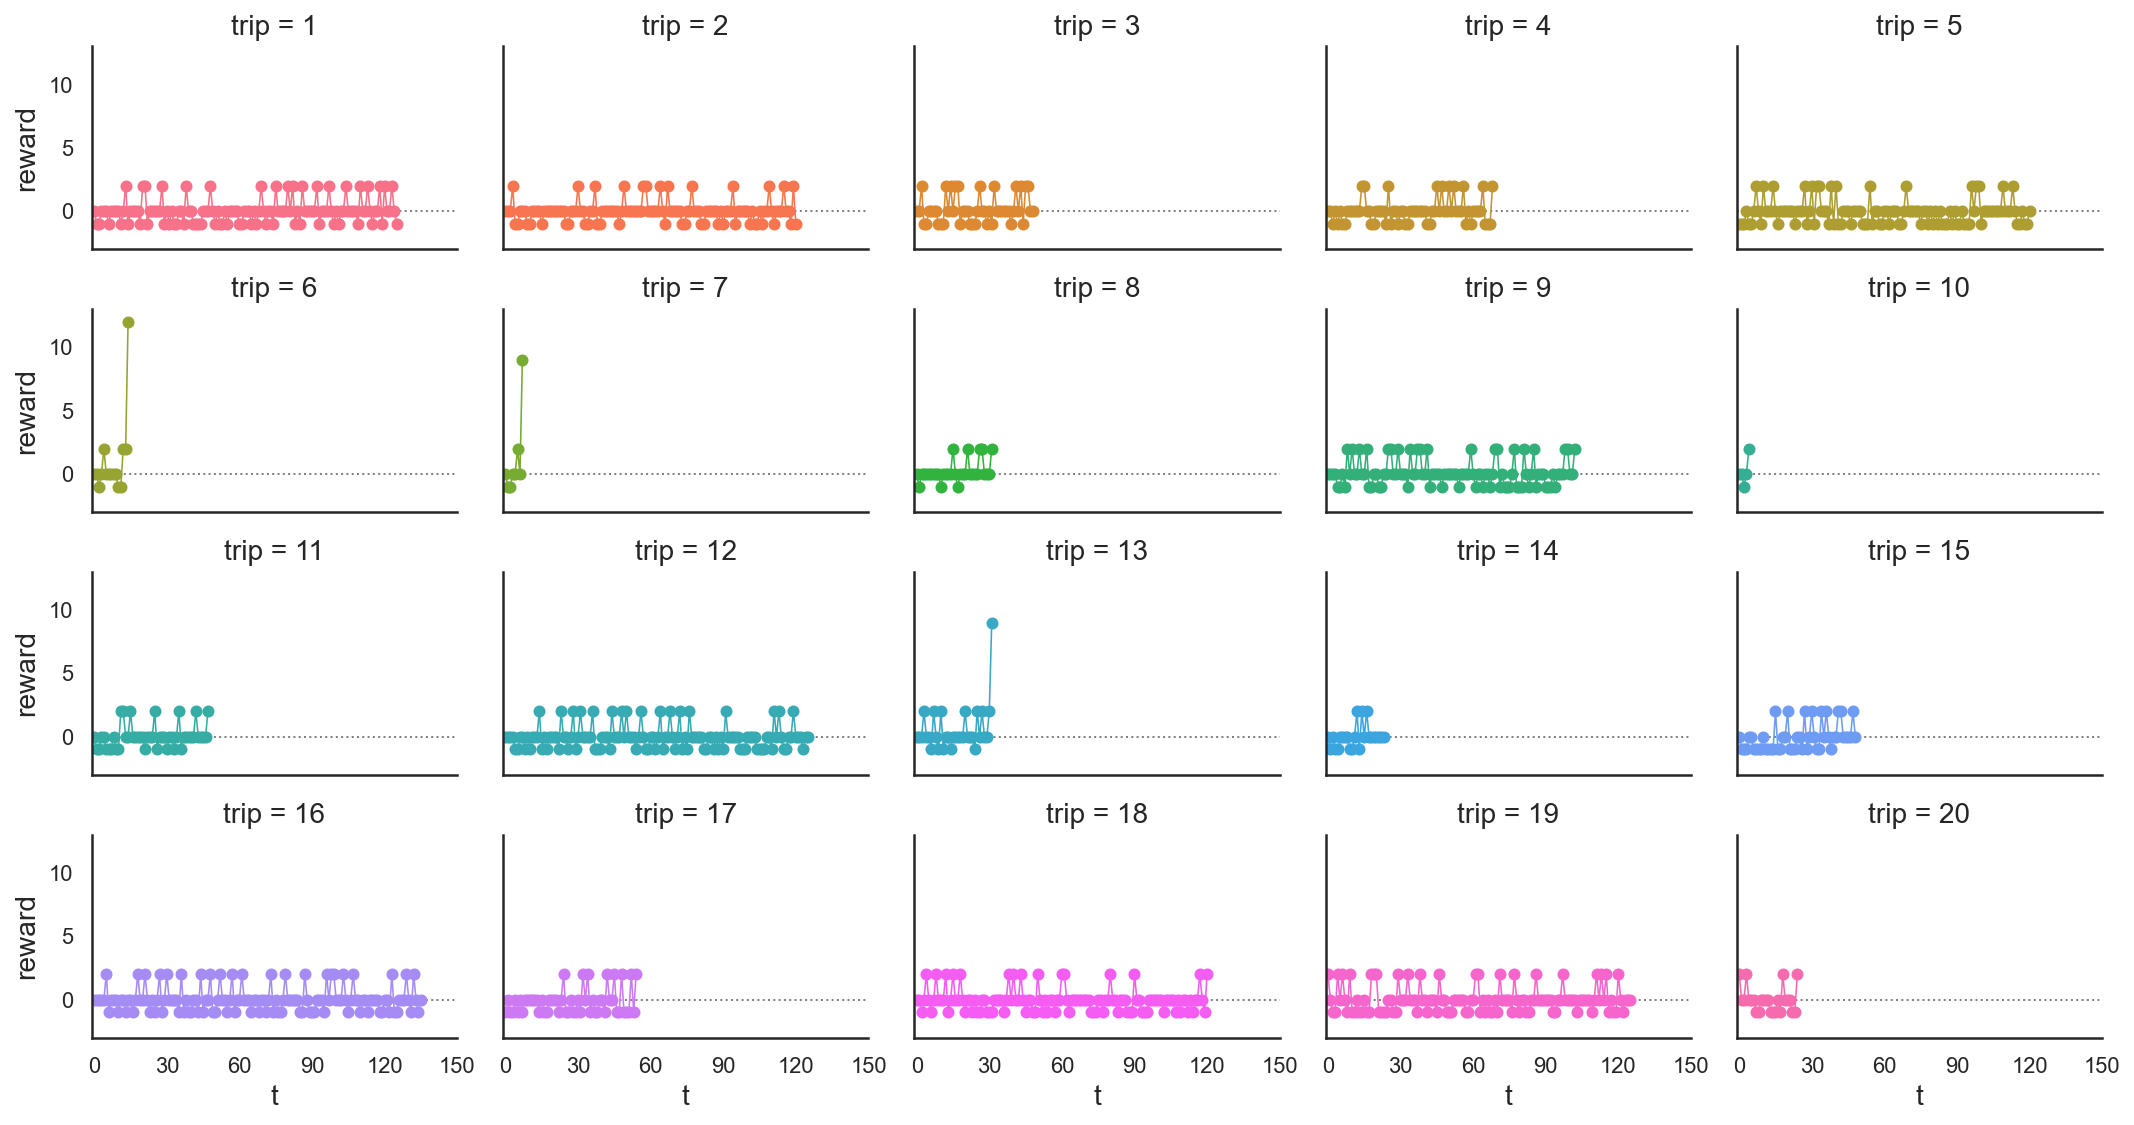

In [24]:
# plot the results for the first 20 trips
first_20 = df[df['trip'] <= 20]
plot_path(first_20, deadline=False)

From the above charts of first 20 trips, it can be seen that the car can eventually reach its destination after driving around the city, by taking random actions. However, it makes numerous mistakes along the way and takes a long time to arrive at its destination.

In [7]:
def sns_data(df):
    trip = list(set(df['trip']))
    success = list(df.groupby(['trip'])['success'].max())
    total_moves = list(df.groupby(['trip'])['t'].max())
    total_reward = list(df.groupby(['trip'])['reward'].sum())
    total_nega_reward = list(df.groupby(['trip'])['bad_moves'].sum())
    data = {
        'trial':trip,
        'trial_length': total_moves,
        'total_reward': total_reward,
        'total_nega_reward': total_nega_reward,
        'success': success
    }
    df_ = pd.DataFrame(data)
    
    return df_

In [4]:
import glob
import matplotlib.pyplot as plt

def display_trial_stats(df, title_prefix, ylim_bottom, ylim_top):
    successes = df[df['success']==1]['trial']
    failures = df[df['success']==0]['trial']

    print("The destination was reached in {} out of {} trials.".format(successes.shape[0], df.shape[0]))
    display(df[['total_reward', 'total_nega_reward', 'trial_length']].describe().T)

    sns.set(font_scale=1.5, style={"axes.facecolor": "white"})
    plt.figure(figsize=(16, 8))
    ax = sns.lineplot(data=df['trial_length'], color='.75', legend=True)
    ax = sns.lineplot(data=df['total_reward'], color='#106B70', legend=True)
    ax = sns.lineplot(data=df['total_nega_reward']*(-1), color='#D43500', legend=True)
    ax = sns.rugplot(successes, color='green', height=1, linewidth=10, alpha=0.1)
    ax = sns.rugplot(failures, color='red', height=1, linewidth=10, alpha=0.1)
    plt.legend(labels=['Trial Length', 'Total Reward', 'Negative Reward', 'Reached Destination'], frameon=True)
    ax.set(xlabel='Trial', ylabel='Value')
    ax.set_title(title_prefix + ': Trial Length, Total Reward, and Negative Reward for each Trial')
    plt.ylim(ylim_bottom, ylim_top)
    plt.plot([0, 100], [0, 0], linewidth=1, color='.5')

The destination was reached in 46 out of 100 trials.


count   mean        std   min    25%   50%     75%    max
total_reward       100.0   6.75   8.918684 -11.0   0.00   6.5   14.00   39.0
total_nega_reward  100.0  18.90  12.322682   0.0   8.00  18.0   29.00   47.0
trial_length       100.0  69.30  42.147528   0.0  33.25  69.0  116.25  140.0

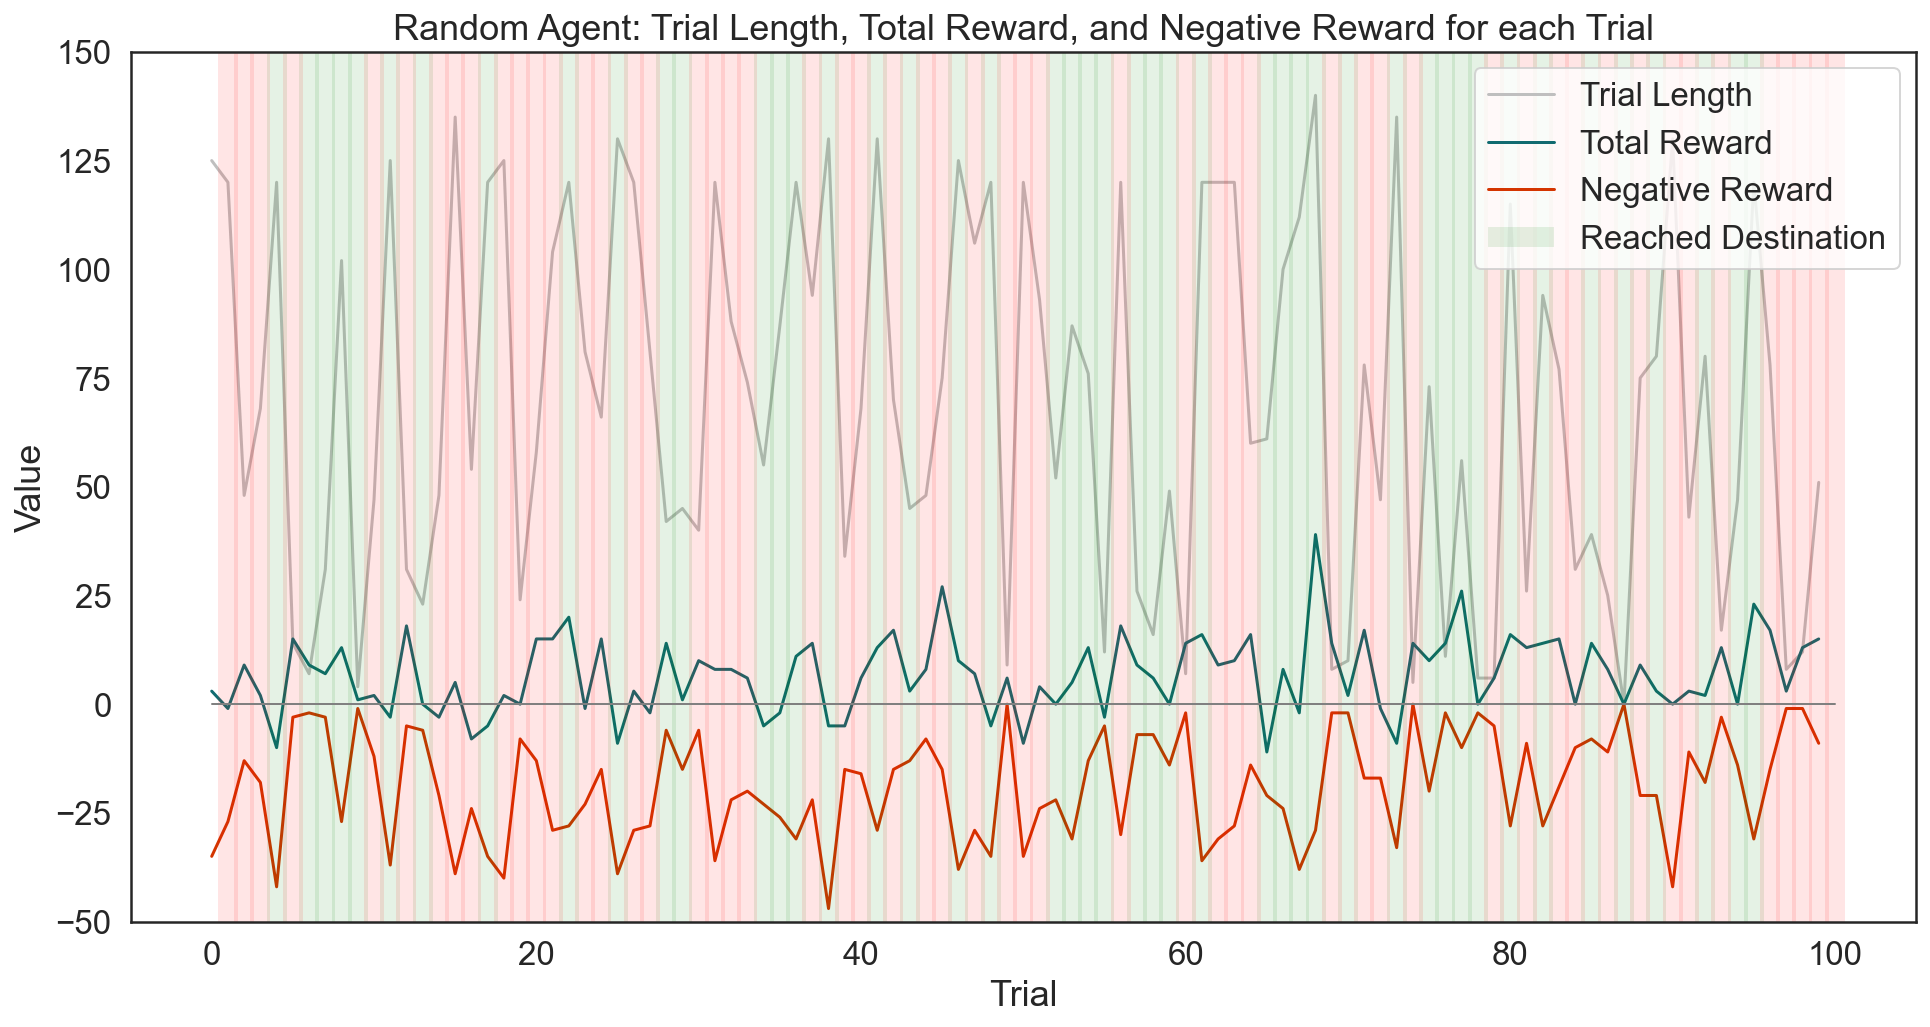

In [8]:
display_trial_stats(sns_data(df), 'Random Agent', -50, 150)

The above statistics and chart illustrate the results of simmulating 100 trials using the random action policy. In the chart, green means reached destination and red means unreached destination. As generally expected, given that the policy was a random selection from the four possible actions without taking into consideration any information about the agent's environment or state, the results are poor. The agent incurs a significant negative penalty in almost all of the trials. And it happens to reach the destination in 46 out of 100 trials. The variation of trial lengths is huge from 0 to 140, however, the numbers of steps taken in the trials are quite large for most of the iterations, which is inefficient.

## 4.3 Informing The Driving Agent

To enhance the driving agent taking random actions, we established the state space with the following inputs and outputs:

#### • Waypoint (the next move): 
Based on the car's current location, the waypoint is the next instructed action to reach its destination. Next waypoint has three alternative outputs: left, right, and forward. Waypoint is essential since it specifies the next action a car should take to reach its destination. Given a time constraint, it is necessary for the self-driving car to strike a balance between waypoint and environment (traffic laws, oncoming traffic, etc.) in order to get at the destination on time.

#### • Traffic light at an intersection:
At each intersection, the car will encounter a traffic signal. Green and red are the two possible outputs for a traffic light. This input provides the car with a sense of right and wrong (the rules of the road).

#### • Presence of oncoming vehicles:
At every intersection, the car will have the probability to encounter opposing traffic. With oncoming traffic, there are four possible outputs: left, right, forward, and none. Learning oncoming helps our car avoid accidents. The presence of oncoming vehicles is useful when making left or right turns.

#### • Positioned to the left:
The car incorporates the action of the vehicle to its left into its decision-making process at every intersection. With the car on our left, the possible outputs are: left, right, forward, and none. Accidents can be avoided by learning the surrounding vehicular behaviour.

Then, the total number of states in the environment should be 96 (3 for waypoint * 2 for traffic light * 4 for oncoming traffic * 4 for left position).

Still, the deadline is set as "False".

In [9]:
agent_informed = "/Users/tyc_219/Downloads/smartcab-master/results/informed_agent.json"
df1 = load_transform(agent_informed)
review_results(df1)

Successful trips:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
success                                                                        
0                  607      343      611      740      576      535      681   
1                    5        5        4        1        3        4        2   
All                612      348      615      741      579      539      683   

trip_interval  71 - 80  81 - 90  91 - 100   All  
success                                          
0                  339      318       588  5338  
1                    7        8         4    43  
All                346      326       592  5381


Rewards:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
reward                                                                         
-1                   0        1        2        1        0        0        0   
0                  124       57       83       76       72       86       72   
2                  483      285      527      663      504      451      610   
12                   5        5        3        1        3        2        1   
All                612      348      615      741      579      539      683   

trip_interval  71 - 80  81 - 90  91 - 100   All  
reward                                           
-1                   0        0         0     4  
0                   48       64        54   736  
2                  291      255       534  4603  
12                   7        7         4    38  
All                346      326       592  5381


Bad moves:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
bad_moves                                                                      
0                  612      347      613      740      579      539      683   
1                    0        1        2        1        0        0        0   
All                612      348      615      741      579      539      683   

trip_interval  71 - 80  81 - 90  91 - 100   All  
bad_moves                                        
0                  346      326       592  5377  
1                    0        0         0     4  
All                346      326       592  5381

In [10]:
publish_results(df1)

+----------+---------+-----------+
|  Trips   | Success | Bad moves |
+----------+---------+-----------+
| 01 - 10  |    5    |     0     |
| 11 - 20  |    5    |     1     |
| 21 - 30  |    4    |     2     |
| 31 - 40  |    1    |     1     |
| 41 - 50  |    3    |     0     |
| 51 - 60  |    4    |     0     |
| 61 - 70  |    2    |     0     |
| 71 - 80  |    7    |     0     |
| 81 - 90  |    8    |     0     |
| 91 - 100 |    4    |     0     |
+----------+---------+-----------+


/var/folders/km/k9s9s4zd24x08bnyw38g8g3c0000gn/T/ipykernel_63644/2714475285.py:50: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(tabulate(df.groupby(['trip_interval'])['success','bad_moves'].sum(),


It can be seen that the "bad moves" are very low.

In [13]:
print(df1.sort_values(by=['trip', 't']).head())

  action  reward  t  light oncoming location  success destination  \
0  right       2  0  green     None   [4, 1]        0      [3, 6]   
1  right       2  1    red     None   [3, 2]        0      [3, 6]   
2  right       2  2  green     None   [4, 1]        0      [3, 6]   
3  right       2  3  green     None   [3, 2]        0      [3, 6]   
4  right       2  4    red     None   [4, 1]        0      [3, 6]   

   moves_taken  trip alpha  gamma initial_value  sim_num trip_interval  \
0            0     1    {}    0.2          zero        1       01 - 10   
1            1     1    {}    0.2          zero        1       01 - 10   
2            2     1    {}    0.2          zero        1       01 - 10   
3            3     1    {}    0.2          zero        1       01 - 10   
4            4     1    {}    0.2          zero        1       01 - 10   

   bad_moves  
0          0  
1          0  
2          0  
3          0  
4          0  


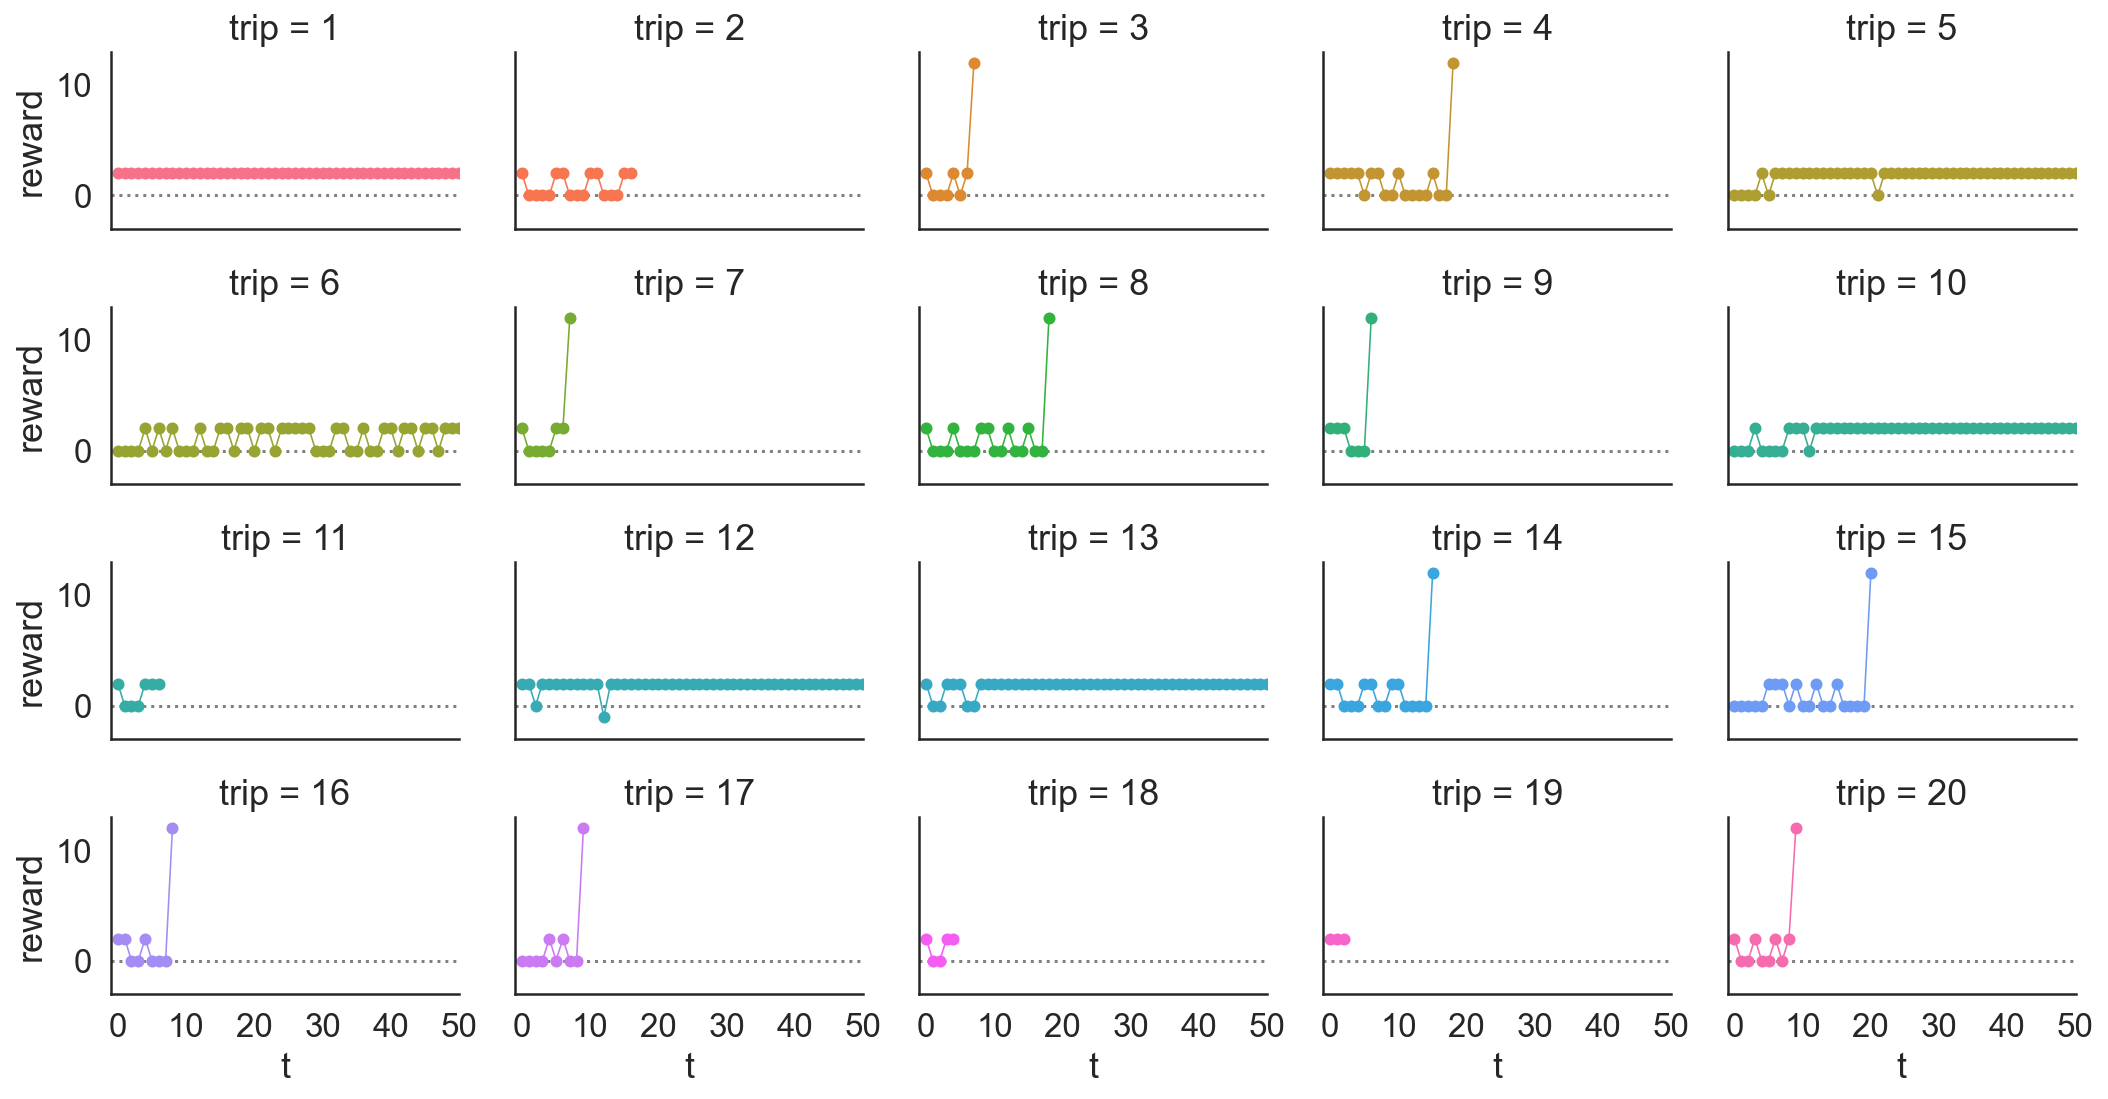

In [14]:
# plot the first 20 trips
first_20 = df1[df1['trip'] <= 20]
plot_path(first_20, "/Users/tyc_219/Downloads/smartcab-master/results/agent_inf.png")

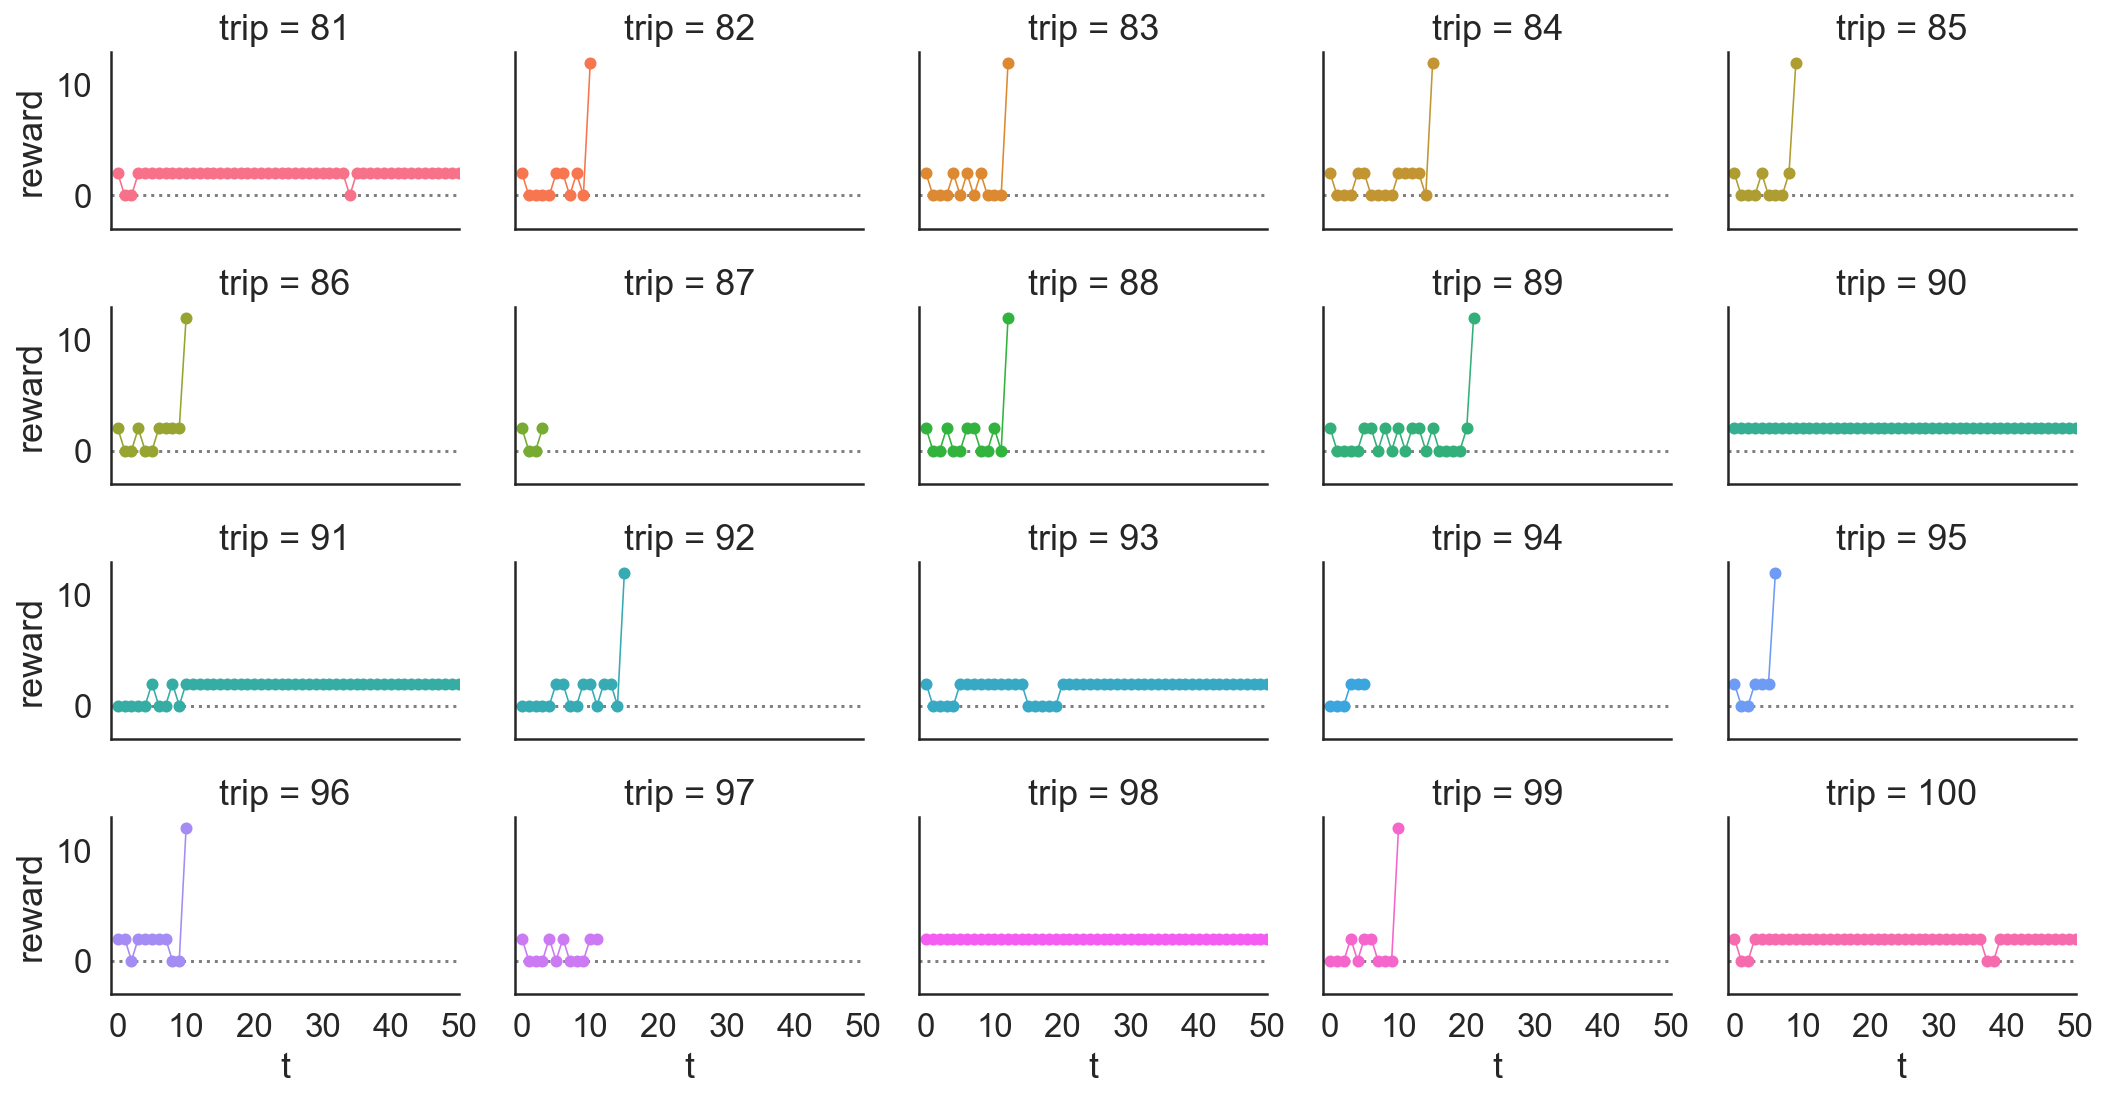

In [15]:
# plot the last 20 trips
last_20 = df1[df1['trip'] >= 81]
plot_path(last_20, "/Users/tyc_219/Downloads/smartcab-master/results/agent_inf1.png")

The agent is conservative, its reward is mainly around 2, which indicates the agent is safe and always obeys the traffic rules.

The destination was reached in 43 out of 100 trials.


count   mean         std  min   25%   50%     75%    max
total_reward       100.0  96.58  108.619266  4.0  17.5  22.0  238.25  284.0
total_nega_reward  100.0   0.04    0.242878  0.0   0.0   0.0    0.00    2.0
trial_length       100.0  52.81   56.723625  2.0   9.0  15.0  125.00  150.0

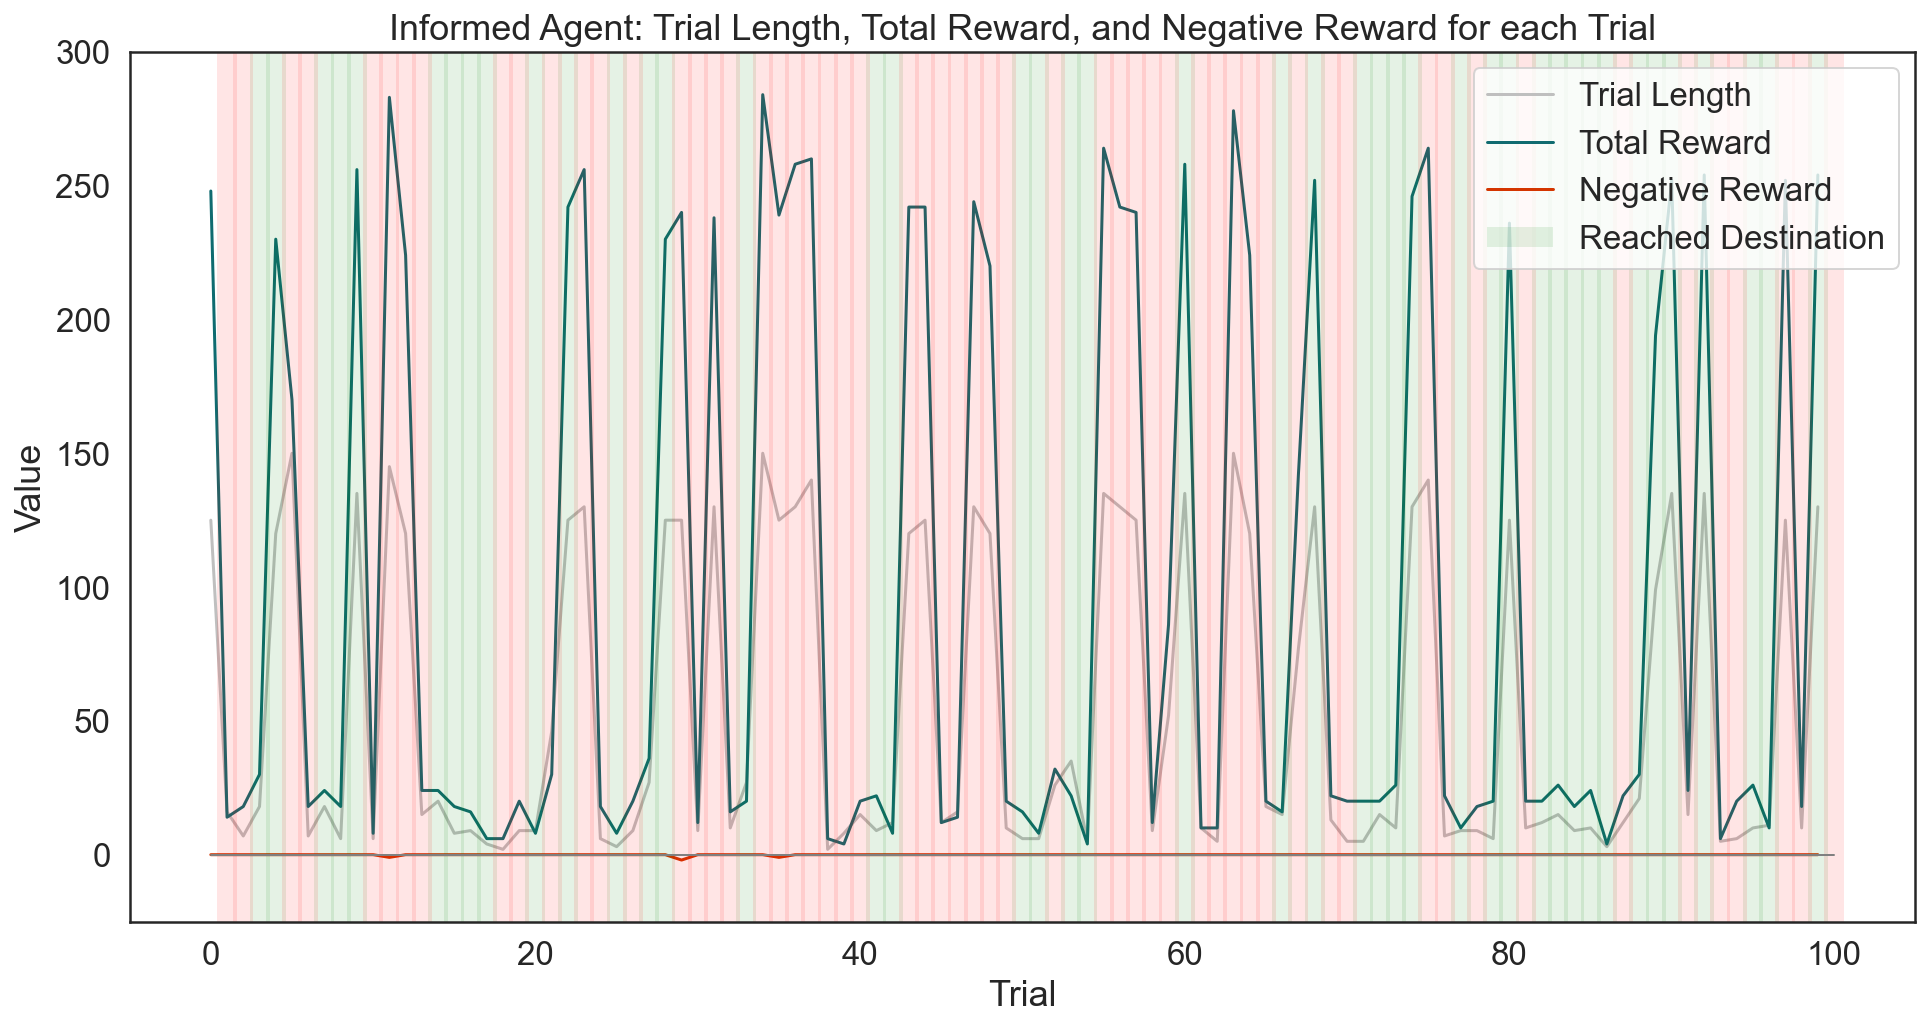

In [17]:
display_trial_stats(sns_data(df1), 'Informed Agent', -25, 300)

The informed driving agent is given all of the infomation it needs to navigate the environment, the negative reward is around zero and the total reward is high. Apparently, the informed agent performs better than the random agent. The agent reaches the destination without incurring a negative reward. This analysis requires the knowledge of the outcomes for each trial, but it purely acts as meta information to analyse the agent performance and isn't used to influence the behaviour of the agent.

In the case of this project, the Q-matrix is likely to be fairly sparse because there are only three other agents in the environment. The likelihood of agents occupying all three opposing directions of traffic at an intersection is extremely low, and the agent would have to encounter all of the permutations within the state space several times throughout a simulation. To even come close to completing the complete Q-matrix for this project, each simulation would have to have considerably more trials than the default 100 or many more additional agents.

It is worth noting that in the context of this project where there are only three other agents within the environment, the Q-matrix is likely to be quite sparse. The probability that there are agents occupying all three opposing directions of traffic at an intersection is very low and this would have to happen many times within a simulation for the agent to encounter all of the permutations within the state space. Each simulation would have to include far more trials than the default 100 or many more other agents to even come close to filling the entire Q-matrix for this project. Given that a high performing agent only needs to learn the optimal actions for the highest probability states and that 100 trials should be adequate for the sample probability of states to match the population probabilities, a sparse Q-matrix should suffice to attain the optimal policy.

Considering that the self-driving car would make 100 trips, the size of the state place is manageable at 96. We decided to exclude inputs such as the deadline for cars or the position to their right. Adding the position to the right will increase the state space from 96 to 384. By removing these inputs, the number of states is made more manageable and the agent is given more time to learn and explore more states. For each trip, a passenger provides the self-driving car an arbitrary deadline (number of moves, i.e. 20, 30, 60, etc.) to drive them to their destination. While driving through the city (for each action taken during a trip), the car investigates a state. Given the objective of Q-Learning (learn and make informed decisions about each state), our environment must be small enough for our car to explore the majority of states multiple times before learning the environment. Therefore, we did not set deadlines and it does not prevent the car from reaching its destination. Taking random actions in a six by eight traffic grid with no deadlines, does not prevent the car from reaching its destination. It just needs a little extra time. The drawback is the self-driving car commits many "mistakes" (commits traffic violations and gets into accidents) while random driving around the city.

Besides, if the ideal direction of travel would not result in a legal move, the agent takes no action (an action of "None"). This policy ensures the maximum reward without incurring any negative rewards.

Although incorporating the delay value in the agent state may allow the policy to be customised at different phases of the trial, it is unneeded if the present policy will arrive at the destination on time and maximise the reward. The chart of the informed driving simulation clearly illustrates that the agent arrives at the destination without regard for the deadline. As a result, the deadline value has no effect on the informed agent's status or policy.

Therefore, when implementing the Q-Learning agent, the delay value will be crucial since it will inform the probability of exploration, allowing the agent to explore more at the start of a trial and less at the end.

## 4.4 Implementing A Q-Learning Driving Agent

With the agent is capable of interpreting the input information and constructing a mapping of environmental states, using reinforcement learning techniques, the next objective is to demonstrate the car's ability to work in real-time while being safe and efficient while navigating the city. Based on the Q-values for the current state and action, the driving agent determines the best action at each time step. Each action taken by the car will result in a reward based on the state of the environment. When updating the Q-values, the Q-Learning driving agent will have to take these rewards into account.

To do this, we implemented the Q-Learning algorithm which directs the car to choose the action with the greatest future reward given a state. After initialising all potential state variables to 0, the car explores the city and updates its Q-table (a look-up table where it keeps track of the Q-values for all the states it visits). As illustrated mathematically before:
$$Q(s_t,a_t)=Q(s_t,a_t)+\alpha(r_{t+1}+\gamma \mathop{\max}\limits_{a}Q(s_{t+1},a)-Q(s_t,a_t)).$$
$Q(s_t,a_t)$ represents the quantity of a state-action combination at a particular time step. $Q(s_t,a_t)$ on the left is the new estimate, $Q(s_t,a_t)$ on the right is the old estimate. Alpha, or $\alpha$ is the learning rate, which is the extent new information overrides old information for the car. A learning rate close to 0 indicates that the car will process new information more slowly, while an alpha close to 1 indicates that new information will be processed more quickly. The reward of shifting to a new state is $R(s)$. The discount factor, or $\gamma$ is applied to the future q-value of the state to assess the relative value of future rewards versus immediate rewards. A factor of 0 will cause the car to be "short-sighted" and only consider immediate rewards, whilst a factor approaching 1 will cause it to prioritise long-term rewards. $Argmax$ is the maximum expected reward based on all actions that could be taken in the subsequent state. Simply expressed, the new action value = the old value + the learning rate $X$ (new information - old information).

Set the simulation deadline enforcement "enforce_deadline" to "True".

### 4.4.1 Q-Learning agent with "None" initial state  

We first simulated the basic Q-Learning agent, where the initial state is "None".

In [18]:
df2 = load_transform("/Users/tyc_219/Downloads/smartcab-master/results/q_agent.json")
review_results(df2)

Successful trips:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
success                                                                        
0                  181      146      244      184      196      143      144   
1                    5        5        1        2        6        5        5   
All                186      151      245      186      202      148      149   

trip_interval  71 - 80  81 - 90  91 - 100   All  
success                                          
0                  147      163       176  1724  
1                    6        5         5    45  
All                153      168       181  1769


Rewards:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
reward                                                                         
-1                   7        4        2        1        0        0        1   
0                   90       58       77       45       44       38       34   
2                   84       84      165      138      152      105      109   
12                   5        5        1        2        6        5        5   
All                186      151      245      186      202      148      149   

trip_interval  71 - 80  81 - 90  91 - 100   All  
reward                                           
-1                   0        0         1    16  
0                   55       53        71   565  
2                   92      110       104  1143  
12                   6        5         5    45  
All                153      168       181  1769


Bad moves:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
bad_moves                                                                      
0                  179      147      243      185      202      148      148   
1                    7        4        2        1        0        0        1   
All                186      151      245      186      202      148      149   

trip_interval  71 - 80  81 - 90  91 - 100   All  
bad_moves                                        
0                  153      168       180  1753  
1                    0        0         1    16  
All                153      168       181  1769

When the car is informed about our state space, there is a significant reduction in the number of mistakes it makes during the simulation compared to simulations for our random action driving agents. It is clear that the "bad moves" decrease significantly after the first 10 trips and keep decreasing as the trials increase. The agent behaves randomly with more trials than not failing to reach the destination, but after about 10 trials this likelihood flips. When compared to the informed driving agent, the Q-Learning driving agent makes slightly more mistakes but arrives at its destination at a similar rate - learning to make fewer mistakes as it completes more trips.

The destination was reached in 45 out of 100 trials.


count   mean        std  min    25%   50%   75%   max
total_reward       100.0  28.10  19.469998  4.0  16.00  20.0  34.5  82.0
total_nega_reward  100.0   0.16   0.563539  0.0   0.00   0.0   0.0   4.0
trial_length       100.0  16.69  11.116186  1.0   7.75  14.5  25.0  50.0

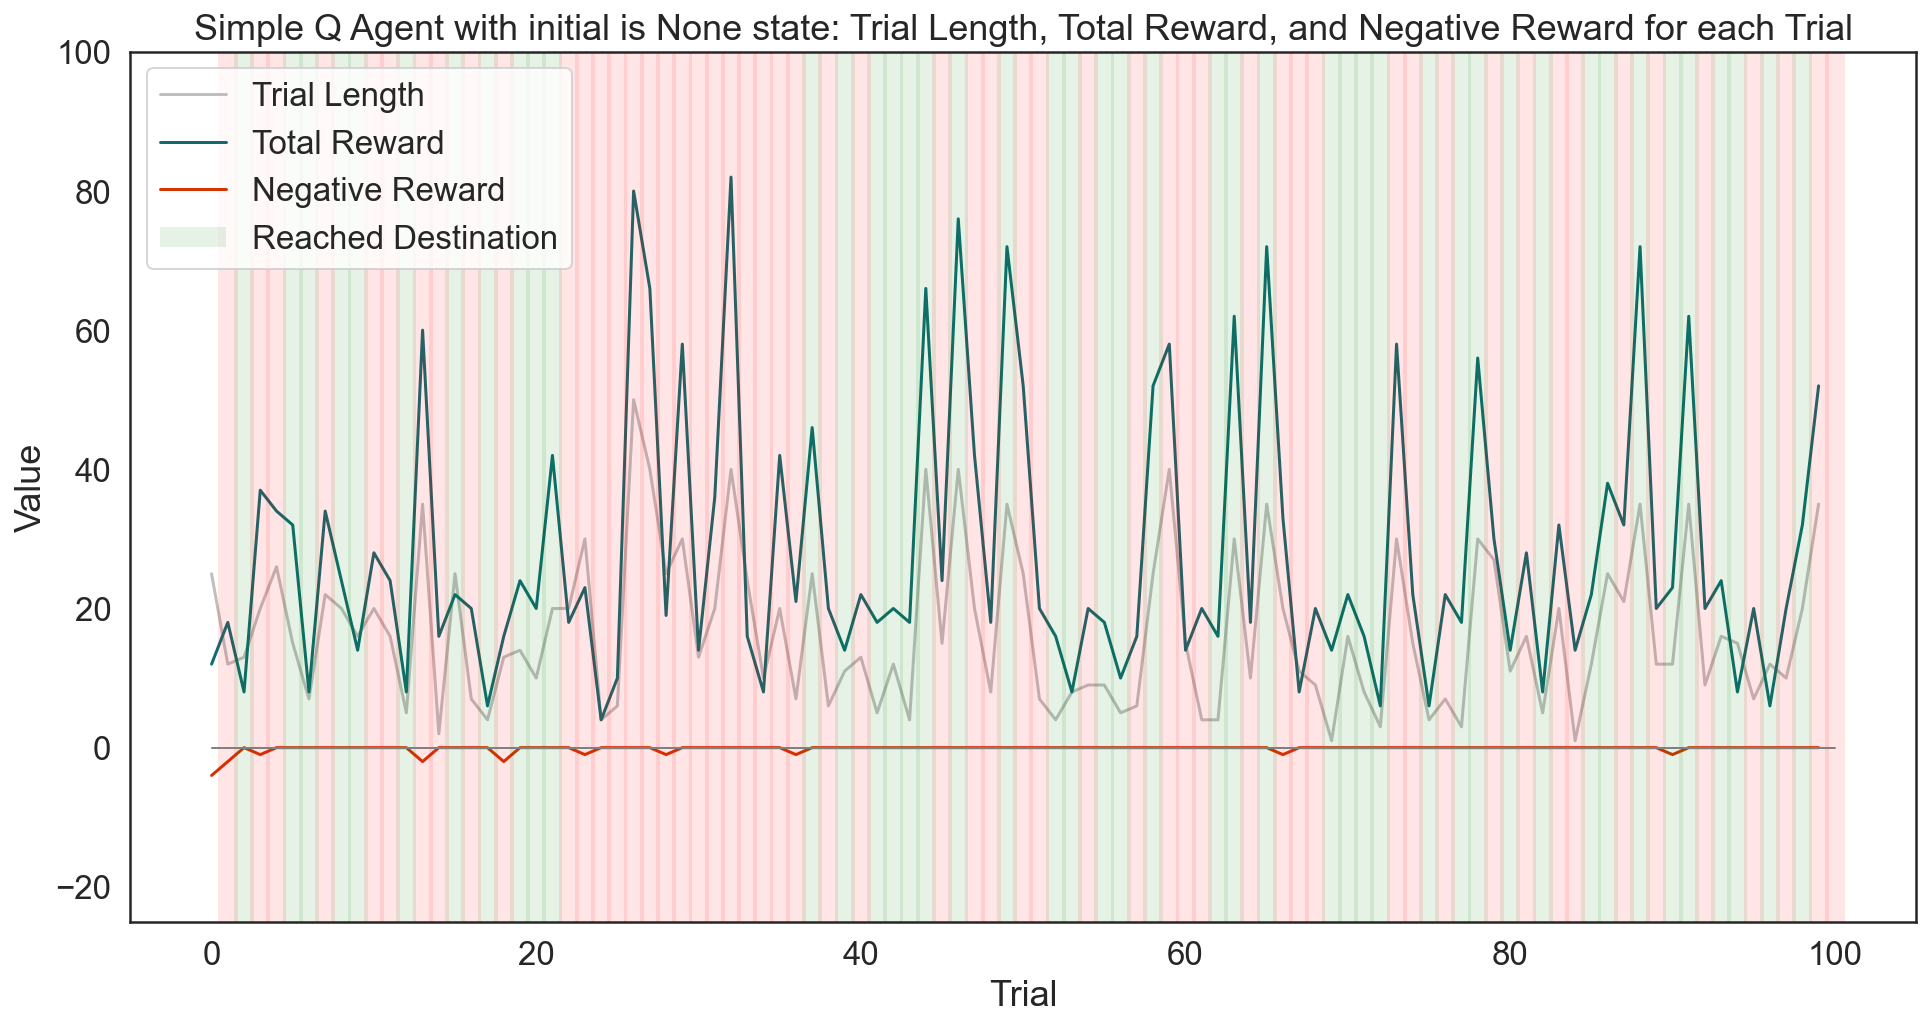

In [20]:
display_trial_stats(sns_data(df2), 'Simple Q Agent with initial is None state', -25, 100)

We further simulated the agent with 1000 times. 

In [16]:
agent_q = "/Users/tyc_219/Downloads/smartcab-master/results/q_agent_sim_1000.json"
df3 = load_transform(agent_q)
review_results(df3)

Successful trips:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
success                                                                        
0               202288   185414   183982   182974   184711   179247   181300   
1                 4155     4584     4574     4504     4500     4692     4508   
All             206443   189998   188556   187478   189211   183939   185808   

trip_interval  71 - 80  81 - 90  91 - 100      All  
success                                             
0               182702   182263    180639  1845520  
1                 4480     4525      4445    44967  
All             187182   186788    185084  1890487


Rewards:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
reward                                                                         
-1                5481     1489     1362     1157     1081     1022      945   
0                84574    72216    70314    68684    68995    67604    66900   
2               112233   111709   112306   113133   114635   110621   113455   
9                   95       45       31       23       35       30       33   
12                4060     4539     4543     4481     4465     4662     4475   
All             206443   189998   188556   187478   189211   183939   185808   

trip_interval  71 - 80  81 - 90  91 - 100      All  
reward                                              
-1                 826      769       702    14834  
0                66410    66574     66038   698309  
2               115466   114920    113899  1132377  
9                   31       22        20      365  
12                4449     4503      4425    44602  
All             187182   186788    185084  1890487


Bad moves:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
bad_moves                                                                      
0               200962   188509   187194   186321   188130   182917   184863   
1                 5481     1489     1362     1157     1081     1022      945   
All             206443   189998   188556   187478   189211   183939   185808   

trip_interval  71 - 80  81 - 90  91 - 100      All  
bad_moves                                           
0               186356   186019    184382  1875653  
1                  826      769       702    14834  
All             187182   186788    185084  1890487

In [69]:
publish_results1(df3, 1000)

/var/folders/km/k9s9s4zd24x08bnyw38g8g3c0000gn/T/ipykernel_32761/1749605324.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(tabulate(df.groupby(['trip_interval'])['success','bad_moves'].sum()/n,


+----------+---------+-----------+
|  Trips   | Success | Bad moves |
+----------+---------+-----------+
| 01 - 10  |  4.155  |   5.481   |
| 11 - 20  |  4.584  |   1.489   |
| 21 - 30  |  4.574  |   1.362   |
| 31 - 40  |  4.504  |   1.157   |
| 41 - 50  |   4.5   |   1.081   |
| 51 - 60  |  4.692  |   1.022   |
| 61 - 70  |  4.508  |   0.945   |
| 71 - 80  |  4.48   |   0.826   |
| 81 - 90  |  4.525  |   0.769   |
| 91 - 100 |  4.445  |   0.702   |
+----------+---------+-----------+


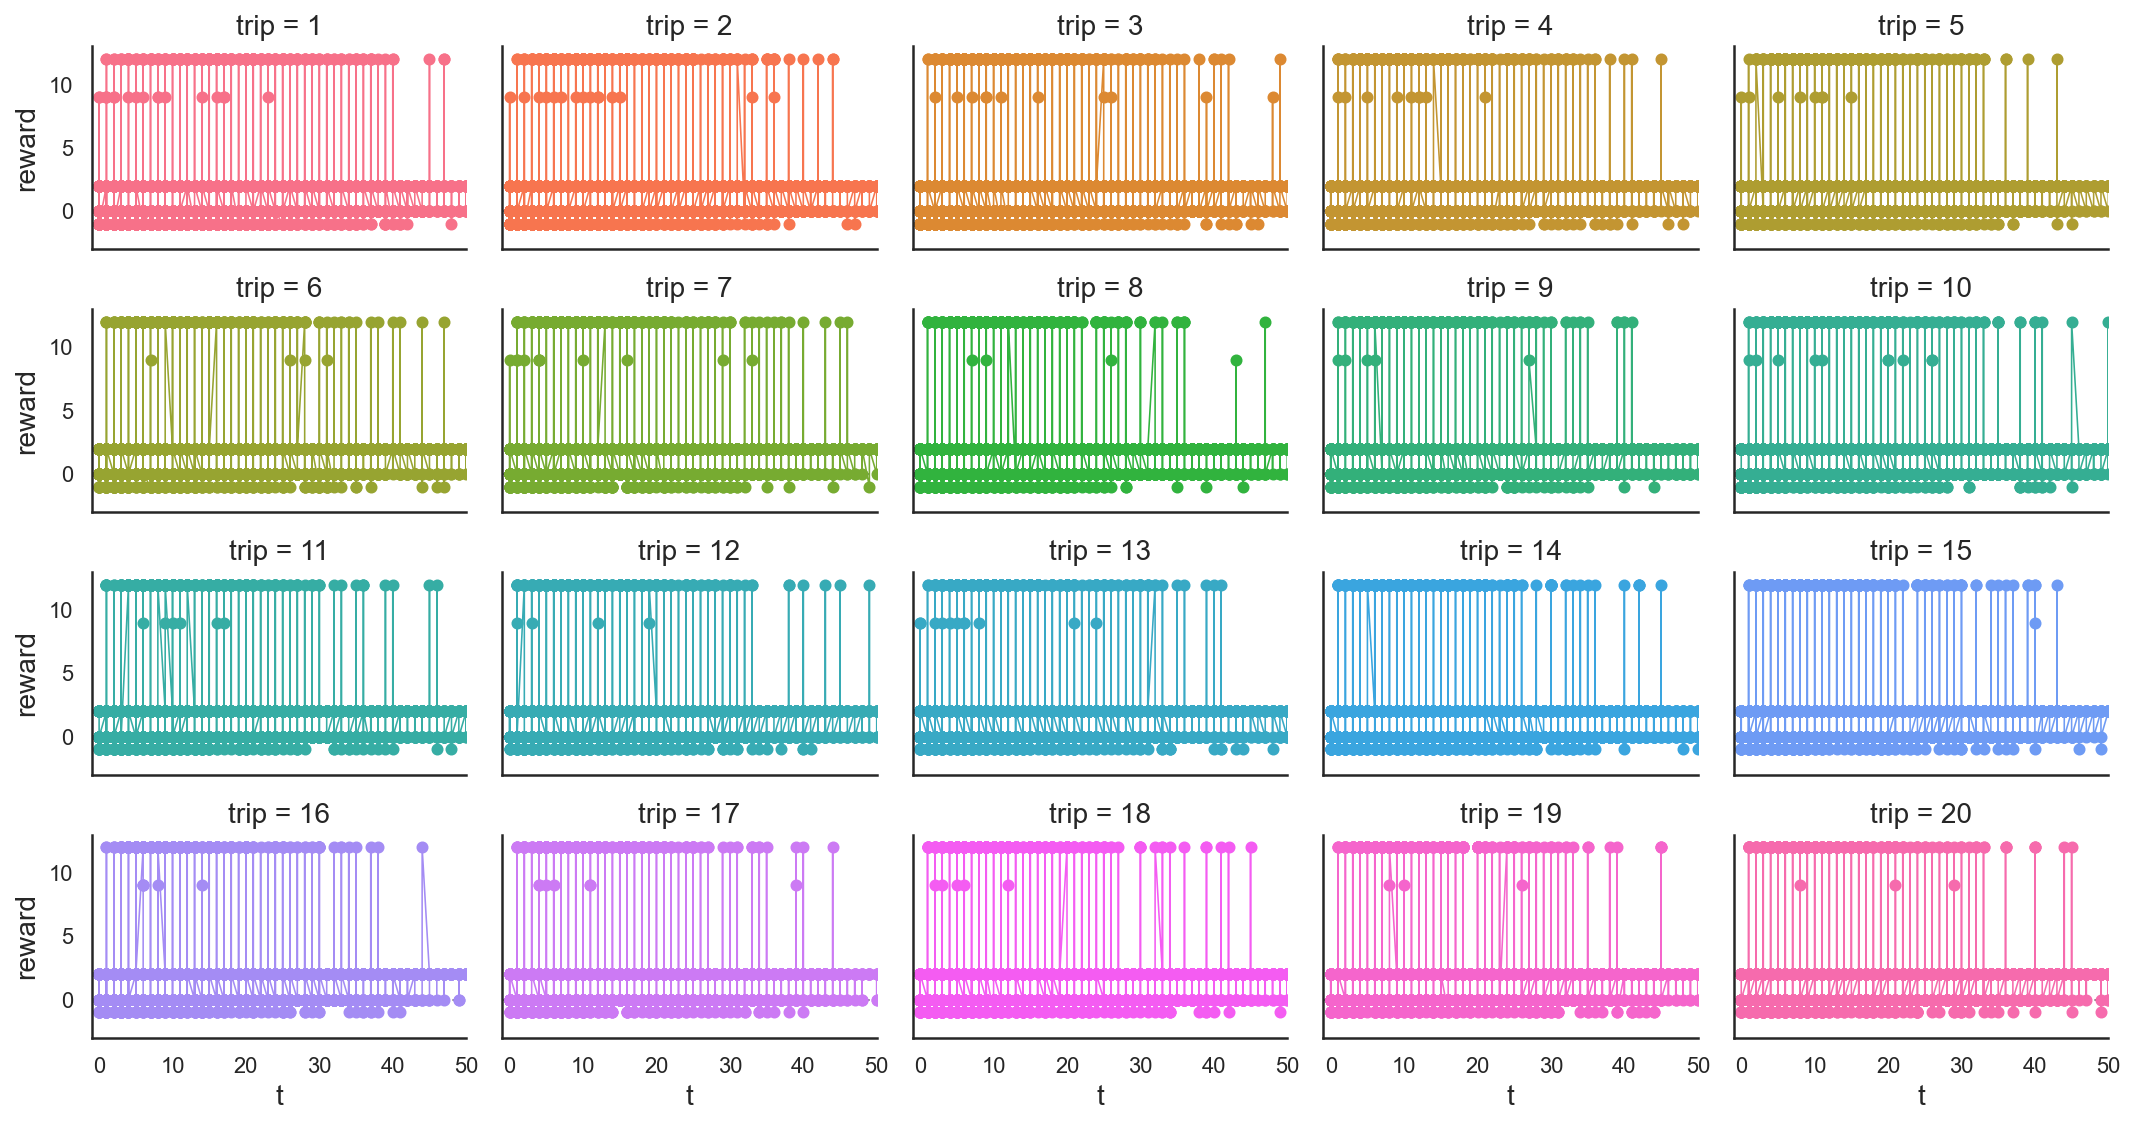

In [74]:
# plot the first 20 trials 
first_20 = df3[df3['trip'].apply(lambda x: 0 < x <= 20)]
plot_path(first_20, '/Users/tyc_219/Downloads/smartcab-master/results/q_learn.png')

From the above results, it is clear that the Q-Learning agent incurs fewer negative rewards along the way. Now the agent is always taking the "safest action" - takes the action with the biggest reward, the agent learns to make fewer mistakes as it completes more trips, leading to an extremely little number of mistakes at the end. After 40 trials, the agent learns to reach the destination before the deadline more frequently and commits fewer negative rewards. The agent has likely met the most common states enough times by the 40th trial to have developed sufficiently stable Q-values for those state-action pairs.

### 4.4.2 Q-Learning agent with random initial state

We further changed the initial state into random, which has 10 random states before starting to learn.

In [21]:
agent = "/Users/tyc_219/Downloads/smartcab-master/results/optimal_agent.json"
df4 = load_transform(agent)
review_results(df4) 

Successful trips:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
success                                                                        
0                  212      217      161      194      146      304      247   
1                    5        4        4        3        4        1        1   
All                217      221      165      197      150      305      248   

trip_interval  71 - 80  81 - 90  91 - 100   All  
success                                          
0                  259      295       272  2307  
1                    3        0         1    26  
All                262      295       273  2333


Rewards:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
reward                                                                         
-1                   6        2        2        1        2        0        0   
0                   73       46       47       59       64      168      146   
2                  133      169      112      134       80      136      101   
12                   5        4        4        3        4        1        1   
All                217      221      165      197      150      305      248   

trip_interval  71 - 80  81 - 90  91 - 100   All  
reward                                           
-1                   3        1         3    20  
0                  163      168       161  1095  
2                   93      126       108  1192  
12                   3        0         1    26  
All                262      295       273  2333


Bad moves:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
bad_moves                                                                      
0                  211      219      163      196      148      305      248   
1                    6        2        2        1        2        0        0   
All                217      221      165      197      150      305      248   

trip_interval  71 - 80  81 - 90  91 - 100   All  
bad_moves                                        
0                  259      294       270  2313  
1                    3        1         3    20  
All                262      295       273  2333

In [22]:
first_ten = df4[df4['trip_interval'] == '01 - 10']

In [23]:
first_ten['moves_left'] = first_ten['max_moves'] - first_ten['moves_taken']

/var/folders/km/k9s9s4zd24x08bnyw38g8g3c0000gn/T/ipykernel_63644/657476146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_ten['moves_left'] = first_ten['max_moves'] - first_ten['moves_taken']


In [27]:
# the first 10 trials
cols = ['trip', 't', 'destination', 'location', 'light', 'way_point', 'oncoming',
        'left', 'action', 'reward', 'moves_left']
check_df = first_ten[cols]
stagnent = check_df[check_df['reward'] < 2]
display(stagnent)
print(tabulate(stagnent, headers=(cols), tablefmt='pretty', missingval='None'))

trip  t destination location  light way_point oncoming  left   action  \
0       1  0      [4, 6]   [5, 1]  green      left     None  None     left   
2       1  2      [4, 6]   [6, 2]  green     right     None  None  forward   
4       1  4      [4, 6]   [6, 3]  green   forward     None  None     None   
5       1  5      [4, 6]   [6, 3]  green   forward     None  None     None   
6       1  6      [4, 6]   [6, 2]    red      left     None  None    right   
..    ... ..         ...      ...    ...       ...      ...   ...      ...   
182    10  1      [3, 4]   [6, 2]    red   forward     None  None     None   
183    10  2      [3, 4]   [6, 2]    red   forward     None  None     None   
186    10  5      [3, 4]   [4, 2]    red   forward     None  None     None   
187    10  6      [3, 4]   [4, 2]    red   forward     None  None     None   
188    10  7      [3, 4]   [4, 2]    red   forward     None  None     None   

     reward  moves_left  
0         0          25  
2         0          23  
4         0          21  
5         0          20  
6         0          19  
..      ...         ...  
182       0          34  
183       0          33  
186       0          30  
187       0          29  
188       0          28  

[79 rows x 11 columns]

+-----+------+----+-------------+----------+-------+-----------+----------+------+---------+--------+------------+
|     | trip | t  | destination | location | light | way_point | oncoming | left | action  | reward | moves_left |
+-----+------+----+-------------+----------+-------+-----------+----------+------+---------+--------+------------+
|  0  |  1   | 0  |   [4, 6]    |  [5, 1]  | green |   left    |   None   | None |  left   |   0    |     25     |
|  2  |  1   | 2  |   [4, 6]    |  [6, 2]  | green |   right   |   None   | None | forward |   0    |     23     |
|  4  |  1   | 4  |   [4, 6]    |  [6, 3]  | green |  forward  |   None   | None |  None   |   0    |     21     |
|  5  |  1   | 5  |   [4, 6]    |  [6, 3]  | green |  forward  |   None   | None |  None   |   0    |     20     |
|  6  |  1   | 6  |   [4, 6]    |  [6, 2]  |  red  |   left    |   None   | None |  right  |   0    |     19     |
|  8  |  1   | 8  |   [4, 6]    |  [6, 2]  |  red  |   left    |   None   | None

In [28]:
last_ten = df4[df4['trip_interval'] == '91 - 100']

In [29]:
last_ten['moves_left'] = last_ten['max_moves'] - last_ten['moves_taken']

/var/folders/km/k9s9s4zd24x08bnyw38g8g3c0000gn/T/ipykernel_63644/1939934603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_ten['moves_left'] = last_ten['max_moves'] - last_ten['moves_taken']


In [30]:
# the last ten trials
cols = ['trip', 't', 'destination', 'location', 'light', 'way_point', 'oncoming',
        'left', 'action', 'reward', 'moves_left']
check_df = last_ten[cols]
stagnent = check_df[check_df['reward'] < 2]
display(stagnent)
print(tabulate(stagnent, headers=(cols), tablefmt='pretty', missingval='None'))

trip  t destination location  light way_point oncoming  left   action  \
2060    91  0      [2, 3]   [7, 3]    red      left     None  None     None   
2061    91  1      [2, 3]   [7, 3]    red      left     None  None     None   
2062    91  2      [2, 3]   [7, 3]    red      left     None  None     None   
2063    91  3      [2, 3]   [8, 3]  green     right     None  None    right   
2065    91  5      [2, 3]   [8, 3]  green     right     None  None    right   
...    ... ..         ...      ...    ...       ...      ...   ...      ...   
2308    99  2      [2, 1]   [4, 1]    red   forward     None  None     None   
2309    99  3      [2, 1]   [4, 1]    red   forward     None  None     None   
2310    99  4      [2, 1]   [4, 1]    red   forward     None  None     None   
2312   100  0      [5, 2]   [4, 5]    red     right     None  None  forward   
2313   100  1      [5, 2]   [4, 5]    red     right     None  None     left   

      reward  moves_left  
2060       0          25  
2061       0          24  
2062       0          23  
2063       0          22  
2065       0          20  
...      ...         ...  
2308       0          43  
2309       0          42  
2310       0          41  
2312      -1          20  
2313      -1          19  

[164 rows x 11 columns]

+------+------+----+-------------+----------+-------+-----------+----------+------+---------+--------+------------+
|      | trip | t  | destination | location | light | way_point | oncoming | left | action  | reward | moves_left |
+------+------+----+-------------+----------+-------+-----------+----------+------+---------+--------+------------+
| 2060 |  91  | 0  |   [2, 3]    |  [7, 3]  |  red  |   left    |   None   | None |  None   |   0    |     25     |
| 2061 |  91  | 1  |   [2, 3]    |  [7, 3]  |  red  |   left    |   None   | None |  None   |   0    |     24     |
| 2062 |  91  | 2  |   [2, 3]    |  [7, 3]  |  red  |   left    |   None   | None |  None   |   0    |     23     |
| 2063 |  91  | 3  |   [2, 3]    |  [8, 3]  | green |   right   |   None   | None |  right  |   0    |     22     |
| 2065 |  91  | 5  |   [2, 3]    |  [8, 3]  | green |   right   |   None   | None |  right  |   0    |     20     |
| 2067 |  91  | 7  |   [2, 3]    |  [7, 3]  |  red  |   left    |   None

In [31]:
def plot_path(df, path, deadline=False):
    df = df.sort_values(by=['trip', 't'])
    grid = sns.FacetGrid(df, col="trip", 
                         hue="trip",
                         col_wrap=5,
                         height=2.0,
                         aspect=1.5)
    grid.map(plt.axhline, y=0, ls=":", c=".5", label='No move')
    grid.map(plt.plot, "t", "reward", marker="o", ms=5, lw=.8)

    if deadline:
        grid.set(xticks=np.linspace(0, 50, 6, endpoint=True), xlim=(-1, 50), ylim=(-3, 13))
    else:
        grid.set(xticks=np.linspace(0, 150, 6, endpoint=True), xlim=(-1, 150), ylim=(-3, 13))
    grid.fig.tight_layout(w_pad=1)
    plt.savefig(path)
    plt.show()

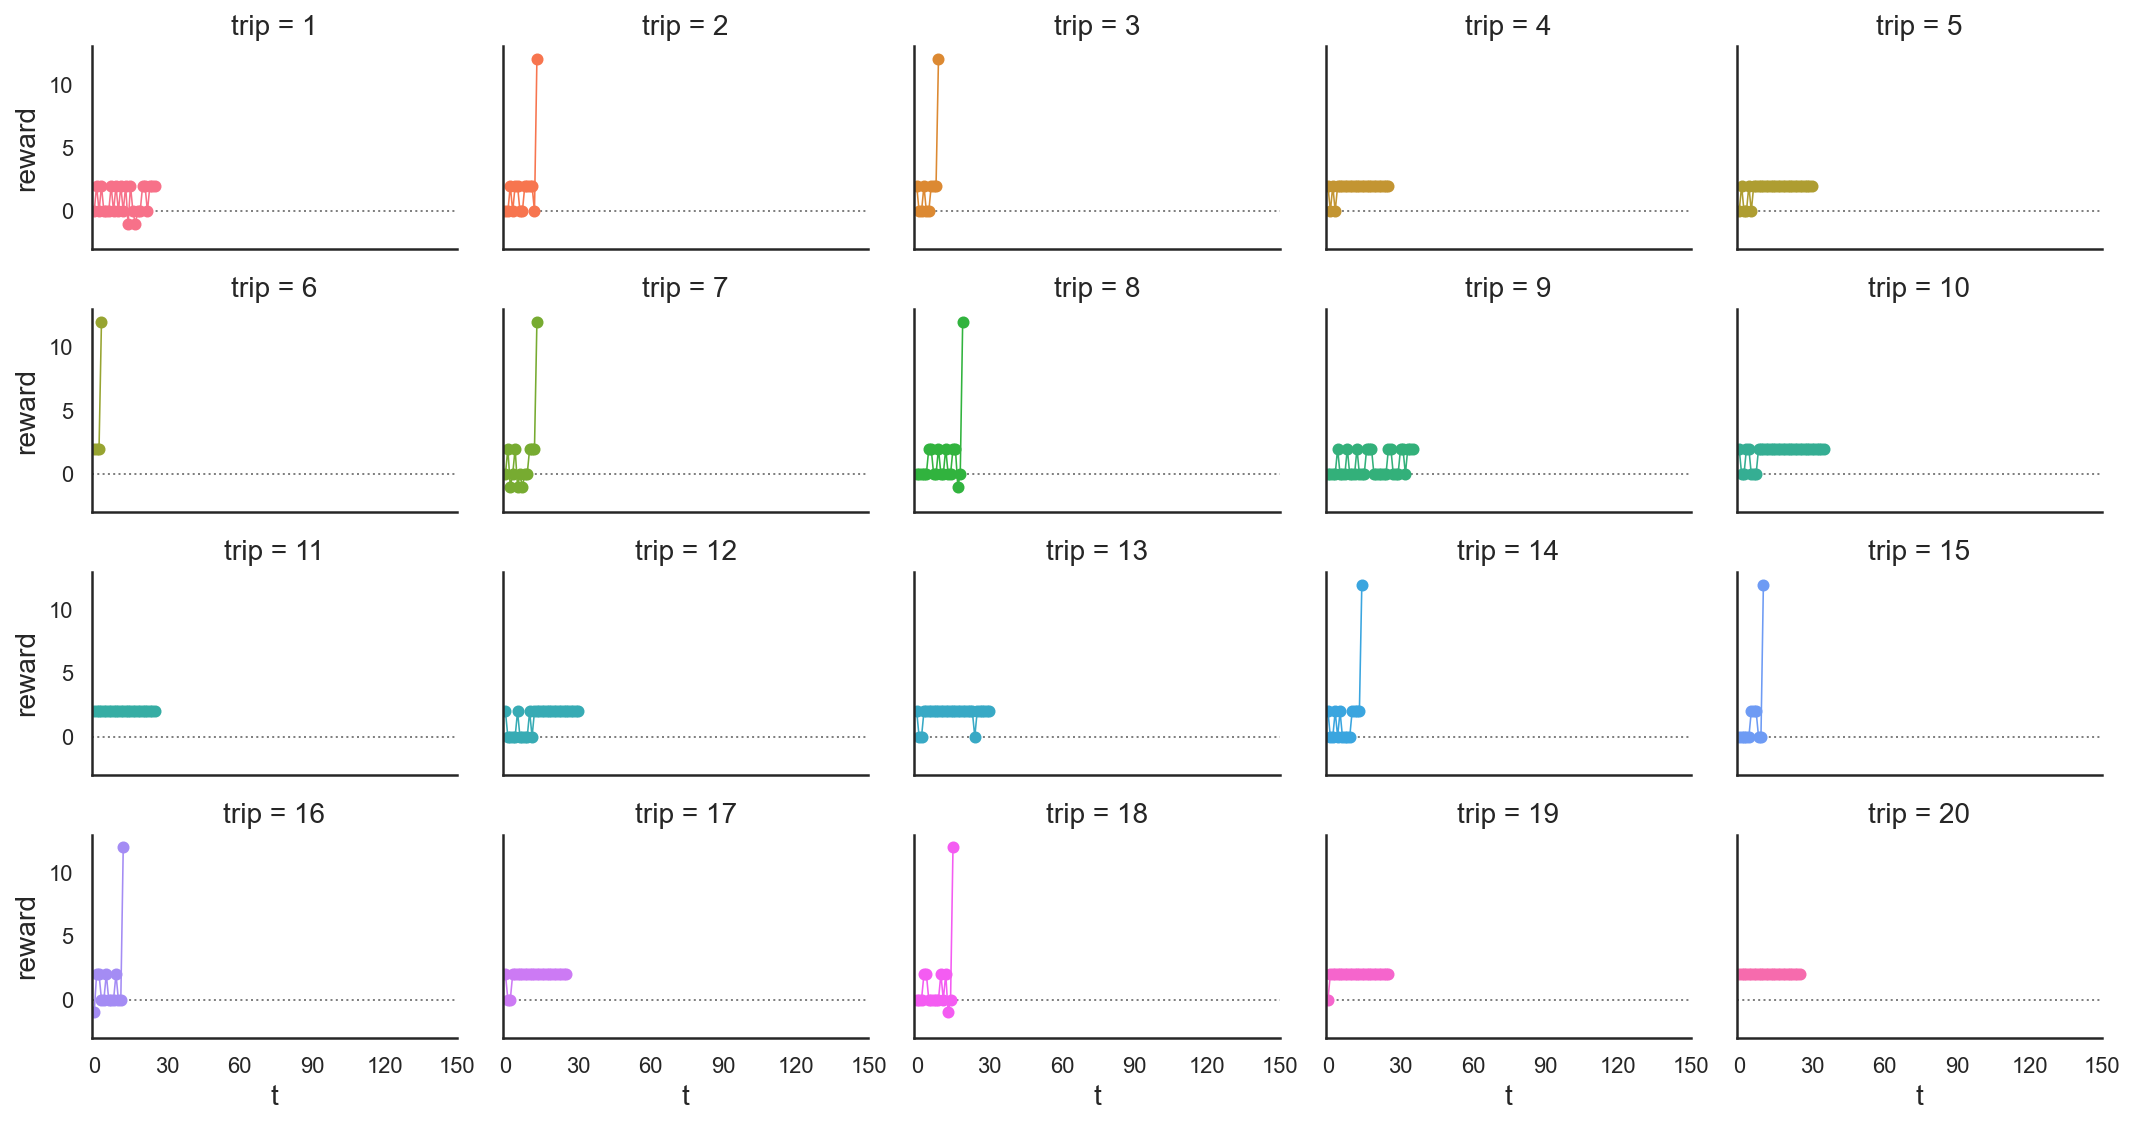

In [32]:
# plot the first 20 trials 
plot_path(df4[df4['trip'].apply(lambda x: x <= 20)],
          path="/Users/tyc_219/Downloads/smartcab-master/results/optmized_agent.png")

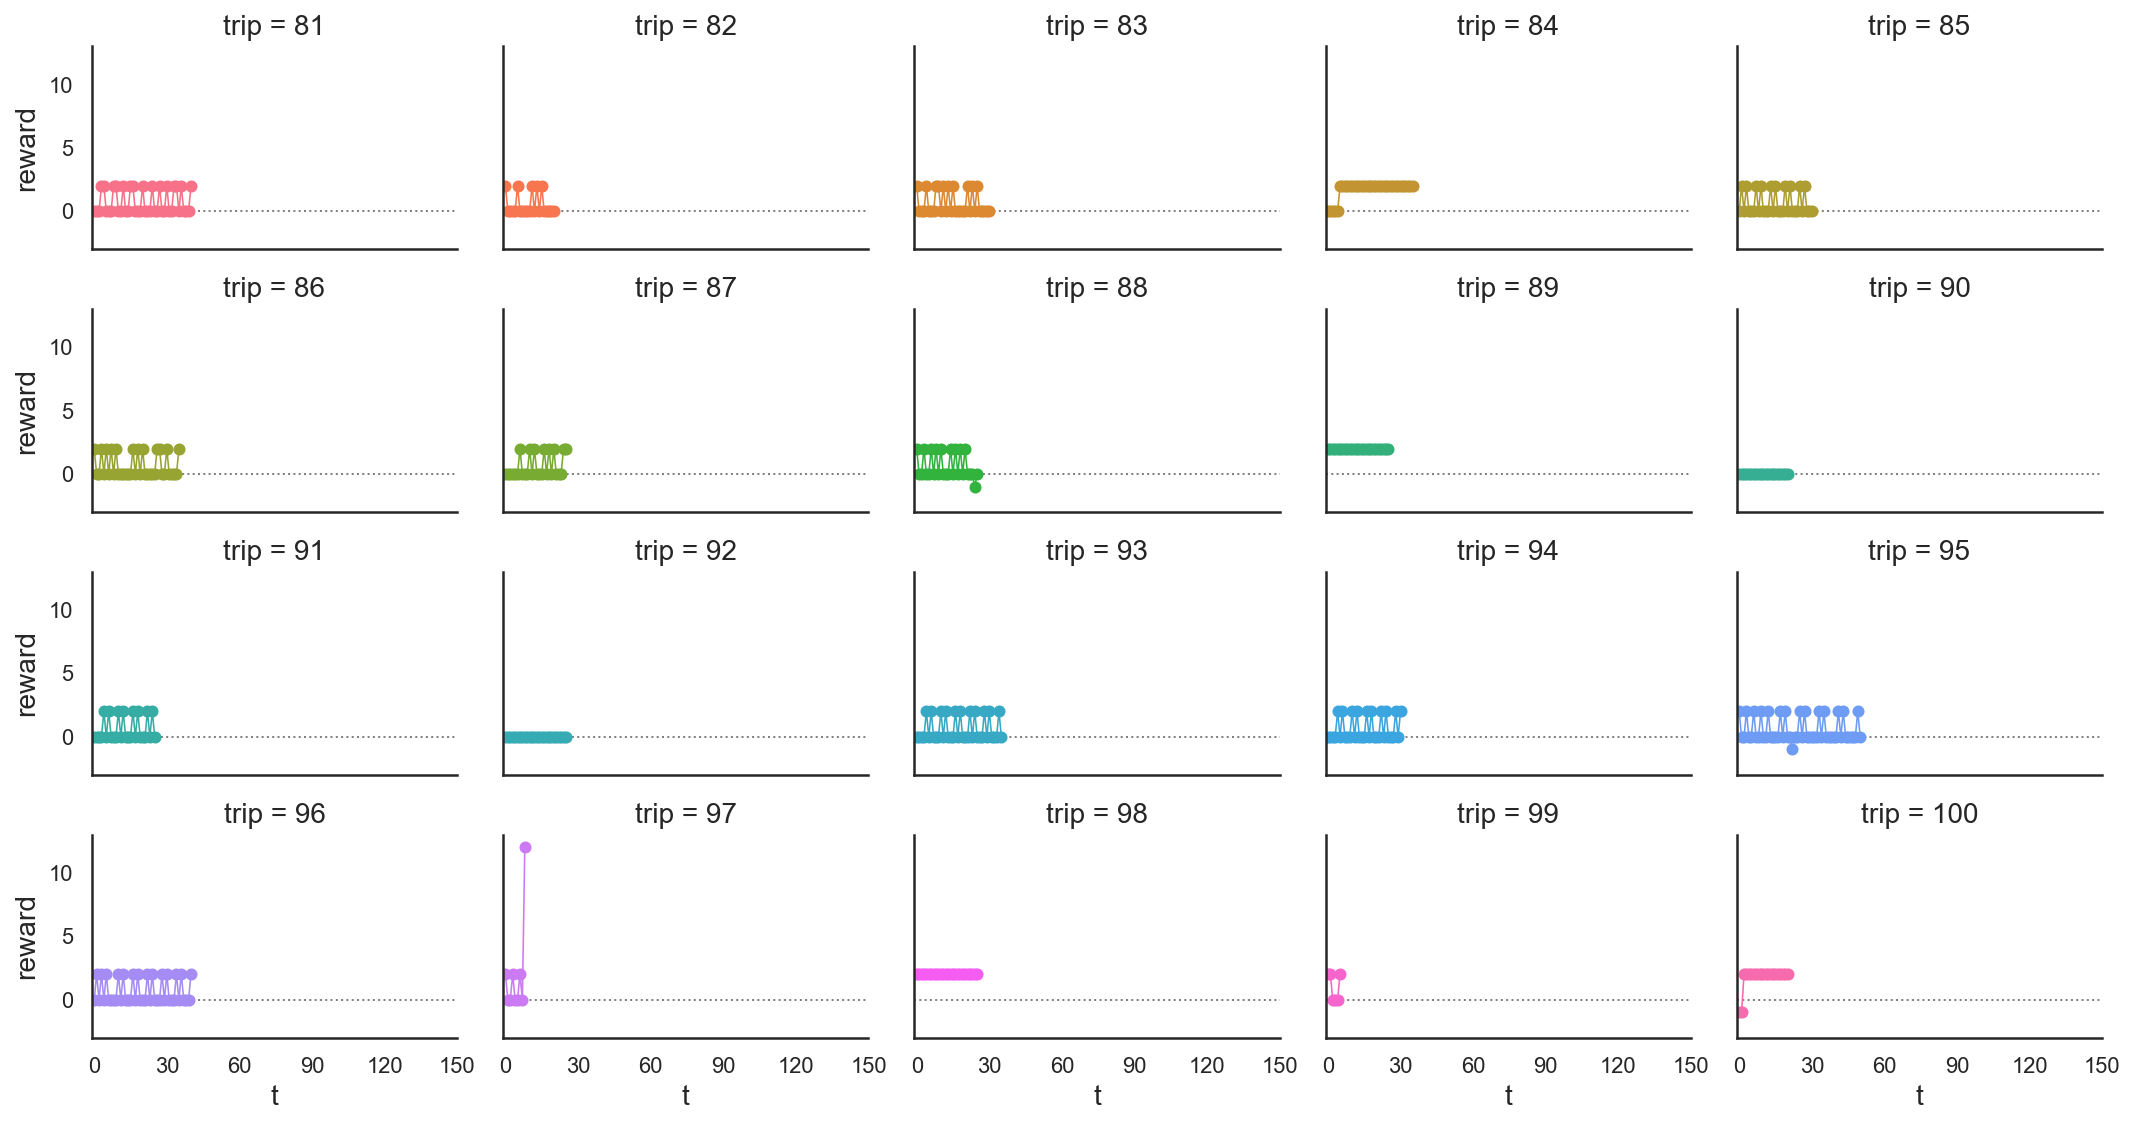

In [33]:
# plot the last 20 trials
plot_path(df4[df4['trip'].apply(lambda x: x >= 81)],
          path="/Users/tyc_219/Downloads/smartcab-master/results/optmized_agent1.png")

The destination was reached in 26 out of 100 trials.


count   mean        std  min   25%   50%   75%   max
total_reward       100.0  26.76  18.468165  0.0  16.0  20.0  36.5  96.0
total_nega_reward  100.0   0.20   0.531816  0.0   0.0   0.0   0.0   3.0
trial_length       100.0  22.33  11.841593  0.0  12.0  25.0  30.0  50.0

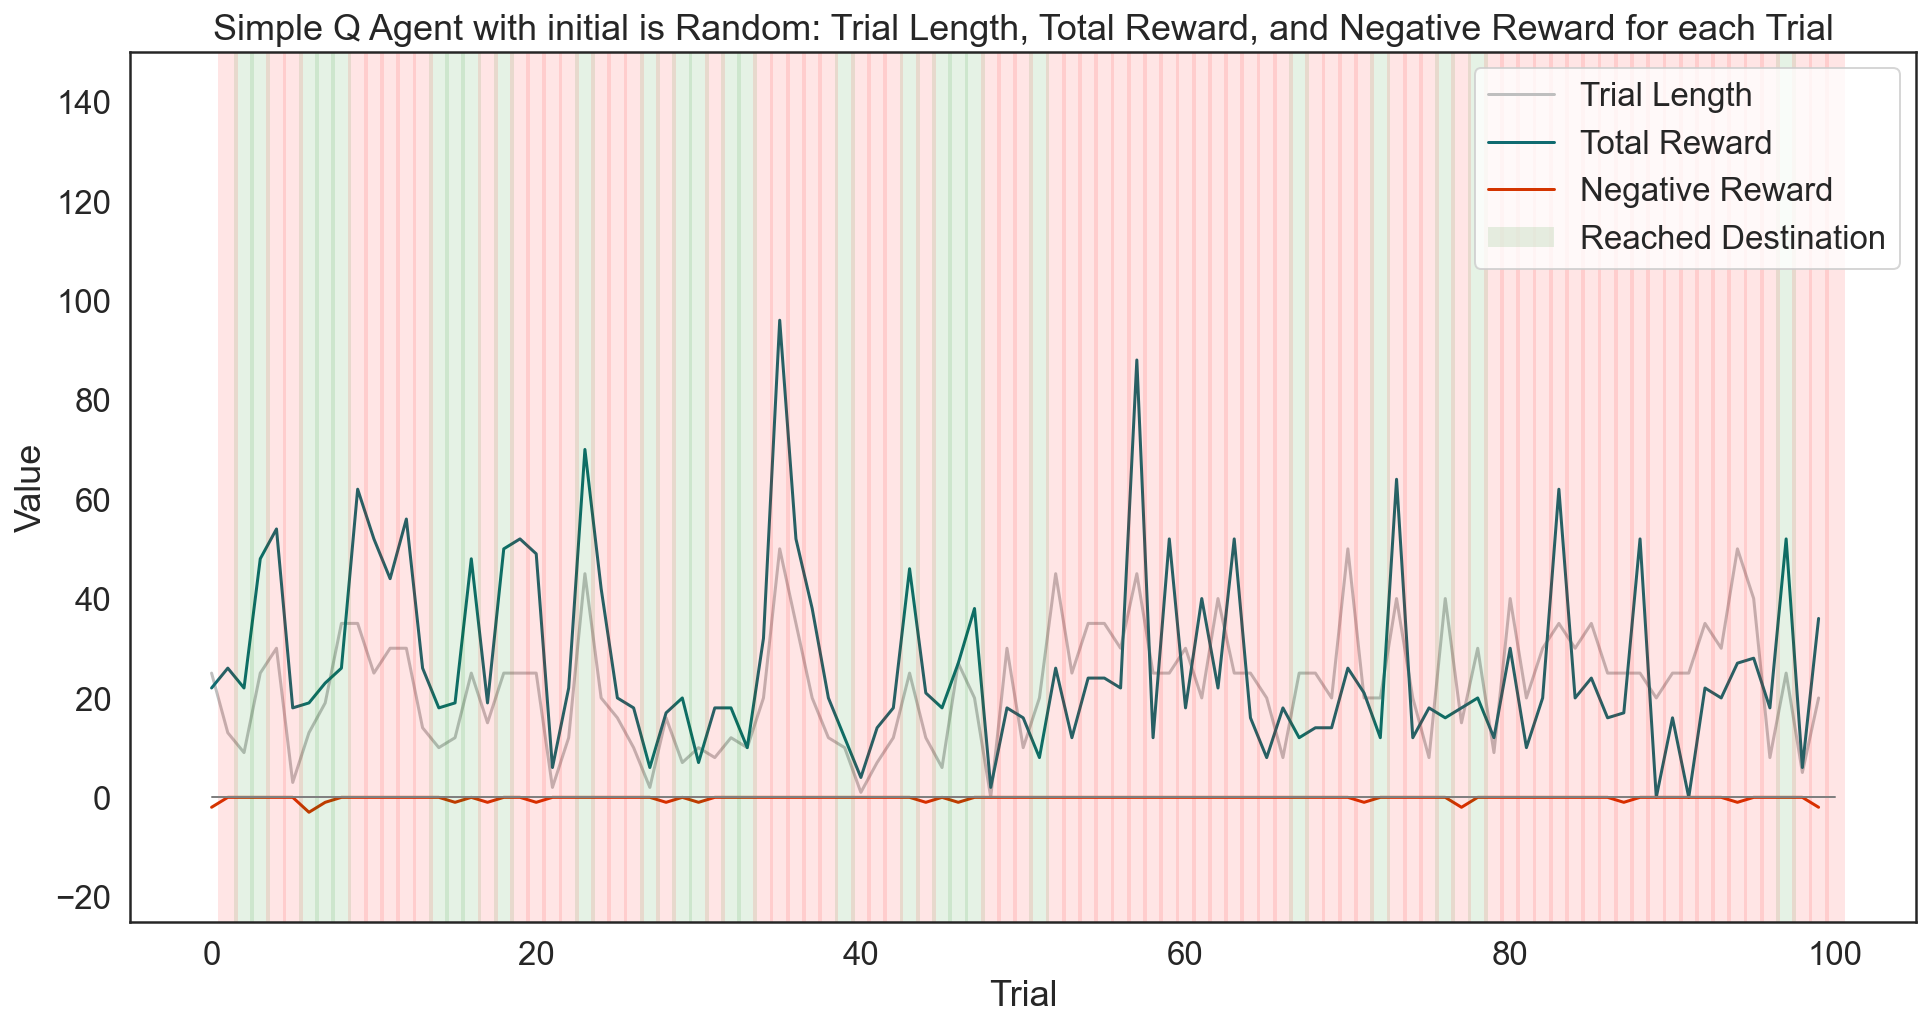

In [34]:
display_trial_stats(sns_data(df4), 'Simple Q Agent with initial is Random', -25, 150)

Based on the above analysis, it can be inferred that the Q-Learning agent with random initial state performs poorly. The agent barely learns and even conducts worse results along the trials.

Neither of the Q-Learning agents performs well, thus we consider further enhancing the Q-Learning agent.

## 4.5 Improving The Q-Learning Driving Agent

### 4.5.1 Optimising Q-Learning agent with default constant rates

To ensure the car is able to reach the destination within the allotted time safely and efficiently after sufficient training, we turned to consider adjusting the parameters in the Q-Learning algorithm. By arbitrary default, we first set the learning rate $\alpha$, the exploration rate $\epsilon$ and the discount factor $\gamma$ all equal to 0.2. The initial state here is random. Likewise, the sample is with 100 trials.

In [80]:
agent_opt1 = "/Users/tyc_219/Downloads/smartcab-master/results/opt_agent_sim_1000.json"
df5 = load_transform(agent_opt1)
review_results(df5)

Successful trips:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
success                                                                        
0               200749   185290   184516   183530   185478   184330   183665   
1                 4164     4598     4494     4438     4364     4391     4487   
All             204913   189888   189010   187968   189842   188721   188152   

trip_interval  71 - 80  81 - 90  91 - 100      All  
success                                             
0               185910   185458    186488  1865414  
1                 4396     4408      4324    44064  
All             190306   189866    190812  1909478


Rewards:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
reward                                                                         
-1                5780     1978     1917     1855     1754     1662     1459   
0                84562    71628    69610    69523    70023    69730    70406   
2               110407   111684   112989   112152   113701   112938   111800   
9                  111       62       51       45       47       53       54   
12                4053     4536     4443     4393     4317     4338     4433   
All             204913   189888   189010   187968   189842   188721   188152   

trip_interval  71 - 80  81 - 90  91 - 100      All  
reward                                              
-1                1480     1437      1335    20657  
0                69922    68014     69516   712934  
2               114508   116007    115637  1131823  
9                   47       51        45      566  
12                4349     4357      4279    43498  
All             190306   189866    190812  1909478


Bad moves:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
bad_moves                                                                      
0               199133   187910   187093   186113   188088   187059   186693   
1                 5780     1978     1917     1855     1754     1662     1459   
All             204913   189888   189010   187968   189842   188721   188152   

trip_interval  71 - 80  81 - 90  91 - 100      All  
bad_moves                                           
0               188826   188429    189477  1888821  
1                 1480     1437      1335    20657  
All             190306   189866    190812  1909478

In [81]:
publish_results1(df5, 1000)

/var/folders/km/k9s9s4zd24x08bnyw38g8g3c0000gn/T/ipykernel_32761/1749605324.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(tabulate(df.groupby(['trip_interval'])['success','bad_moves'].sum()/n,


+----------+---------+-----------+
|  Trips   | Success | Bad moves |
+----------+---------+-----------+
| 01 - 10  |  4.164  |   5.78    |
| 11 - 20  |  4.598  |   1.978   |
| 21 - 30  |  4.494  |   1.917   |
| 31 - 40  |  4.438  |   1.855   |
| 41 - 50  |  4.364  |   1.754   |
| 51 - 60  |  4.391  |   1.662   |
| 61 - 70  |  4.487  |   1.459   |
| 71 - 80  |  4.396  |   1.48    |
| 81 - 90  |  4.408  |   1.437   |
| 91 - 100 |  4.324  |   1.335   |
+----------+---------+-----------+


After adjusting for the rates, the mistakes decrease significantly after the first 10 trips and keep decreasing along the trials, being consistent with the Q-Learning agent with "None" initial state. However, the decreasing speed of "bad moves" is quite slow. Intuitively, the policy is not defined by the optimal parameter values.

### 4.5.2 Optimising Q-Learning agent with grid searching

In order to enhance our Q-Learning driving agent, we conducted a grid search to determine a more optimal learning rate $\alpha$, exploration rate $\epsilon$, and discount factor $\gamma$. The learning rate alpha was determined using the following parameters: $1/(t+1)$, $1/(t+2)$, $1-(1/np.log(t+3))$, $1-(1/np.sqrt(t+3))$, $0.2$, $0.8$; for the exploration rate epsilon, $1/(1+np.exp(-t))$, $1/t$, $-ln(sigmoid(t+2))$, $0.2$ and $0.8$. We limited the number of runs in this experiment to 100 due to computing constraints. Also, reducing the delay update and set the "displsy" to "False".

The learning rate alpha is the value of the reward from the current policy that is learned during each Q-table update, in the range of $[0,1]$. When alpha = 0, the Q-table is not updated at all and the original policy is always used. When alpha = 1, the Q-table chooses the current policy every time, discarding the original Q-table. The learning rate slowly decays with $1/ln(t+2)$.

The exploration rate epsilon is between $[0,1]$. When epslion = 0, the self-driving car chooses the optimal decision fully based on the Q-table, i.e. there is no random; when epslion = 1, the car is completely random, which is exactly the same as having the car choose the action randomly at the beginning. The exploration rate cross-entropies with $-ln(sigmoid(t+2))$.

The discount factor gamma refers to the impact of future policies on the present given the current policy, and is also in the range of $[0,1]$. 

In [88]:
df6 = load_transform("/Users/tyc_219/Downloads/smartcab-master/results/optimal_policy.json")
review_results(df6)

Successful trips:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
success                                                                        
0                60346    56171    55290    55600    55033    54949    55703   
1                 1255     1360     1341     1336     1297     1321     1295   
All              61601    57531    56631    56936    56330    56270    56998   

trip_interval  71 - 80  81 - 90  91 - 100     All  
success                                            
0                55858    54806     53871  557627  
1                 1277     1348      1383   13213  
All              57135    56154     55254  570840


Rewards:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
reward                                                                         
-1                1768      595      587      528      538      486      492   
0                25316    22408    21048    21738    21278    21139    21396   
2                33262    33168    33655    33334    33217    33324    33815   
9                   27       16       19       11       14        6       11   
12                1228     1344     1322     1325     1283     1315     1284   
All              61601    57531    56631    56936    56330    56270    56998   

trip_interval  71 - 80  81 - 90  91 - 100     All  
reward                                             
-1                 489      442       373    6298  
0                20938    20950     20319  216530  
2                34431    33414     33179  334799  
9                    9       11         7     131  
12                1268     1337      1376   13082  
All              57135    56154     55254  570840


Bad moves:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
bad_moves                                                                      
0                59833    56936    56044    56408    55792    55784    56506   
1                 1768      595      587      528      538      486      492   
All              61601    57531    56631    56936    56330    56270    56998   

trip_interval  71 - 80  81 - 90  91 - 100     All  
bad_moves                                          
0                56646    55712     54881  564542  
1                  489      442       373    6298  
All              57135    56154     55254  570840

In [126]:
df6.head(20)

action  reward  t  light oncoming location  success way_point  \
0        right       2  0    red     None   [6, 4]        0     right   
1997      None       0  0  green     None   [8, 5]        0   forward   
3932      left      -1  0    red     None   [2, 1]        0   forward   
6023   forward      -1  0    red     None   [6, 3]        0      left   
7762      left      -1  0    red     None   [4, 1]        0   forward   
9620   forward      -1  0    red     None   [6, 3]        0     right   
11323  forward       2  0  green     None   [4, 5]        0   forward   
13340     left       0  0  green     None   [8, 2]        0     right   
15087     None       0  0    red     None   [4, 6]        0      left   
16915     None       0  0  green     None   [5, 6]        0     right   
18701  forward       2  0  green     None   [5, 1]        0   forward   
20643    right       2  0  green     None   [3, 4]        0   forward   
22539    right       2  0  green     None   [4, 5]        0     right   
24413  forward       0  0  green     None   [8, 5]        0     right   
26518     left      -1  0    red     None   [5, 5]        0     right   
29244  forward      -1  0    red     None   [6, 1]        0     right   
31032     None       0  0    red     None   [3, 2]        0     right   
33037  forward       2  0  green     None   [2, 5]        0   forward   
35056    right       0  0  green     None   [3, 6]        0     right   
36801     None       0  0    red     None   [8, 6]        0      left   

      destination  moves_taken  trip                   alpha  gamma  \
0          [2, 1]            0     1               1/(t + 1)    0.1   
1997       [4, 6]            0     1               1/(t + 2)    0.1   
3932       [1, 5]            0     1   1 - (1/np.log(t + 3))    0.1   
6023       [1, 2]            0     1  1 - (1/np.sqrt(t + 3))    0.1   
7762       [6, 3]            0     1                     0.2    0.1   
9620       [3, 6]            0     1                     0.8    0.1   
11323      [1, 3]            0     1               1/(t + 1)    0.1   
13340      [5, 5]            0     1               1/(t + 2)    0.1   
15087      [8, 1]            0     1   1 - (1/np.log(t + 3))    0.1   
16915      [3, 4]            0     1  1 - (1/np.sqrt(t + 3))    0.1   
18701      [1, 6]            0     1                     0.2    0.1   
20643      [7, 2]            0     1                     0.8    0.1   
22539      [7, 3]            0     1               1/(t + 1)    0.1   
24413      [2, 6]            0     1               1/(t + 2)    0.1   
26518      [7, 1]            0     1   1 - (1/np.log(t + 3))    0.1   
29244      [3, 6]            0     1  1 - (1/np.sqrt(t + 3))    0.1   
31032      [8, 3]            0     1                     0.2    0.1   
33037      [3, 2]            0     1                     0.8    0.1   
35056      [1, 2]            0     1               1/(t + 1)    0.1   
36801      [7, 1]            0     1               1/(t + 2)    0.1   

                   epsilon initial_value  sim_num trip_interval  bad_moves  
0       1/(1 + np.exp(-t))          zero        1       01 - 10          0  
1997    1/(1 + np.exp(-t))          zero        1       01 - 10          0  
3932    1/(1 + np.exp(-t))          zero        1       01 - 10          1  
6023    1/(1 + np.exp(-t))          zero        1       01 - 10          1  
7762    1/(1 + np.exp(-t))          zero        1       01 - 10          1  
9620    1/(1 + np.exp(-t))          zero        1       01 - 10          1  
11323                  1/t          zero        1       01 - 10          0  
13340                  1/t          zero        1       01 - 10          0  
15087                  1/t          zero        1       01 - 10          0  
16915                  1/t          zero        1       01 - 10          0  
18701                  1/t          zero        1       01 - 10          0  
20643                  1/t          zero        1       01

**Searching for optimal alpha and epsilon**

We first tried to confirm the optimal group of alpha and epsilon and visualise the process with heatmaps and 3D interactive graphs.

In [35]:
alpha_map = {'decay1': '1/(t + 1)',
             'decay2': '1/(t + 2)',
             'decay3': '1 - (1/np.log(t + 3))',
             'decay4': '1 - (1/np.sqrt(t + 3))',
             '0.2': '0.2',
             '0.8': '0.8'}

epsilon_map = {'Sigmoid': '1/(1 + np.exp(-t))',
               'Arithmetic Average': '1/t',
               'Cross Entropy': '-ln(sigmoid(t + 2))',
               '0.2': '0.2',
               '0.8': '0.8'}

In [95]:
df6['alpha'] = df6['alpha'].map(alpha_map)
df6['epsilon'] = df6['epsilon'].map(epsilon_map)

In [100]:
def plot_grids(data, col):
    for i, e in enumerate(data['epsilon'].unique()):
        print("Epsilon policy is: ", e)
        d = pd.DataFrame()
        d = data[data['epsilon'] == e]
        sns.heatmap(d.groupby(["alpha", "trip_interval"]).agg(np.sum)[col].unstack().T/10, annot=True)
        plt.xlabel("\nLearning rate")
        plt.ylabel("Trip interval")
        plt.title("Average success\n")
        plt.savefig("/Users/tyc_219/Downloads/smartcab-master/results/dif_policy{}".format(i))
        plt.show()
        print()

Epsilon policy is:  1/(1 + np.exp(-t))


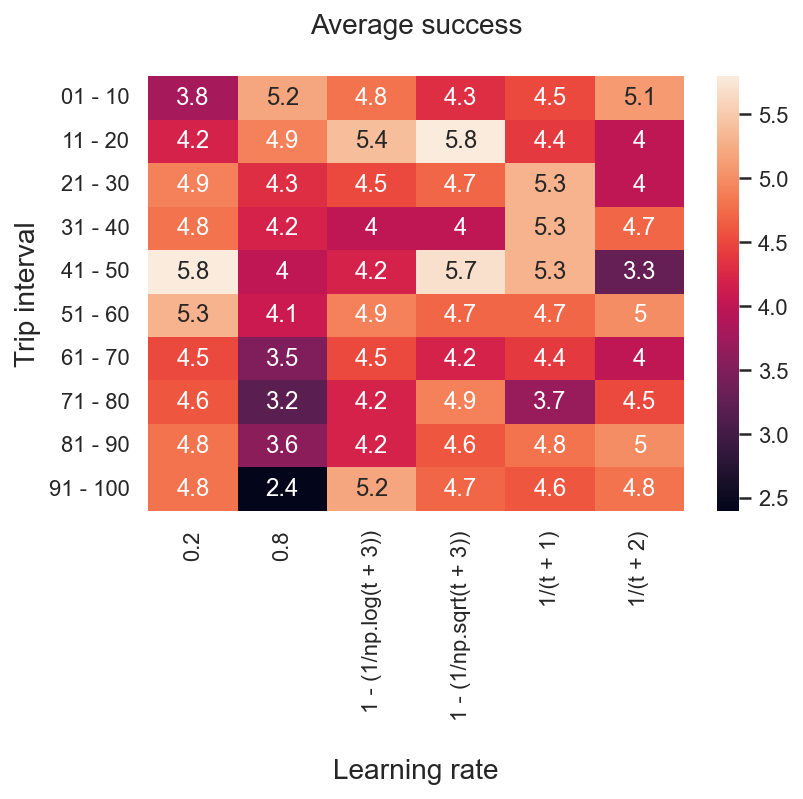


Epsilon policy is:  1/t


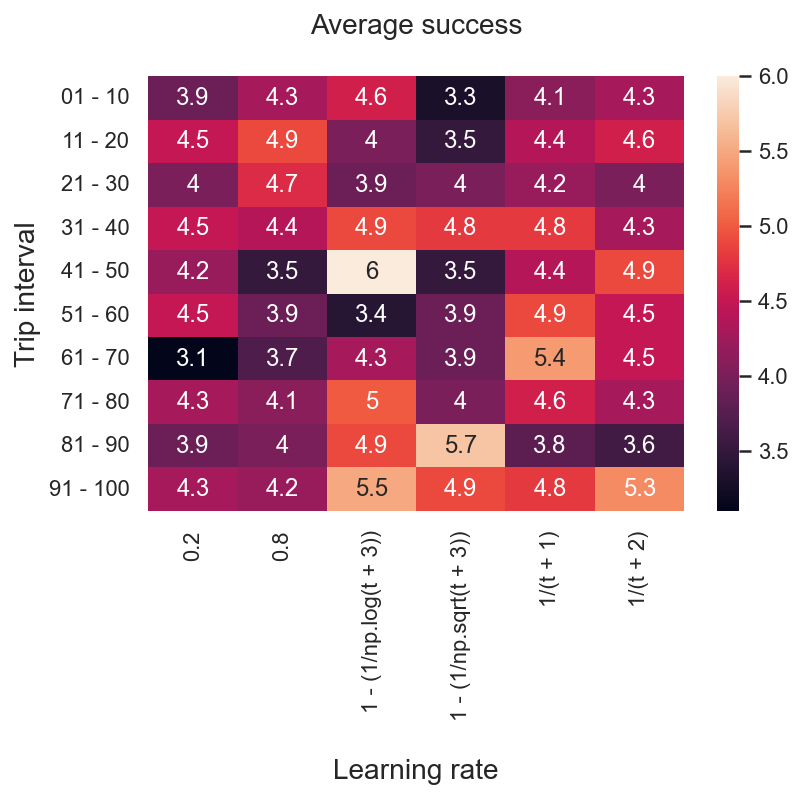


Epsilon policy is:  -ln(sigmoid(t + 2))


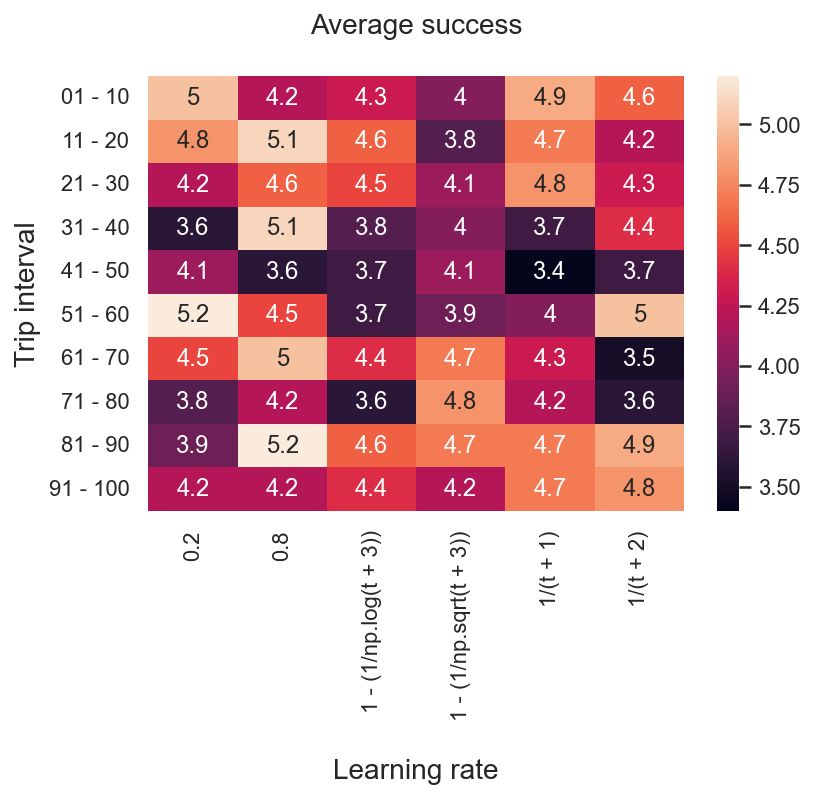


Epsilon policy is:  0.2


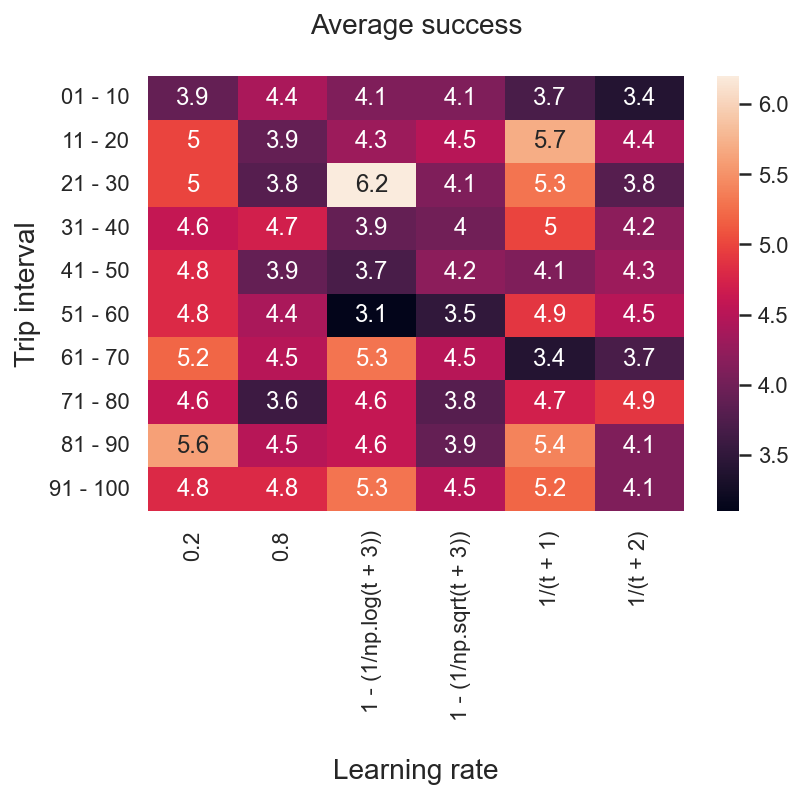


Epsilon policy is:  0.8


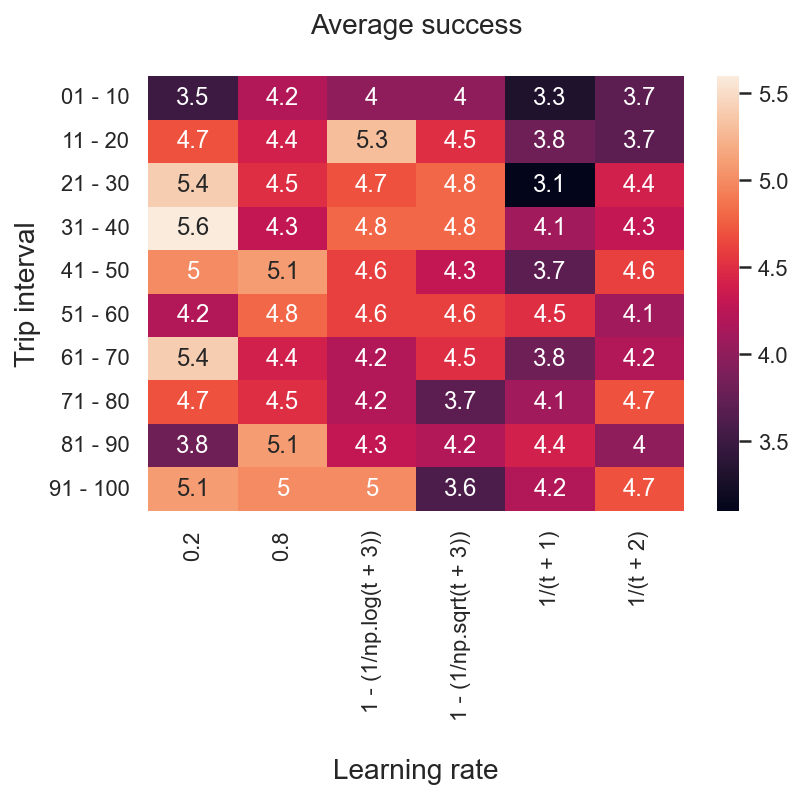

In [106]:
plot_grids(df6, 'success')

In [105]:
def plot_grids1(data, col):
    for i, e in enumerate(data['epsilon'].unique()):
        print("Epsilon policy is: ", e)
        d = pd.DataFrame()
        d = data[data['epsilon'] == e]
        sns.heatmap(d.groupby(["alpha", "trip_interval"]).agg(np.sum)[col].unstack().T/10, annot=True)
        plt.xlabel("\nLearning rate")
        plt.ylabel("Trip interval")
        plt.title("Average mistakes\n")
        plt.savefig("/Users/tyc_219/Downloads/smartcab-master/results/dif_mistakes{}".format(i))
        plt.show()
        print()

Epsilon policy is:  1/(1 + np.exp(-t))


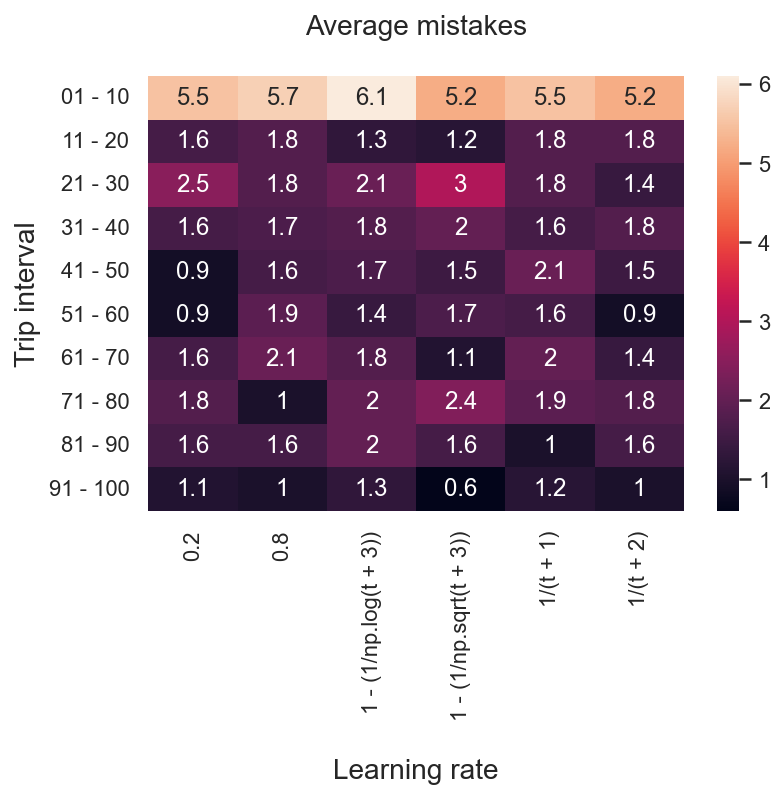


Epsilon policy is:  1/t


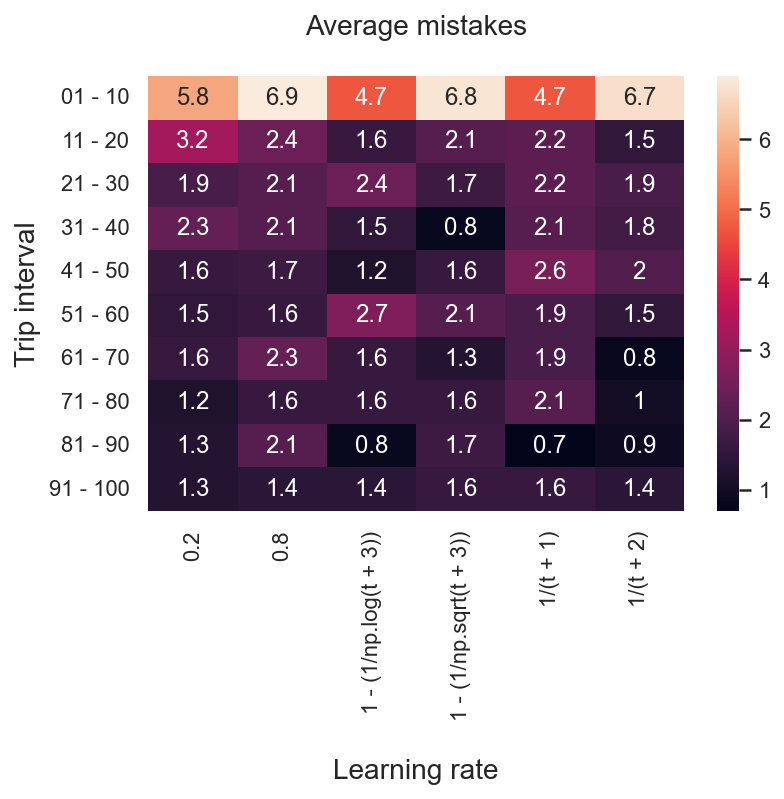


Epsilon policy is:  -ln(sigmoid(t + 2))


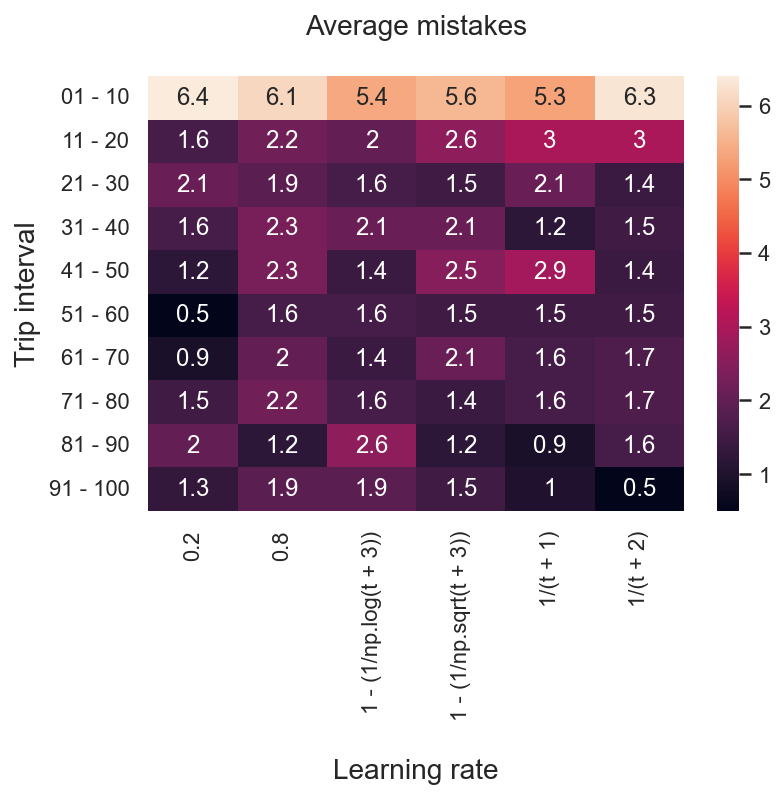


Epsilon policy is:  0.2


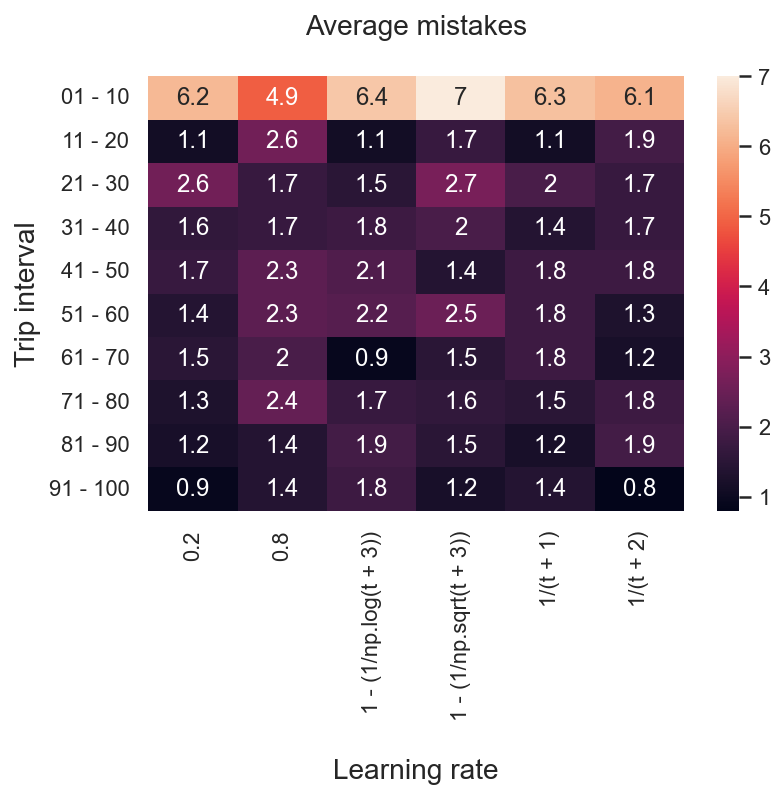


Epsilon policy is:  0.8


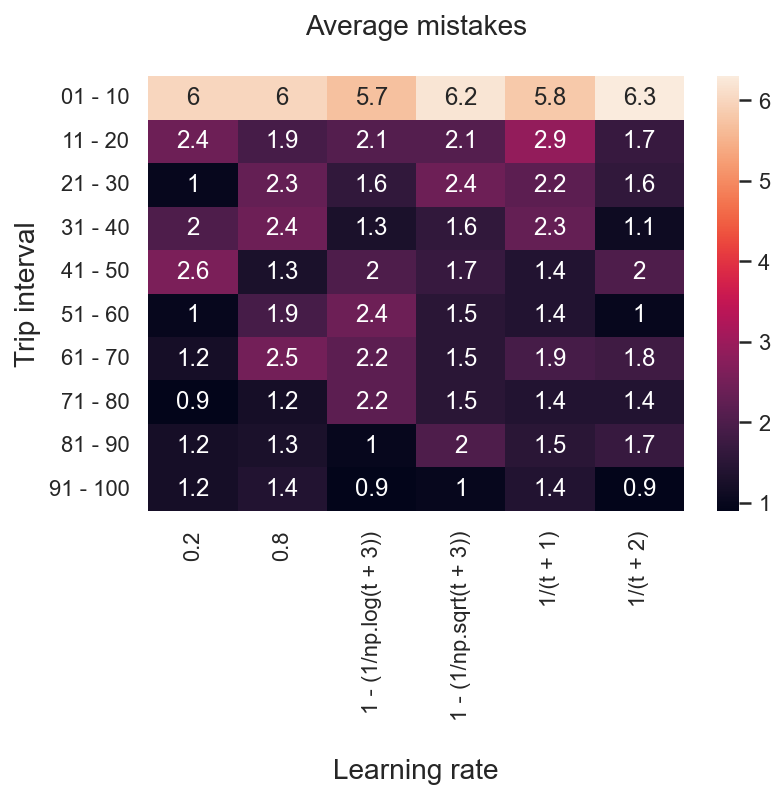

In [107]:
plot_grids1(df6, 'bad_moves')

In [108]:
import pyecharts.options as opts
from pyecharts.charts import Bar3D

alpha = ['0.2','0.8','decay1','decay2','decay3','decay4']
epsilon = ['0.2','0.8','Sigmoid','Arithmetic Average','Cross Entropy']

In [114]:
results1 = df6.groupby(["alpha","epsilon"]).agg(np.sum)['success'].unstack().T/100
print(results1)

alpha                 0.2   0.8  1 - (1/np.log(t + 3))  \
epsilon                                                  
-ln(sigmoid(t + 2))  4.33  4.57                   4.16   
0.2                  4.83  4.25                   4.51   
0.8                  4.74  4.63                   4.57   
1/(1 + np.exp(-t))   4.75  3.94                   4.59   
1/t                  4.12  4.17                   4.65   

alpha                1 - (1/np.sqrt(t + 3))  1/(t + 1)  1/(t + 2)  
epsilon                                                            
-ln(sigmoid(t + 2))                    4.23       4.34       4.30  
0.2                                    4.11       4.74       4.14  
0.8                                    4.30       3.90       4.24  
1/(1 + np.exp(-t))                     4.76       4.70       4.44  
1/t                                    4.15       4.54       4.43  


In [120]:
data1 = [
    [0,0,4.83],
    [0,1,4.74],
    [0,2,4.75],
    [0,3,4.12],
    [0,4,4.33],
    [1,0,4.25],
    [1,1,4.63],
    [1,2,3.94],
    [1,3,4.17],
    [1,4,4.57],
    [2,0,4.74],
    [2,1,3.90],
    [2,2,4.70],
    [2,3,4.54],
    [2,4,4.34],
    [3,0,4.14],
    [3,1,4.24],
    [3,2,4.44],
    [3,3,4.43],
    [3,4,4.30],
    [4,0,4.51],
    [4,1,4.57],
    [4,2,4.59],
    [4,3,4.65],
    [4,4,4.16],
    [5,0,4.11],
    [5,1,4.30],
    [5,2,4.76],
    [5,3,4.15],
    [5,4,4.23]
]

data1 = [[d[0], d[1], d[2]] for d in data1]


(
    Bar3D(init_opts=opts.InitOpts(width="1600px", height="800px"))
    .add(
        series_name="10 trails average success times in different groups of alpha and epsilon",
        data=data1,
        xaxis3d_opts=opts.Axis3DOpts(type_="category", data=alpha),
        yaxis3d_opts=opts.Axis3DOpts(type_="category", data=epsilon),
        zaxis3d_opts=opts.Axis3DOpts(type_="value"),
    )
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(
            min_=3.5,
            max_=5,
            range_color=[
                "#313695",
                "#4575b4",
                "#74add1",
                "#abd9e9",
                "#e0f3f8",
                "#ffffbf",
                "#fee090",
                "#fdae61",
                "#f46d43",
                "#d73027",
                "#a50026",
            ],
        )
    )
    .render("bar3d_punch_card0.html")
)

'/Users/tyc_219/Downloads/smartcab-master/smartcab/bar3d_punch_card0.html'

In [123]:
results2 = df6[df6["trip_interval"]=="91 - 100"].groupby(["alpha","epsilon"]).agg(np.sum)['bad_moves'].unstack().T/10
results2

alpha                0.2  0.8  1 - (1/np.log(t + 3))  1 - (1/np.sqrt(t + 3))  \
epsilon                                                                        
-ln(sigmoid(t + 2))  1.3  1.9                    1.9                     1.5   
0.2                  0.9  1.4                    1.8                     1.2   
0.8                  1.2  1.4                    0.9                     1.0   
1/(1 + np.exp(-t))   1.1  1.0                    1.3                     0.6   
1/t                  1.3  1.4                    1.4                     1.6   

alpha                1/(t + 1)  1/(t + 2)  
epsilon                                    
-ln(sigmoid(t + 2))        1.0        0.5  
0.2                        1.4        0.8  
0.8                        1.4        0.9  
1/(1 + np.exp(-t))         1.2        1.0  
1/t                        1.6        1.4  


In [125]:
data2 = [
    [0,0,0.9],
    [0,1,1.2],
    [0,2,1.1],
    [0,3,1.3],
    [0,4,1.3],
    [1,0,1.4],
    [1,1,1.4],
    [1,2,1.0],
    [1,3,1.4],
    [1,4,1.9],
    [2,0,1.4],
    [2,1,1.4],
    [2,2,1.2],
    [2,3,1.6],
    [2,4,1.0],
    [3,0,0.8],
    [3,1,0.9],
    [3,2,1.0],
    [3,3,1.4],
    [3,4,0.5],
    [4,0,1.8],
    [4,1,0.9],
    [4,2,1.3],
    [4,3,1.4],
    [4,4,1.9],
    [5,0,1.2],
    [5,1,1.0],
    [5,2,0.6],
    [5,3,1.6],
    [5,4,1.5]
]

data2 = [[d[0], d[1], d[2]] for d in data2]


(
    Bar3D(init_opts=opts.InitOpts(width="1600px", height="800px"))
    .add(
        series_name="10 trails average bad moves in different groups of alpha and epsilon",
        data=data2,
        xaxis3d_opts=opts.Axis3DOpts(type_="category", data=alpha),
        yaxis3d_opts=opts.Axis3DOpts(type_="category", data=epsilon),
        zaxis3d_opts=opts.Axis3DOpts(type_="value"),
    )
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(
            min_=0,
            max_=2,
            range_color=[
                "#313695",
                "#4575b4",
                "#74add1",
                "#abd9e9",
                "#e0f3f8",
                "#ffffbf",
                "#fee090",
                "#fdae61",
                "#f46d43",
                "#d73027",
                "#a50026",
            ],
        )
    )
    .render("bar3d_punch_card1.html")
)

'/Users/tyc_219/Downloads/smartcab-master/smartcab/bar3d_punch_card1.html'

Our goal is to pick parameters with a balance high success and low mistakes. From the above analysis, we discovered that a learning rate of $1/(t+1)$ and an exploring rate of $-ln(sigmoid(t+2))$ provide the optimal balance between successful trips and mistakes.

**Searching for optimal gamma**

Next, 100 simulations were used to estimate the optimal discount factor $\gamma$ from 0.1 to 1.0 (ten even intervals) using a grid search. 

In [47]:
def plot_opt(data, col, max_val, num_sim=1):
    sns.heatmap(data.groupby(['trip_interval', 'gamma'])[col].sum().unstack()/num_sim,
                    vmax=max_val,
                    annot=True,
                    annot_kws={"fontsize":10},
                    linewidths=1.0)
    plt.ylabel("Trip Interval")
    plt.xlabel("Gamma")
    plt.show()

In [37]:
agent_opt = load_transform("/Users/tyc_219/Downloads/smartcab-master/results/parameter_search_for_gamma.json")

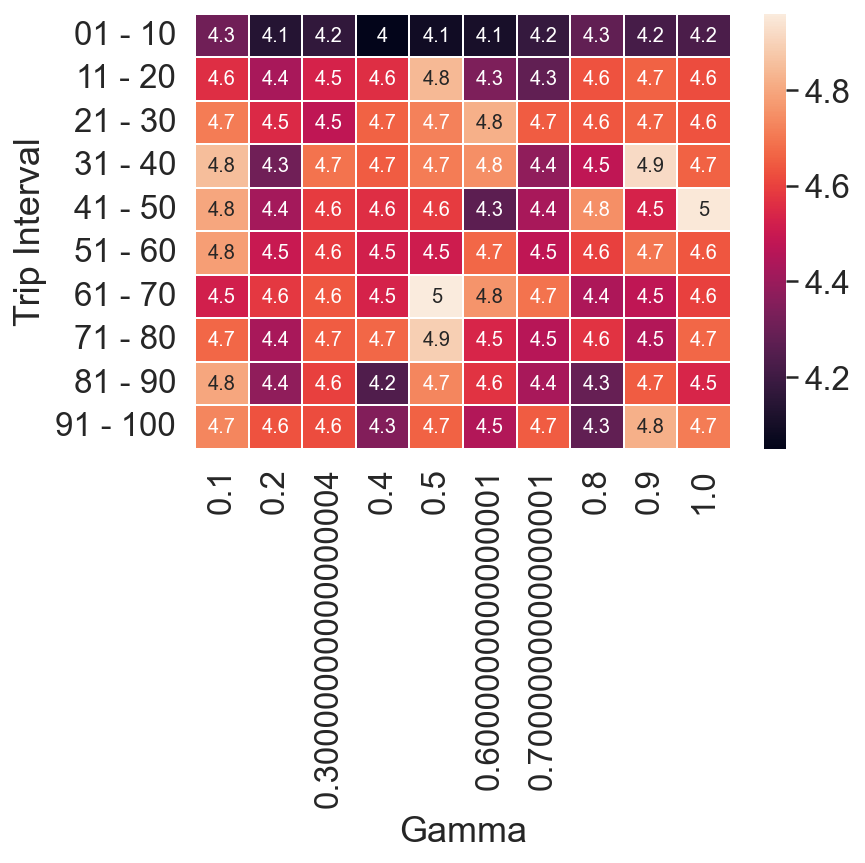

<Figure size 432x288 with 0 Axes>

In [52]:
plot_opt(agent_opt, 'success', None, 100)
plt.savefig('/Users/tyc_219/Downloads/smartcab-master/results/success.png')

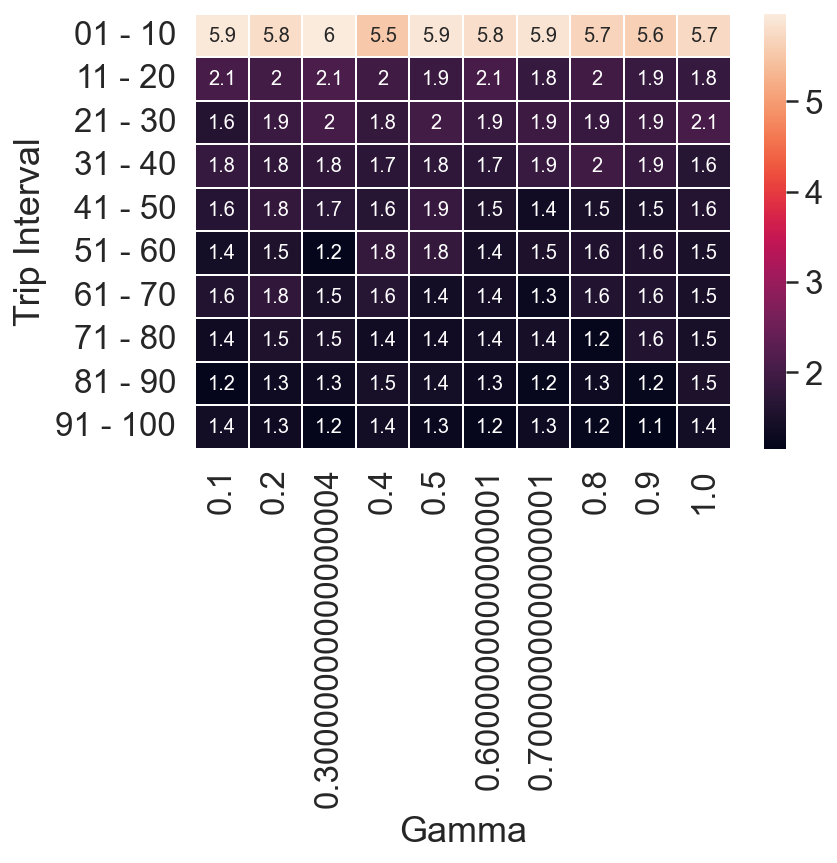

<Figure size 432x288 with 0 Axes>

In [53]:
plot_opt(agent_opt, 'bad_moves', None, 100)
plt.savefig('/Users/tyc_219/Downloads/smartcab-master/results/bad_moves.png')

In [54]:
agent_opt.groupby(['trip_interval', 'gamma'])['success'].sum().unstack()/100

gamma           0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.0
trip_interval                                                            
01 - 10        4.31  4.14  4.17  4.05  4.09  4.11  4.18  4.28  4.22  4.23
11 - 20        4.56  4.43  4.53  4.56  4.84  4.34  4.28  4.63  4.66  4.62
21 - 30        4.71  4.55  4.48  4.66  4.72  4.82  4.65  4.64  4.66  4.63
31 - 40        4.85  4.31  4.69  4.65  4.71  4.75  4.38  4.48  4.92  4.66
41 - 50        4.80  4.42  4.59  4.56  4.59  4.27  4.43  4.75  4.53  4.95
51 - 60        4.78  4.50  4.59  4.52  4.51  4.67  4.48  4.60  4.70  4.64
61 - 70        4.52  4.58  4.64  4.53  4.96  4.76  4.69  4.44  4.48  4.60
71 - 80        4.67  4.43  4.65  4.67  4.89  4.54  4.46  4.57  4.45  4.67
81 - 90        4.80  4.38  4.60  4.24  4.73  4.57  4.43  4.29  4.65  4.54
91 - 100       4.73  4.63  4.62  4.35  4.66  4.45  4.65  4.28  4.82  4.71

In [55]:
def publish_results1(df, n):
    print(tabulate(df.groupby(['trip_interval'])['success','bad_moves'].sum()/n,
         headers=['Trips', 'Success', 'Bad moves'],
         tablefmt='pretty'))

publish_results1(agent_opt, 1000)

+----------+---------+-----------+
|  Trips   | Success | Bad moves |
+----------+---------+-----------+
| 01 - 10  |  4.178  |   5.785   |
| 11 - 20  |  4.545  |   1.963   |
| 21 - 30  |  4.652  |    1.9    |
| 31 - 40  |  4.64   |   1.79    |
| 41 - 50  |  4.589  |   1.611   |
| 51 - 60  |  4.599  |   1.535   |
| 61 - 70  |  4.62   |   1.527   |
| 71 - 80  |   4.6   |   1.421   |
| 81 - 90  |  4.523  |   1.333   |
| 91 - 100 |  4.59   |   1.288   |
+----------+---------+-----------+


/var/folders/km/k9s9s4zd24x08bnyw38g8g3c0000gn/T/ipykernel_63644/655050601.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(tabulate(df.groupby(['trip_interval'])['success','bad_moves'].sum()/n,


We performed a grid search by running 100 simulations, each having the driving agent attempt 100 trips. Based on our results, we found that the optimal discount factor is 0.5, given the parameters we had previously assigned. In summary, we chose $\alpha = 1/(t+1)$, $\epsilon = -ln(sigmoid(t+2))$, $\gamma = 0.5$ as the optimal parameters. We then implemented the proposed agents with these selected values.

### a. the default agent

In [5]:
df7 = load_transform("/Users/tyc_219/Downloads/smartcab-master/results/best_q_agent.json")
review_results(df7)

Successful trips:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
success                                                                        
0                  137      170      174       98      176      176      206   
1                    8        7        4        5        7        7        6   
All                145      177      178      103      183      183      212   

trip_interval  71 - 80  81 - 90  91 - 100   All  
success                                          
0                  161      144       205  1647  
1                    5        7         6    62  
All                166      151       211  1709


Rewards:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
reward                                                                         
-1                   2        1        2        1        3        1        2   
0                   83       93       69       62       94       61      101   
2                   52       76      103       35       79      114      103   
12                   8        7        4        5        7        7        6   
All                145      177      178      103      183      183      212   

trip_interval  71 - 80  81 - 90  91 - 100   All  
reward                                           
-1                   0        0         0    12  
0                   73       57        61   754  
2                   88       87       144   881  
12                   5        7         6    62  
All                166      151       211  1709


Bad moves:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
bad_moves                                                                      
0                  143      176      176      102      180      182      210   
1                    2        1        2        1        3        1        2   
All                145      177      178      103      183      183      212   

trip_interval  71 - 80  81 - 90  91 - 100   All  
bad_moves                                        
0                  166      151       211  1697  
1                    0        0         0    12  
All                166      151       211  1709

The destination was reached in 62 out of 100 trials.


count   mean        std  min   25%   50%   75%    max
total_reward       100.0  24.94  17.729631  2.0  16.0  20.0  24.5  106.0
total_nega_reward  100.0   0.12   0.383498  0.0   0.0   0.0   0.0    2.0
trial_length       100.0  16.09  10.841461  0.0   8.0  15.0  20.0   55.0

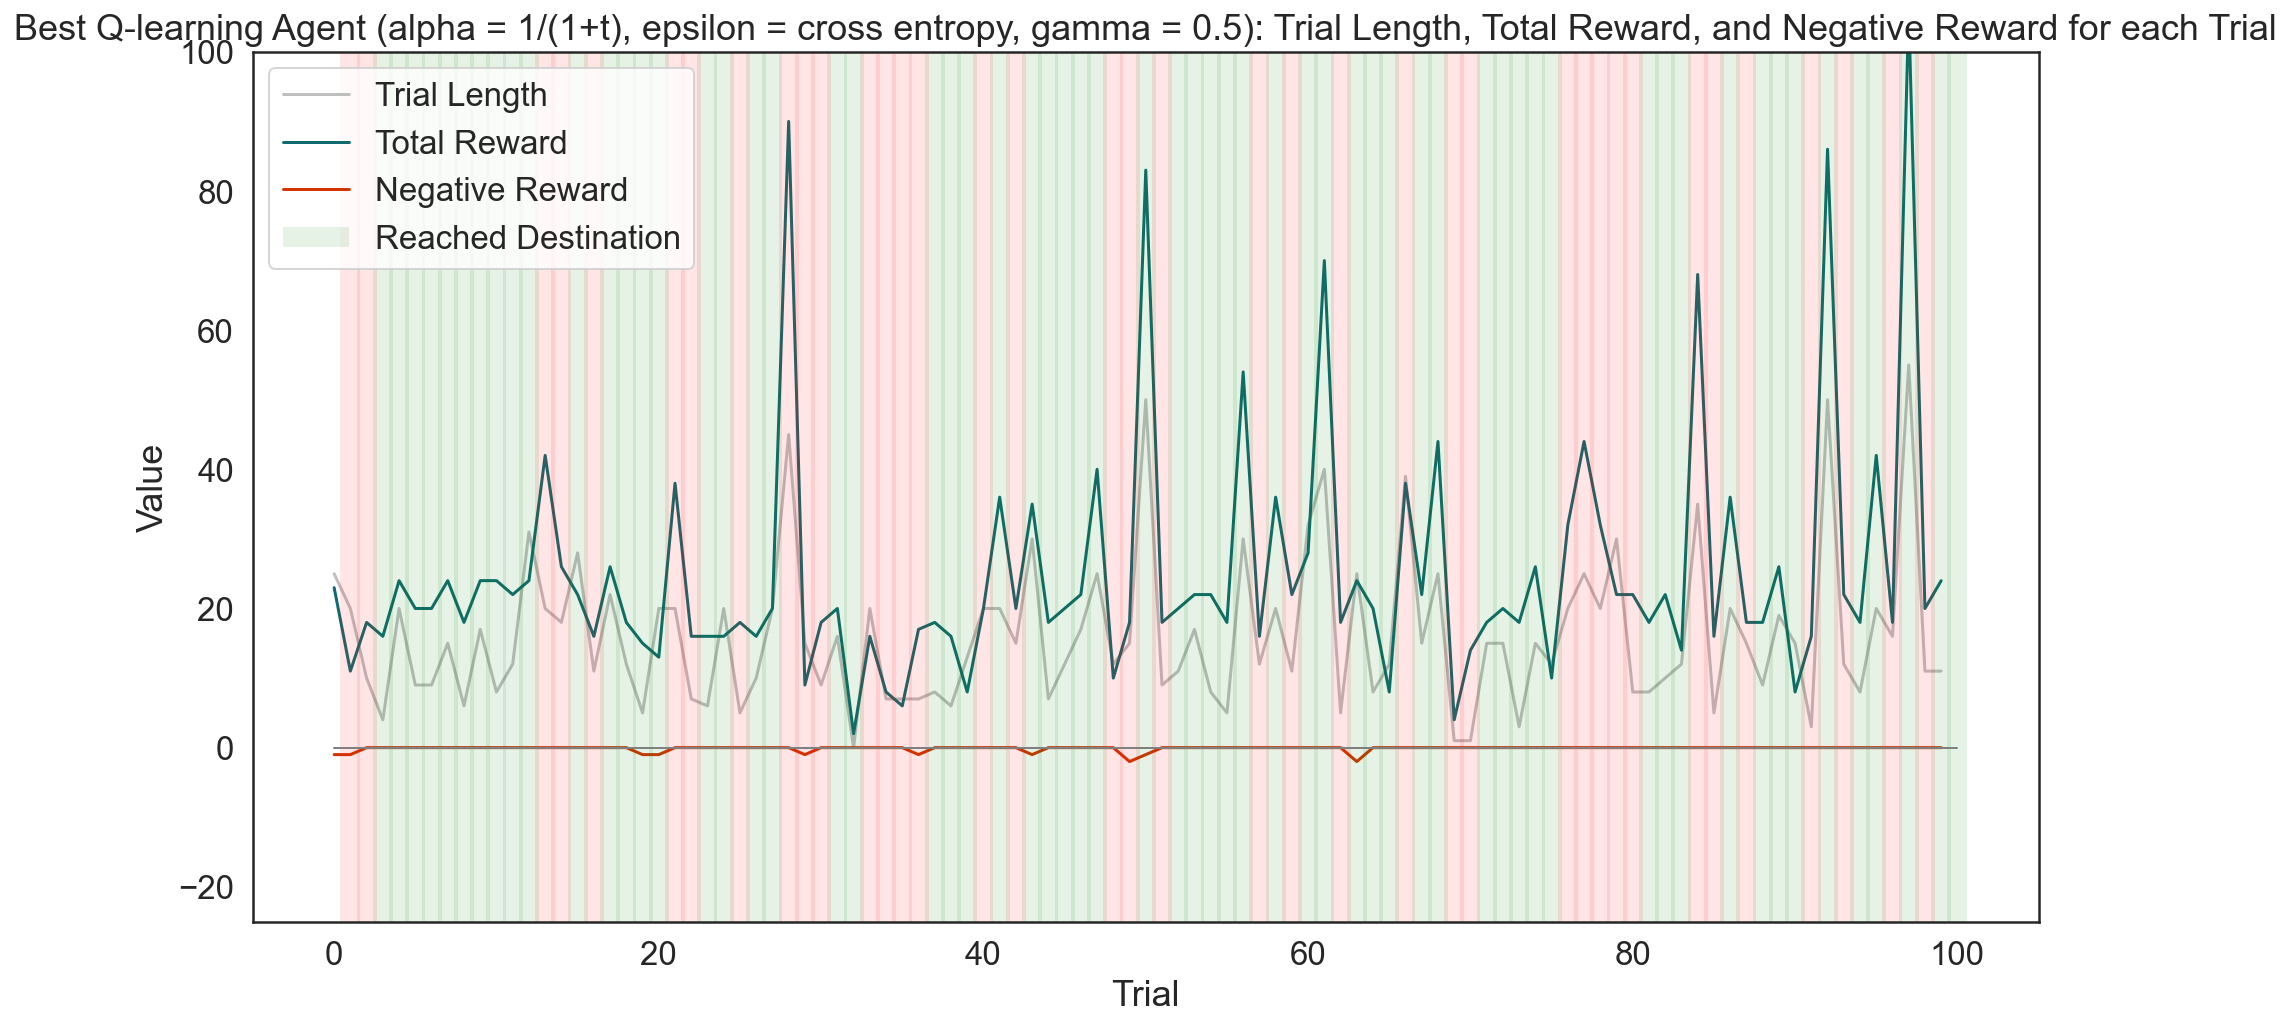

In [8]:
display_trial_stats(sns_data(df7), 'Best Q-learning Agent (alpha = 1/(1+t), epsilon = cross entropy, gamma = 0.5)',
                    -25, 100)

It can be seen that the trial length is much shorter, the total reward is greater and the negative reward is very low, compared with the original random agent, it arrives at its destination more frequently, which shows better safety and efficiency. However, the learning capability is slightly weak. Therefore, we consider to further adjust the Q-Learning agent.

### b. agent with 50 dummy agents

We adjusted the default 3 dummy agents into 50 agents to test the Q-Learning agent. Still, we began with searching for best parameters.

In [56]:
df8 = load_transform("/Users/tyc_219/Downloads/smartcab-master/results/optimal_policy1.json")
review_results(df8)

Successful trips:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
success                                                                        
0                63850    57074    55765    55313    51871    53552    52763   
1                 1229     1523     1483     1517     1580     1557     1578   
All              65079    58597    57248    56830    53451    55109    54341   

trip_interval  71 - 80  81 - 90  91 - 100     All  
success                                            
0                52488    51681     51901  546258  
1                 1567     1578      1571   15183  
All              54055    53259     53472  561441


Rewards:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
reward                                                                         
-1                5954     2494     1857     1437     1194     1011      909   
0                31514    25694    23602    23891    21826    22624    22064   
2                26382    28886    30306    29985    28851    29917    29790   
9                   61       23       24       10       13       23       15   
12                1168     1500     1459     1507     1567     1534     1563   
All              65079    58597    57248    56830    53451    55109    54341   

trip_interval  71 - 80  81 - 90  91 - 100     All  
reward                                             
-1                 814      777       661   17108  
0                21611    21671     21441  235938  
2                30063    29233     29799  293212  
9                   15       16        16     216  
12                1552     1562      1555   14967  
All              54055    53259     53472  561441


Bad moves:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
bad_moves                                                                      
0                59125    56103    55391    55393    52257    54098    53432   
1                 5954     2494     1857     1437     1194     1011      909   
All              65079    58597    57248    56830    53451    55109    54341   

trip_interval  71 - 80  81 - 90  91 - 100     All  
bad_moves                                          
0                53241    52482     52811  544333  
1                  814      777       661   17108  
All              54055    53259     53472  561441

In [57]:
df8.head(10)

action  reward  t  light oncoming location  success way_point  \
0         None       0  0    red     left   [1, 1]        0      left   
1788   forward      -1  0    red    right   [1, 3]        0      left   
3786   forward      -1  0    red     None   [6, 1]        0     right   
5559      left       9  0  green     None   [1, 2]        1      None   
7338     right       0  0  green     None   [8, 5]        0   forward   
9143     right       0  0  green    right   [8, 6]        0     right   
11073    right       2  0  green     left   [6, 3]        0     right   
12840    right       2  0    red     None   [1, 3]        0     right   
14634     None       0  0  green     None   [6, 6]        0   forward   
16419     None       0  0    red     None   [6, 5]        0     right   

      destination  moves_taken  trip   alpha  gamma             epsilon  \
0          [8, 4]            0     1  decay1    0.1             Sigmoid   
1788       [8, 2]            0     1  decay2    0.1             Sigmoid   
3786       [3, 2]            0     1  decay3    0.1             Sigmoid   
5559       [1, 2]            0     1  decay4    0.1             Sigmoid   
7338       [6, 6]            0     1     0.2    0.1             Sigmoid   
9143       [5, 2]            0     1     0.8    0.1             Sigmoid   
11073      [7, 1]            0     1  decay1    0.1  Arithmetic Average   
12840      [4, 3]            0     1  decay2    0.1  Arithmetic Average   
14634      [2, 6]            0     1  decay3    0.1  Arithmetic Average   
16419      [3, 1]            0     1  decay4    0.1  Arithmetic Average   

      initial_value  sim_num trip_interval  bad_moves  
0              zero        1       01 - 10          0  
1788           zero        1       01 - 10          1  
3786           zero        1       01 - 10          1  
5559           zero        1       01 - 10          0  
7338           zero        1       01 - 10          0  
9143           zero        1       01 - 10          0  
11073          zero        1       01 - 10          0  
12840          zero        1       01 - 10          0  
14634          zero        1       01 - 10          0  
16419          zero        1       01 - 10          0

In [58]:
results1 = df8.groupby(["alpha","epsilon","gamma"]).agg(np.sum)['success'].unstack().T
results1

alpha   0.2                                              0.8      \
epsilon 0.2 0.8 Arithmetic Average Cross Entropy Sigmoid 0.2 0.8   
gamma                                                              
0.1      56  50                 54            47      50  58  53   
0.2      50  49                 58            51      52  49  53   
0.3      43  48                 49            43      51  49  50   
0.4      56  53                 41            56      50  50  52   
0.5      57  54                 57            39      42  57  55   
0.6      54  53                 51            58      51  44  58   
0.7      41  55                 52            59      49  53  58   
0.8      45  52                 54            49      47  52  49   
0.9      28  28                 45            48      61  51  47   
1.0      55  46                 49            46      48  46  50   

alpha                                            decay1      \
epsilon Arithmetic Average Cross Entropy Sigmoid    0.2 0.8   
gamma                                                         
0.1                     54            39      49     56  46   
0.2                     56            51      50     49  54   
0.3                     50            50      46     43  47   
0.4                     52            48      48     52  50   
0.5                     41            54      52     43  58   
0.6                     45            52      57     52  57   
0.7                     58            52      53     57  47   
0.8                     53            61      50     55  56   
0.9                     54            42      56     50  47   
1.0                     44            52      53     49  55   

alpha                                            decay2      \
epsilon Arithmetic Average Cross Entropy Sigmoid    0.2 0.8   
gamma                                                         
0.1                     53            55      50     52  55   
0.2                     54            42      53     43  53   
0.3                     47            59      53     56  50   
0.4                     64            52      41     53  49   
0.5                     50            48      32     50  49   
0.6                     54            55      54     24  46   
0.7                     50            58      46     55  54   
0.8                     38            60      55     52  45   
0.9                     48            50      42     53  36   
1.0                     52            56      55     49  56   

alpha                                            decay3      \
epsilon Arithmetic Average Cross Entropy Sigmoid    0.2 0.8   
gamma                                                         
0.1                     52            57      37     64  53   
0.2                     49            60      54     54  46   
0.3                     51            49      45     46  47   
0.4                     42            54      48     52  51   
0.5                     47            50      28     55  35   
0.6                     66            54      46     41  58   
0.7                     54            44      59     53  57   
0.8                     56            53      62     48  40   
0.9                     51            46      58     53  45   
1.0                     50            55      47     55  45   

alpha                                            decay4      \
epsilon Arithmetic Average Cross Entropy Sigmoid    0.2 0.8   
gamma                                                         
0.1                     58            54      51     58  48   
0.2                     57            53      39     56  51   
0.3                     56            58      51     64  54   
0.4                     49            58      52     51  55   
0.5                     47            41      47     49  49   
0.6                     45            56      55     44  48   
0.7                     58            47      44     39  46   
0.8                     4

In [59]:
df8['alpha'] = df8['alpha'].map(alpha_map)
df8['epsilon'] = df8['epsilon'].map(epsilon_map)

In [60]:
def plot_grids(data, col):
    for i, e in enumerate(data['epsilon'].unique()):
        print("Epsilon policy is: ", e)
        d = pd.DataFrame()
        d = data[data['epsilon'] == e]
        sns.heatmap(d.groupby(["alpha", "trip_interval"]).agg(np.sum)[col].unstack().T/10, annot=True)
        plt.xlabel("\nLearning rate")
        plt.ylabel("Trip interval")
        plt.title("Average success\n")
        plt.savefig("/Users/tyc_219/Downloads/smartcab-master/results/dif_policy1{}".format(i))
        plt.show()
        print()

Epsilon policy is:  1/(1 + np.exp(-t))


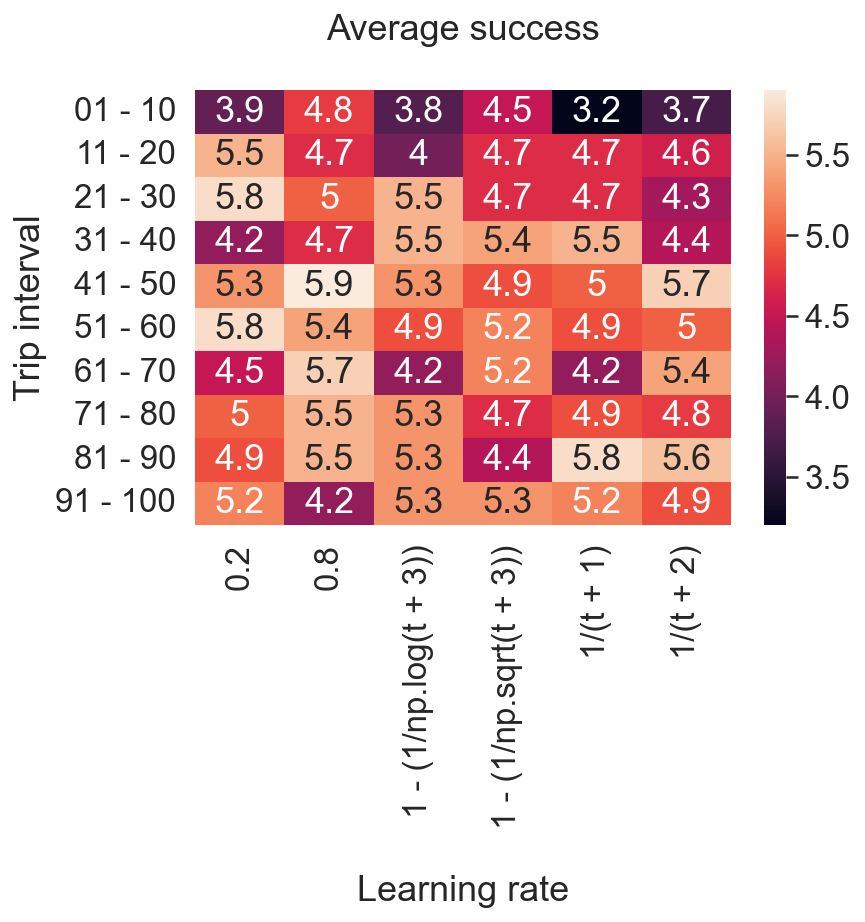


Epsilon policy is:  1/t


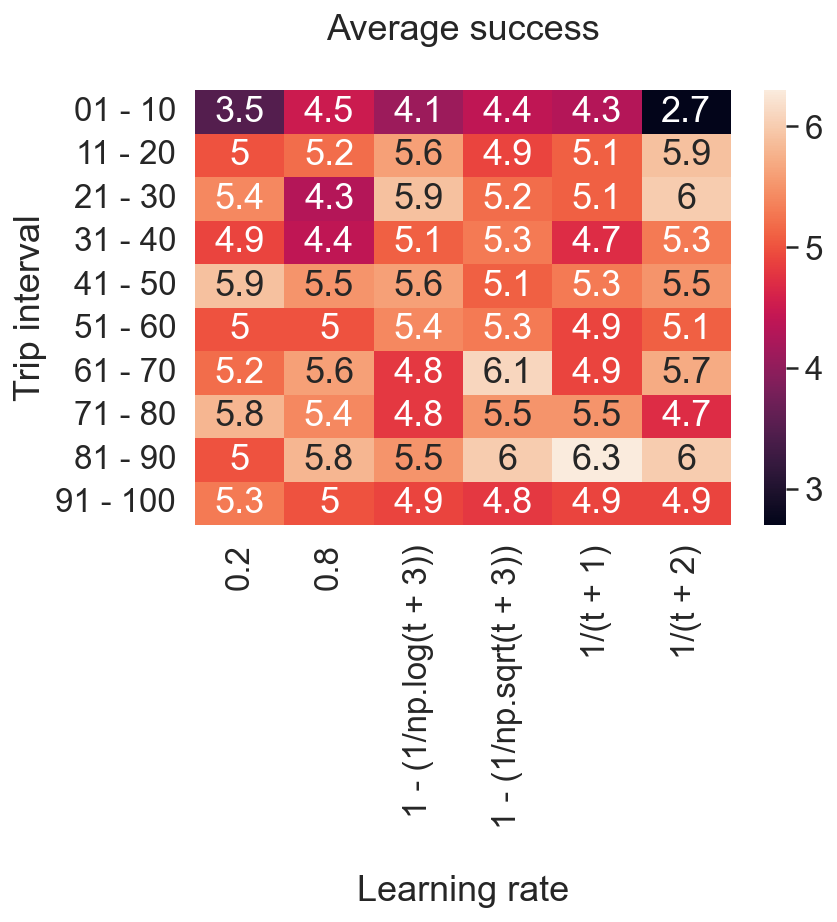


Epsilon policy is:  -ln(sigmoid(t + 2))


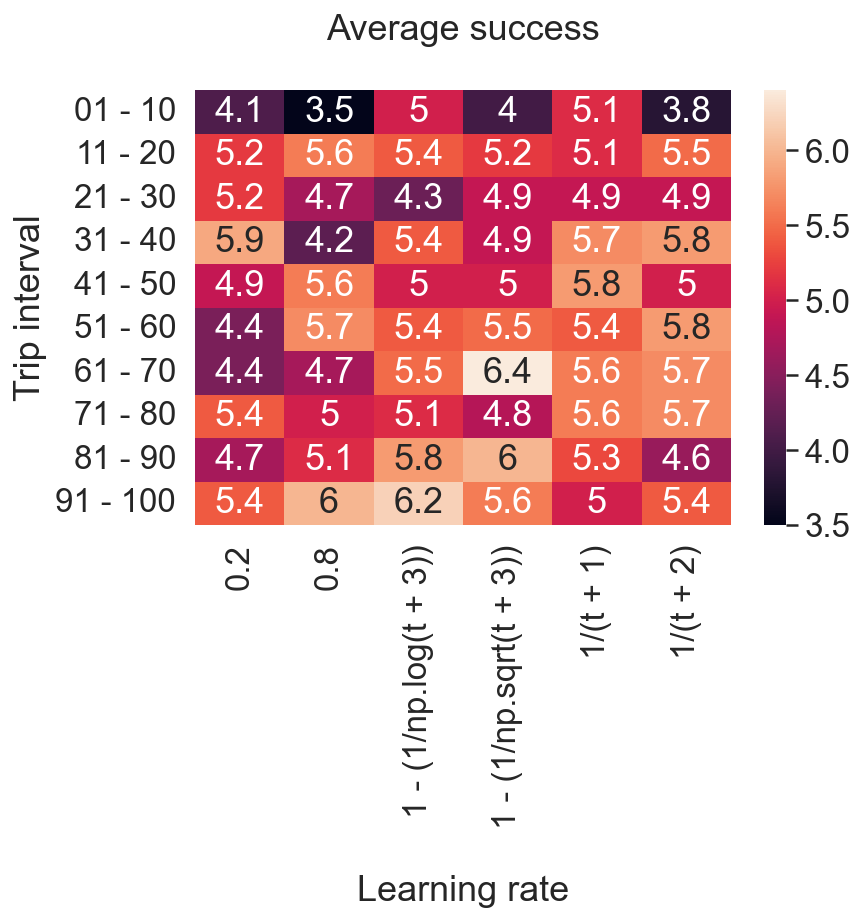


Epsilon policy is:  0.2


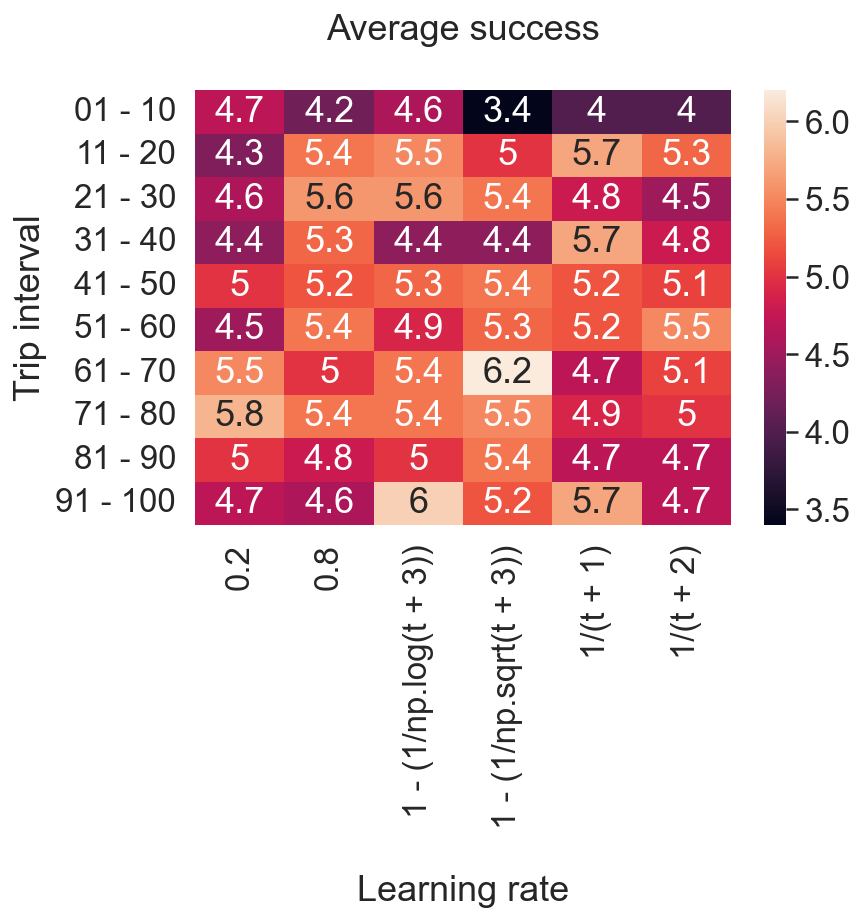


Epsilon policy is:  0.8


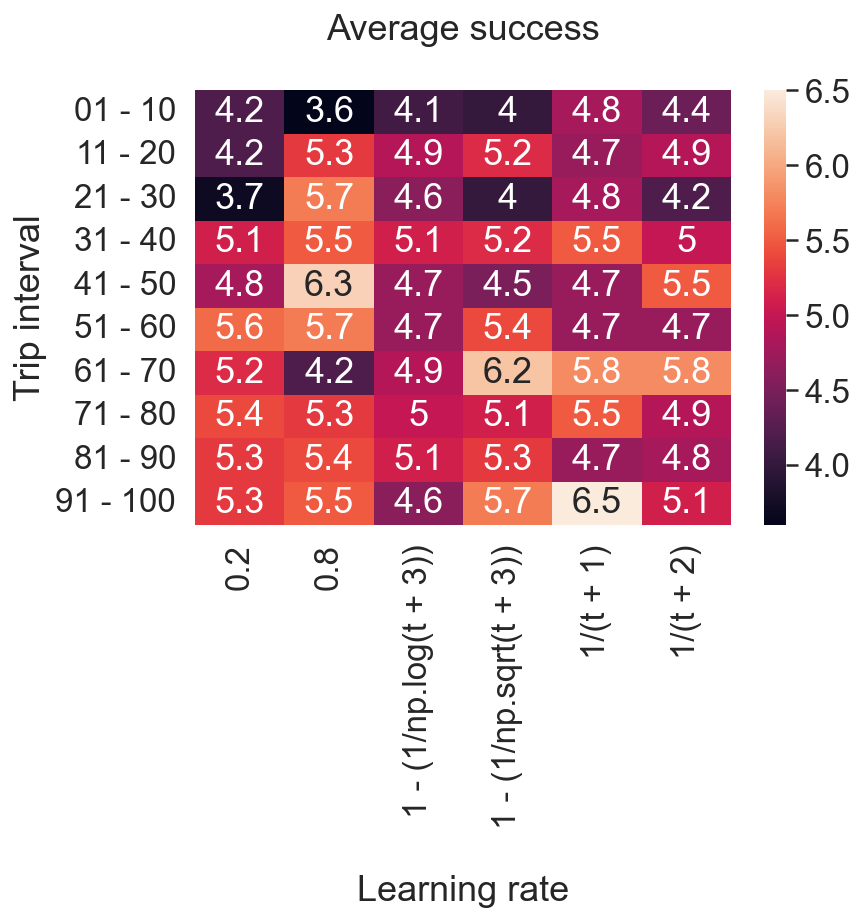

In [61]:
plot_grids(df8, 'success')

In [62]:
def plot_grids1(data, col):
    for i, e in enumerate(data['epsilon'].unique()):
        print("Epsilon policy is: ", e)
        d = pd.DataFrame()
        d = data[data['epsilon'] == e]
        sns.heatmap(d.groupby(["alpha", "trip_interval"]).agg(np.sum)[col].unstack().T/10, annot=True)
        plt.xlabel("\nLearning rate")
        plt.ylabel("Trip interval")
        plt.title("Average mistakes\n")
        plt.savefig("/Users/tyc_219/Downloads/smartcab-master/results/dif_mistakes1{}".format(i))
        plt.show()
        print()

Epsilon policy is:  1/(1 + np.exp(-t))


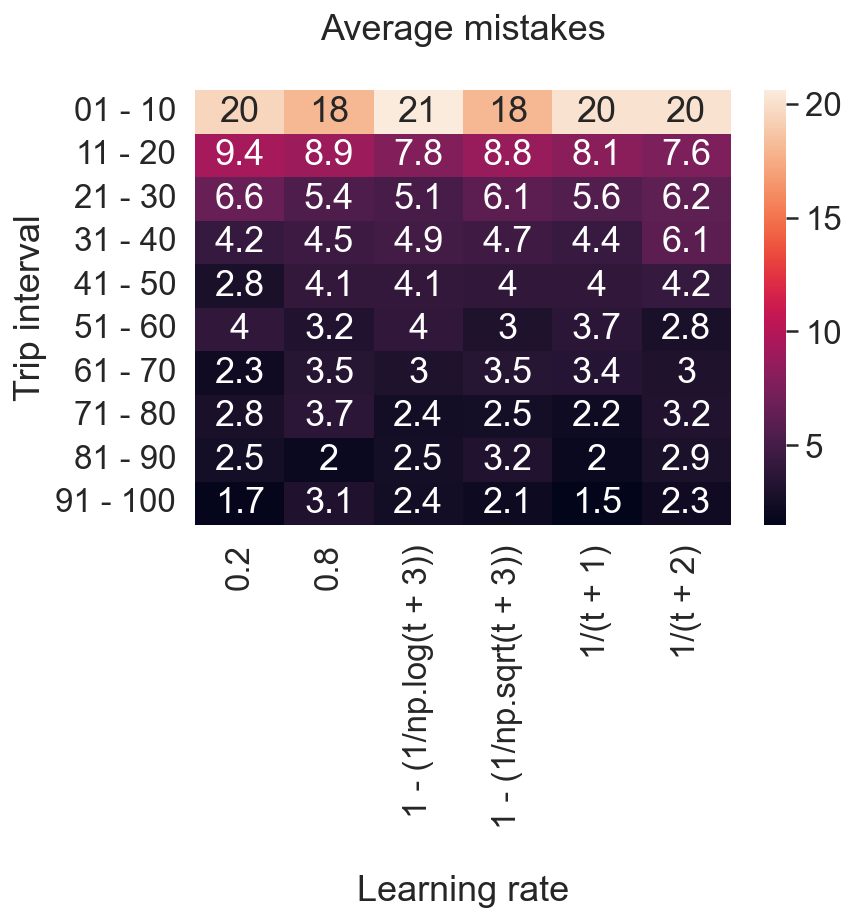


Epsilon policy is:  1/t


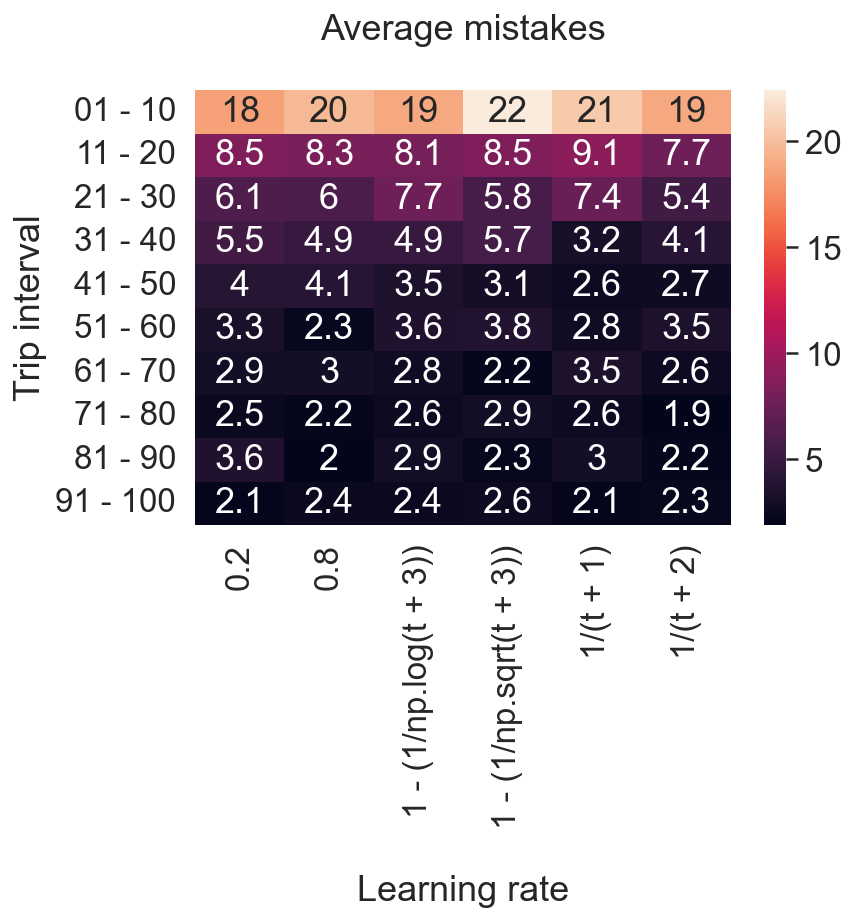


Epsilon policy is:  -ln(sigmoid(t + 2))


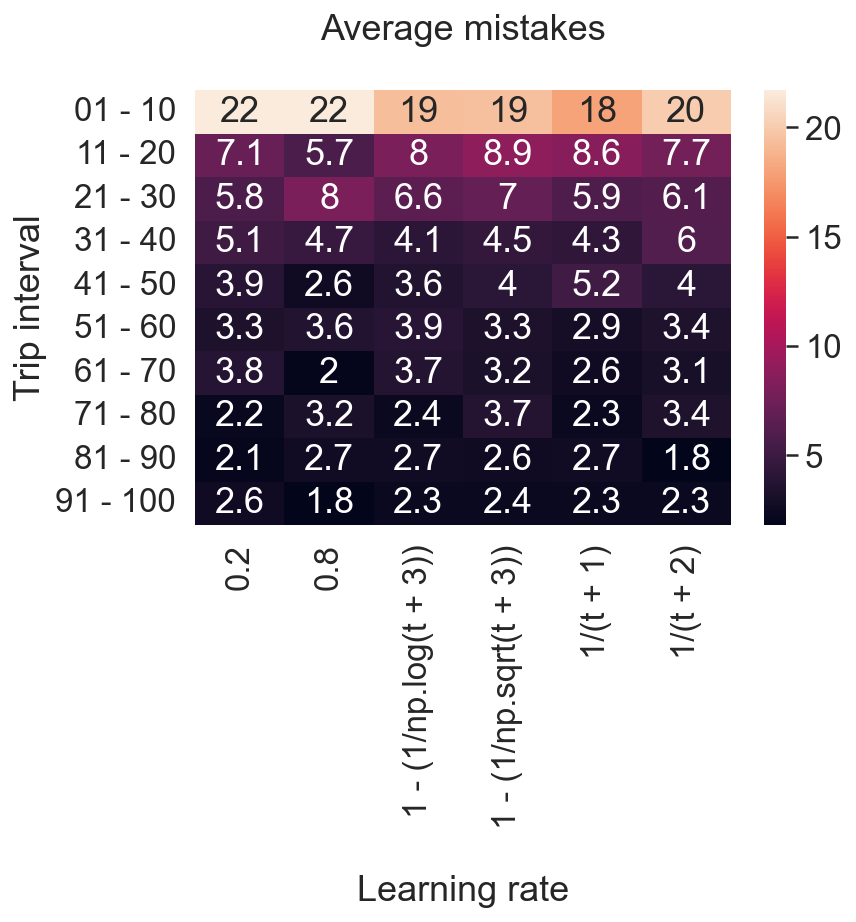


Epsilon policy is:  0.2


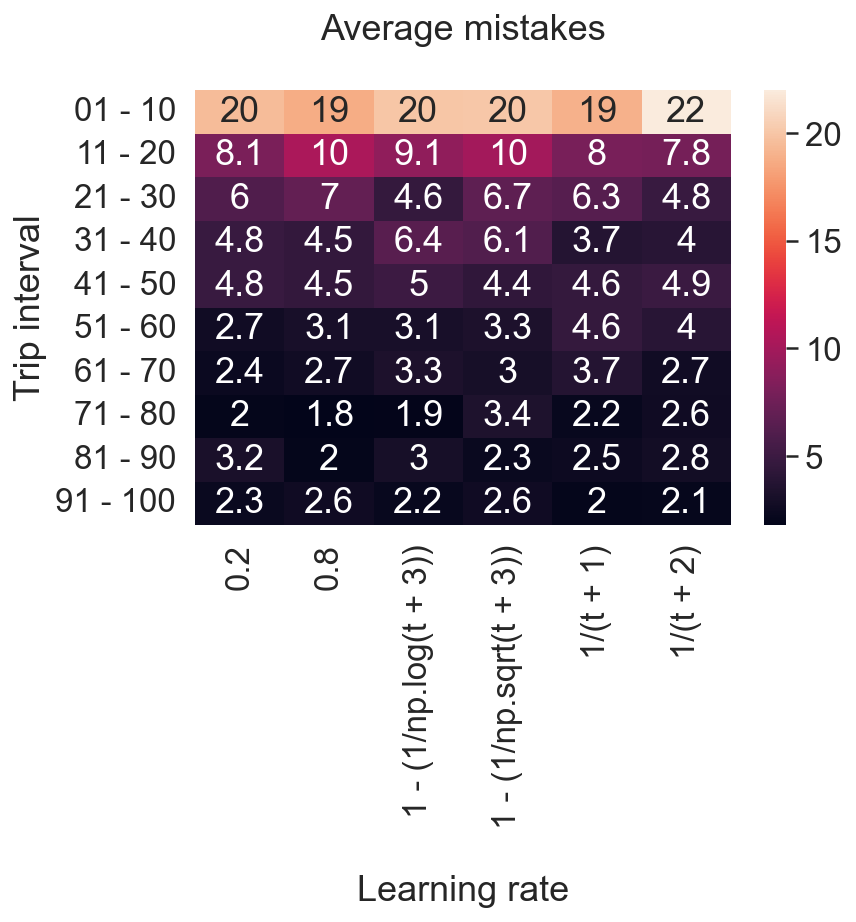


Epsilon policy is:  0.8


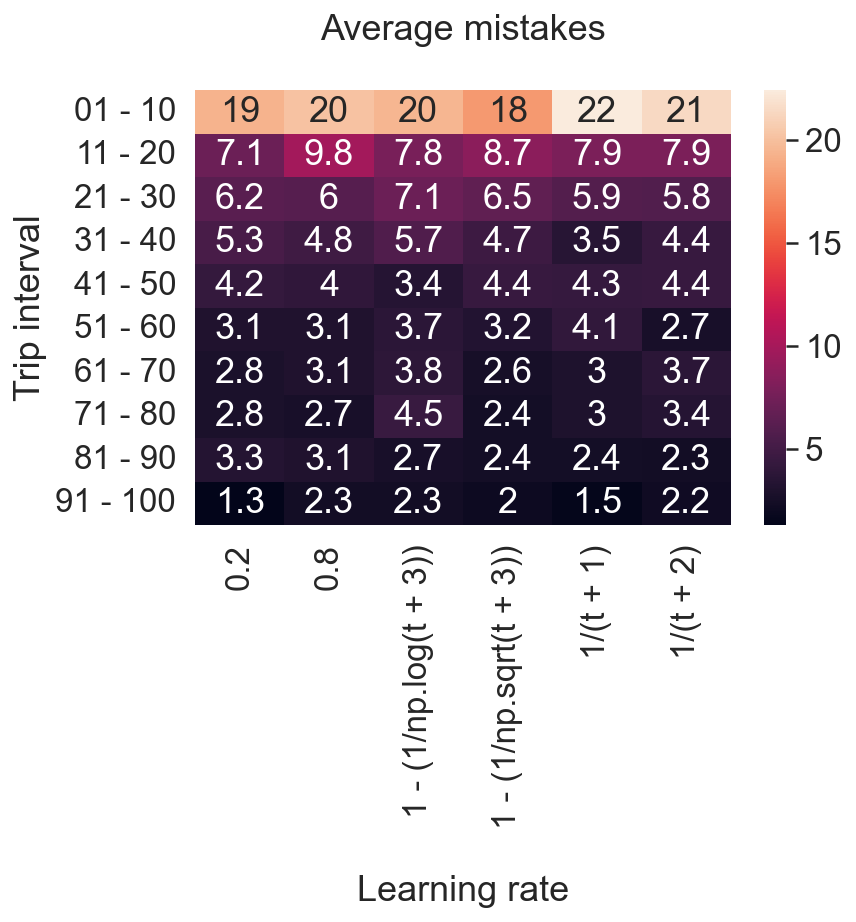

In [63]:
plot_grids1(df8, 'bad_moves')

We chose alpha = $1/(t+2)$, epsilon = $-ln(sigmoid(t+2))$, and then tried with different gamma values.

**gamma = 0.1**

In [64]:
# gamma=0.1
df9 = load_transform("/Users/tyc_219/Downloads/smartcab-master/results/best_q_agent2.json")
review_results(df9)

Successful trips:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
success                                                                        
0                  259      189      264      209      216      249      160   
1                    5        4        2        3        6        1        7   
All                264      193      266      212      222      250      167   

trip_interval  71 - 80  81 - 90  91 - 100   All  
success                                          
0                  167      135       239  2087  
1                    8        8         4    48  
All                175      143       243  2135


Rewards:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
reward                                                                         
-1                  23       12       11        2        4        4        3   
0                  132      112      122       85      102      127       90   
2                  104       65      131      122      110      118       67   
9                    1        0        0        1        0        1        1   
12                   4        4        2        2        6        0        6   
All                264      193      266      212      222      250      167   

trip_interval  71 - 80  81 - 90  91 - 100   All  
reward                                           
-1                   1        3         0    63  
0                  102       70       110  1052  
2                   64       62       129   972  
9                    0        0         0     4  
12                   8        8         4    44  
All                175      143       243  2135


Bad moves:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
bad_moves                                                                      
0                  241      181      255      210      218      246      164   
1                   23       12       11        2        4        4        3   
All                264      193      266      212      222      250      167   

trip_interval  71 - 80  81 - 90  91 - 100   All  
bad_moves                                        
0                  174      140       243  2072  
1                    1        3         0    63  
All                175      143       243  2135

The destination was reached in 48 out of 100 trials.


count   mean        std  min   25%   50%    75%   max
total_reward       100.0  24.45  13.193490 -1.0  16.0  22.0  32.50  65.0
total_nega_reward  100.0   0.63   1.292207  0.0   0.0   0.0   1.00   9.0
trial_length       100.0  20.35  10.349816  2.0  12.0  20.0  25.25  45.0

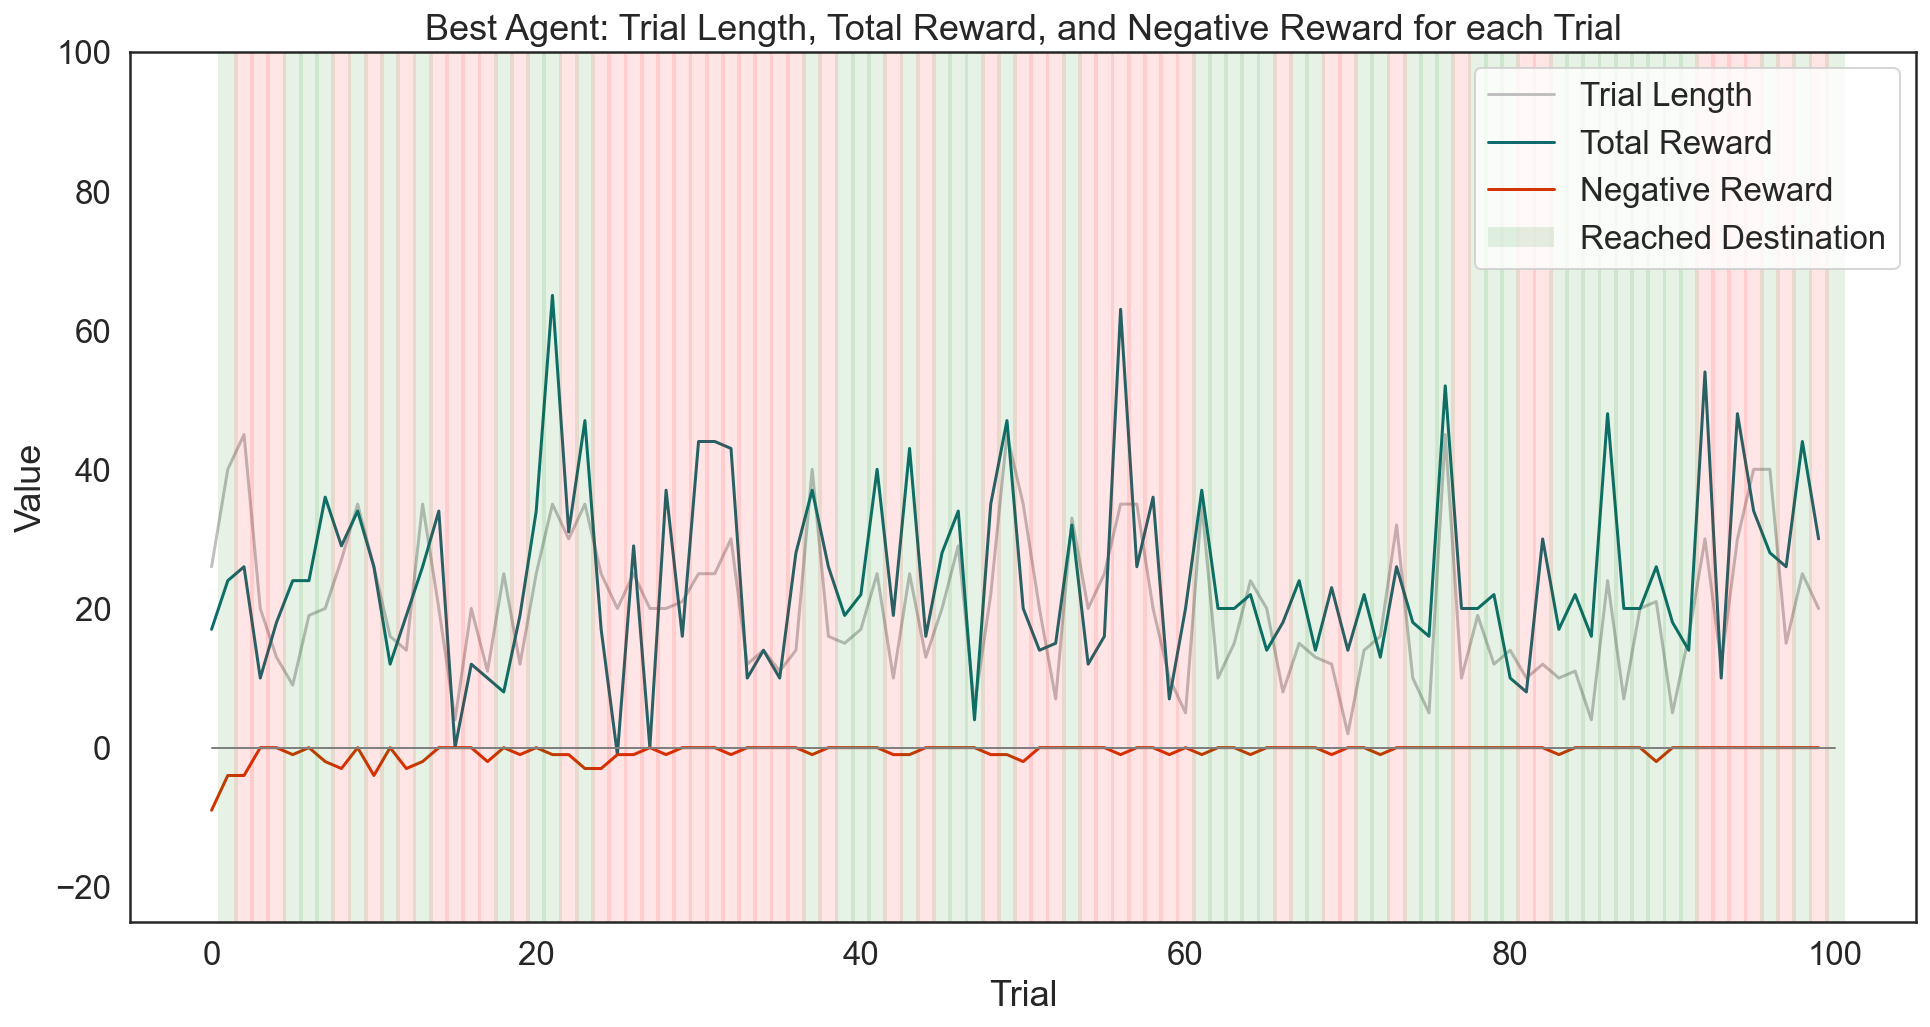

In [65]:
display_trial_stats(sns_data(df9), 'Best Agent', -25, 100)

It can be inferred that the learning ability is apparently improved. After 60 trials, the success increases significantly and the negative reward tends to disappear. 

**gamma=0.6**

In [9]:
# gamma=0.6
df10 = load_transform("/Users/tyc_219/Downloads/smartcab-master/results/best_q_agent4.json")
review_results(df10)

Successful trips:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
success                                                                        
0                  170      158      157      158      122      130      182   
1                    3        8        6        9        6        5        6   
All                173      166      163      167      128      135      188   

trip_interval  71 - 80  81 - 90  91 - 100   All  
success                                          
0                  149      202       238  1666  
1                    7        2         2    54  
All                156      204       240  1720


Rewards:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
reward                                                                         
-1                   6        1        3        3        0        0        1   
0                   63       68       53       80       52       49       82   
2                  101       89      101       75       70       81       99   
9                    0        0        0        0        0        1        0   
12                   3        8        6        9        6        4        6   
All                173      166      163      167      128      135      188   

trip_interval  71 - 80  81 - 90  91 - 100   All  
reward                                           
-1                   1        3         1    19  
0                   59       45        36   587  
2                   89      154       201  1060  
9                    0        0         0     1  
12                   7        2         2    53  
All                156      204       240  1720


Bad moves:


trip_interval  01 - 10  11 - 20  21 - 30  31 - 40  41 - 50  51 - 60  61 - 70  \
bad_moves                                                                      
0                  167      165      160      164      128      135      187   
1                    6        1        3        3        0        0        1   
All                173      166      163      167      128      135      188   

trip_interval  71 - 80  81 - 90  91 - 100   All  
bad_moves                                        
0                  155      201       239  1701  
1                    1        3         1    19  
All                156      204       240  1720

The destination was reached in 64 out of 100 trials.


count   mean        std  min   25%   50%   75%   max
total_reward       100.0  22.85  13.541090 -6.0  16.0  20.0  24.0  87.0
total_nega_reward  100.0   0.50   1.058873  0.0   0.0   0.0   1.0   8.0
trial_length       100.0  15.07   9.508375  1.0   8.0  12.0  20.0  50.0

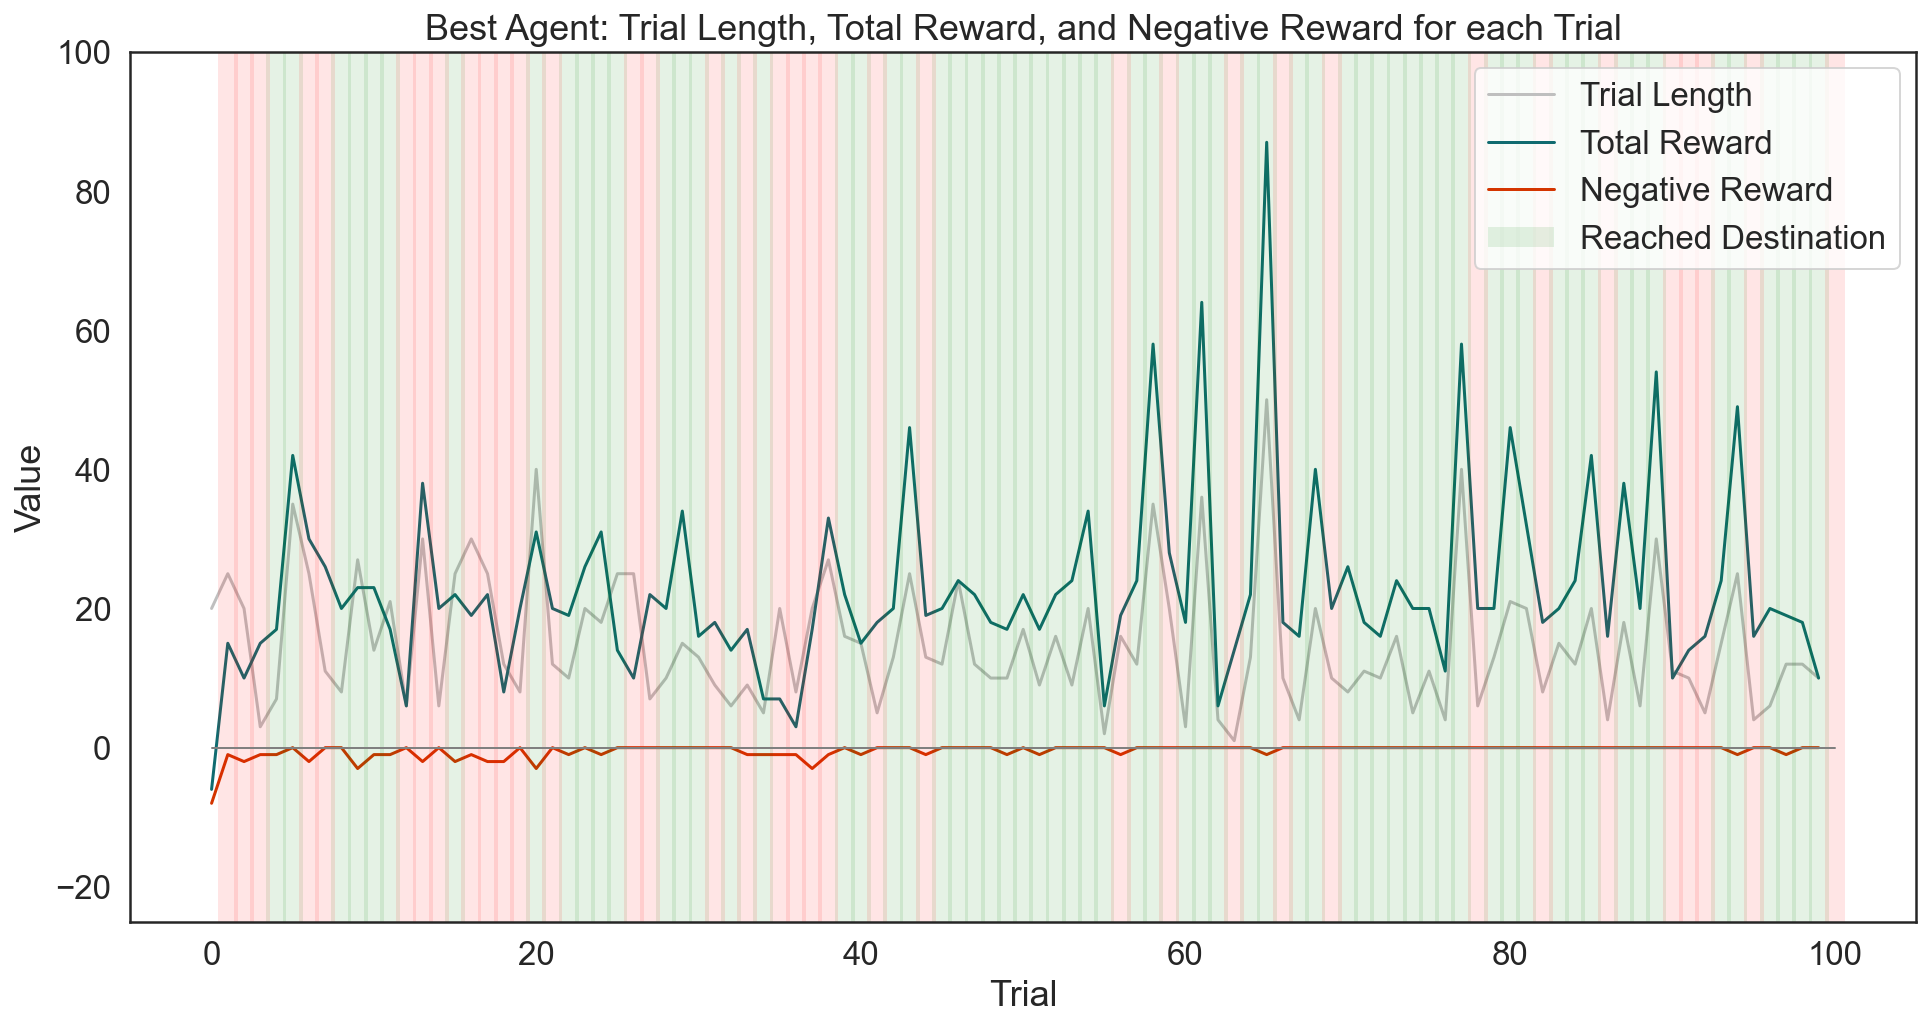

In [67]:
display_trial_stats(sns_data(df10), 'Best Agent', -25, 100)

When gamma=0.6, the Q-Learning agent performs well. The frequency of reaching the destination within allotted time greatly increases after 40 trials and barely incurs the negative rewards, the trial lengths also decrease. We then treat this policy as the best policy.

## 5 CONCLUSION

The ideal policy should ensure that our driving agent arrives at its destination without making any mistakes on the road (both efficiency and safety). With the provided parameters, the driving agent can safely navigate the city and arrive at its destination for most of the time, which is close to the stated optimal policy. It proves that the Q-Learning with appropriate parameter values is powerful for agents operating in environemnts with well defined state-action-reward cycles. This is especially true if the state space is sufficiently investigated to populate the Q(s,a) matrix with the most often experienced states.

Also, we discovered that more dummy cars would present a better result, however, it should be paid attention that the city is only six by eight and the risks of car crashing would increase. We may consider to expand the grid plan. Besides, the total reward of best policy is not high enough and the times of success is expected to increase, the further research can be done to develop and improve an optimal policy with high safety, reliability and efficiency. 

## 6 REFERENCES

Boyan, J. and Moore, A. (1994). Generalization in Reinforcement Learning: Safely Approximating the Value Function. In: G. Tesauro, D. Touretzky and T. Leen, eds., Advances in Neural Information Processing Systems 7. pp.369–376.

Hermanns, H. (2002). Markov Chains. In: Interactive Markov Chains. Berlin, Heidelberg: Springer, pp.35–55. doi:10.1007/3-540-45804-2_4.

Littman, M.L. (1994). Markov games as a framework for multi-agent reinforcement learning. In: W.W. Cohen and H. Hirsh, eds., Machine Learning Proceedings 1994, Proceedings of the Eleventh International Conference. [online] San Francisco (CA): Morgan Kaufmann, pp.157–163. Available at: https://www.sciencedirect.com/science/article/pii/B9781558603356500271.

Ng, A.Y. (2003). Shaping and policy search in reinforcement learning.

Watkins, C.J.C.H. and Dayan, P. (1992). Q-learning. Machine Learning, 8(3-4), pp.279–292. doi:10.1007/bf00992698.